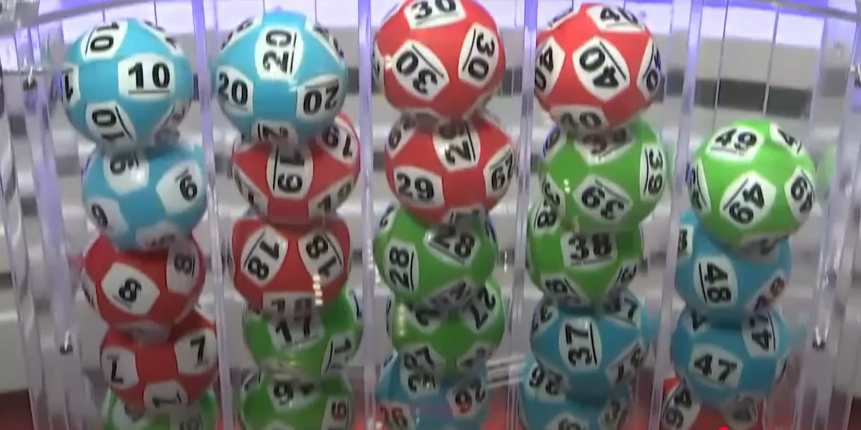

# Hong Kong Powerball (MarkSix) - Is the Powerball as Random as People Believe?

## Table of Contents

1. [TL;DR](#tldr)
1. [Data Overview](#data-overview)
2. [Low, High, Odd, and Even](#low-high-odd-and-even)
3. [Grouping the Numbers Horizontally](#grouping-the-numbers-horizontally)
4. [Grouping the Numbers Vertically](#grouping-the-numbers-vertically)
5. [Grouping by the Colour of the Balls](#grouping-by-the-colour-of-the-balls)
6. [Grouping the Numbers into 7 Groups](#grouping-the-numbers-into-7-groups)
7. [Last Draw Winning Number](#last-draw-winning-number)
8. [Frequency of Each Number](#frequency-of-each-number)
9. [Numbers Drawn in Specific Positions](#numbers-drawn-in-specific-positions)
10. [Number Combinations](#number-combinations)
11. [Consecutive Numbers](#consecutive-numbers)
12. [Longest Interval Before a Number Reappears](#the-longest-interval-before-a-number-reappears)
13. [Range of Winning Numbers](#range-of-winning-numbers)
14. [Machine Learning](#machine-learning)
    - [One Hot Encoding](#one-hot-encoding)
    - [Binarizer](#binarizer)
    - [1,000,000 MarkSix Simulations](#1000000-marksix-simulations)

# TL;DR

**MarkSix isn’t as random as many believe!**

Here are some intriguing observations about patterns in MarkSix since 2011:

1. **Odd vs. Even, High vs. Low**: Grouping numbers into odd, even, low, or high categories does not influence draw outcomes. So, those strategies might not be as helpful as you think!

2. **Number Grouping**: When we divide numbers into groups of seven (1-7, 8-14, etc.), some interesting trends emerge:
   - **Group 29-35** shows up *significantly more* often.
   - **Group 36-42** appears *significantly less* frequently.

The initial positions of numbers before entering the lottery machine have a noticeable impact:

3. **Horizontal positioning**: 
   - **Row 1 (1, 11, 21, 31, 41)** and **Row 9 (9, 19, 29, 39, 49)** are drawn *significantly more* often.
   - **Row 4 (4, 14, 24, 34, 44)** and **Row 6 (6, 16, 26, 36, 46)** are drawn *significantly less* frequently.

4. **Vertical Positioning**: Numbers in the group of **21-30** are drawn *significantly more* often.

5. **Color Grouping (Slope positioning)**: When considering the colors of the balls, the **Red** group has a *higher* chance of being drawn compared to **Green**, which in turn is more likely than **Blue**.

6. **Repeat Appearances**: Some numbers have a tendency to appear again in the next draw. Specifically, if **41**, **40**, or **5** was drawn, they have a *signifantly lower* chance of being drawn again.

7. **Uneven Odds**: The likelihood of each number being drawn varies significantly. Numbers **49**, **30**, and **34** have a *signifantly higher* chance of being drawn, while numbers **41**, **5**, and **19** are *signifantly less* likely.

8. **Order of Draw**: There’s a curious trend regarding the order of drawn numbers. For instance, since 2011, number **1** has only ever been drawn as the second ball, while number **49** has only appeared as the sixth ball. (Note: This finding was later questioned since the lottery results are sorted, but it’s worth noting for analysis.)

9. **Number Combinations**: Some number pairs show a higher likelihood of appearing together. Out of **1,176** combinations of two numbers, **71 pairs** have a *significantly higher* chance of being drawn, while **64 pairs** are *signifantly less* likely.

10. **Consecutive Numbers**: The maximum count for consecutive numbers is **35**, with three specific pairs—**(48,49)**, **(1,2)**, and **(34,35)**—showing a *signifantly higher* likelihood of being drawn. 

11. **Reappearance Intervals**: The longest interval before a number reappears ranges from **30 to 75 lottery draws**.

12. **Winning Number Range**: The range for winning numbers varies from **9 to 48**, offering *limited insight* but still a notable pattern.

In summary, while MarkSix may seem random, these observations suggest there are underlying patterns that could influence outcomes. Happy number picking!

# Import

In [1]:
import pandas as pd
import numpy as np
import random
from itertools import combinations
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
from functools import reduce
from scipy import stats
#pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)
!python --version

Python 3.12.1


# Data overview

*[Back To Table Content](#table-of-contents)*

In [2]:
df = pd.read_csv('Mark_Six.csv')
df=df.rename(columns={'Winning Number 1':'1'})
# Drop rows where the date is before 2011
filtered_df = df[df['Date'] >= '2011-01-01']
#2nd 20 columns
df_1sthalf=filtered_df.iloc[:,0:19]
# winning numbers 1-6
df_cols=filtered_df.iloc[:,2:8]
df_cols.columns=['1st','2nd','3rd','4th','5th','6th']
#the rest
df_2ndhalf=filtered_df.iloc[:,19:34]
df_chi = pd.read_csv('Mark_Six_chinese.csv')
df_1sthalf.tail()

,Draw,Date,1,2,3,4,5,6,Extra Number,From Last,Low,High,Odd,Even,1-10,11-20,21-30,31-40,41-50
1915,11/005,2011-01-11,1,2,29,37,42,48,38,NaN,2,4,3,3,2,0,1,1,2
1916,11/004,2011-01-08,10,12,18,21,27,33,4,NaN,4,2,3,3,1,2,2,1,0
1917,11/003,2011-01-06,4,7,14,15,19,26,43,4,5,1,3,3,2,3,1,0,0
1918,11/002,2011-01-04,4,9,16,20,38,39,40,"20,39",4,2,2,4,2,2,0,2,0
1919,11/001,2011-01-02,1,13,20,24,37,39,3,"13,20,39",4,2,4,2,1,2,1,2,0


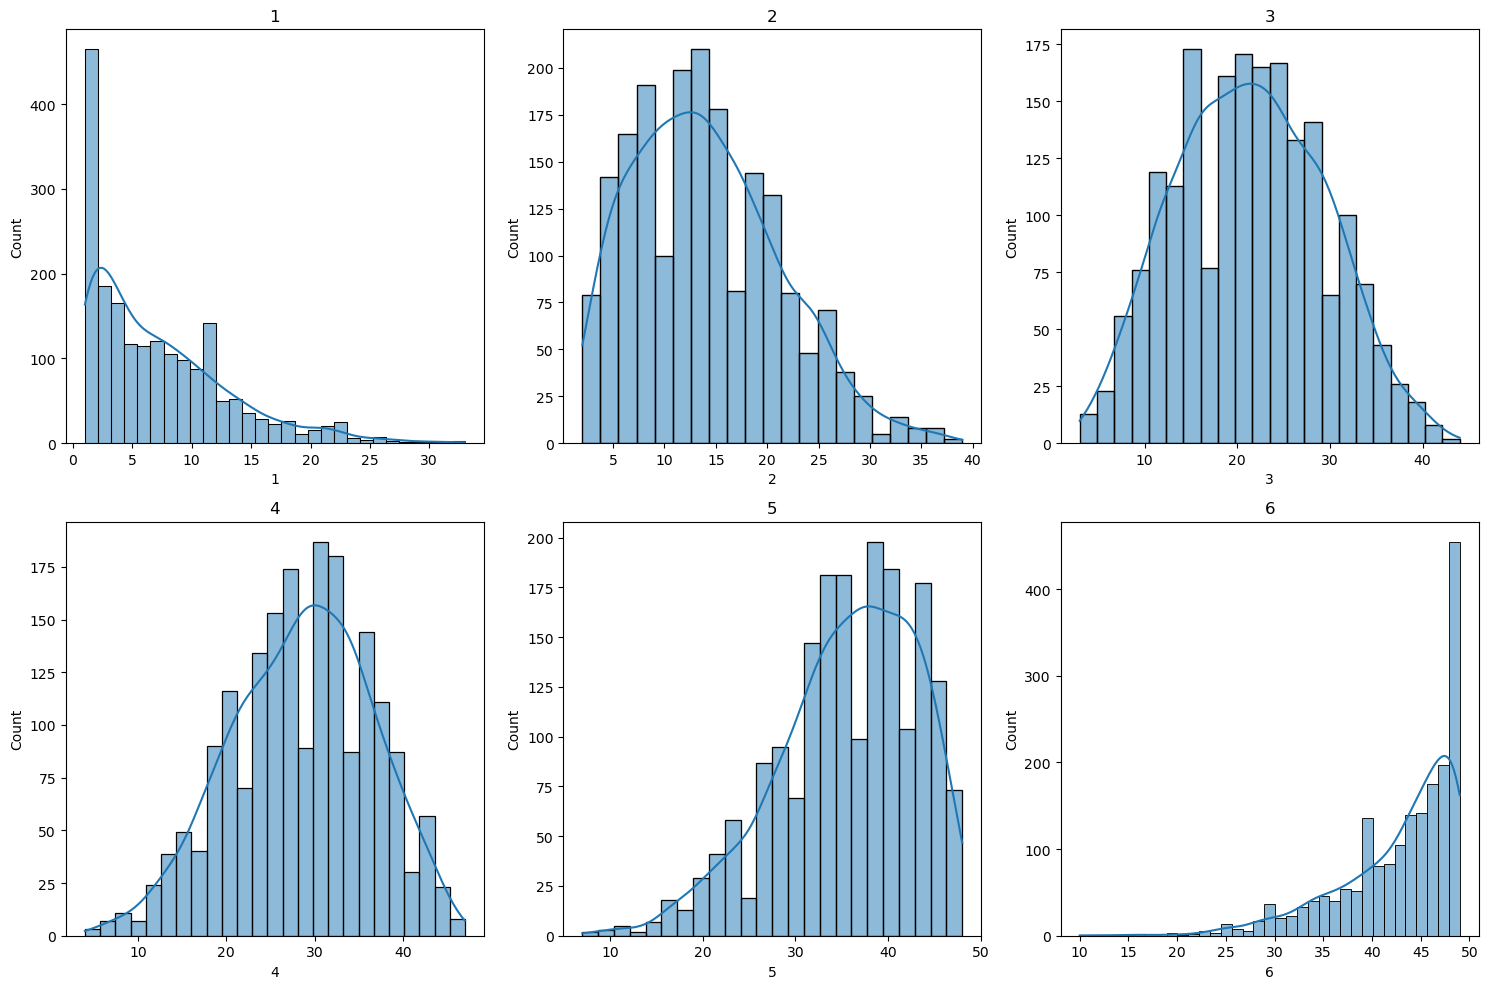

In [32]:
# let's visualize the distributions of df_cols
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
for i, col in enumerate(df_cols.columns):
    sns.histplot(df_cols[col], ax=ax[i//3, i%3], kde=True)
    ax[i//3, i%3].set_title(f'{col}')
plt.tight_layout()
plt.show()


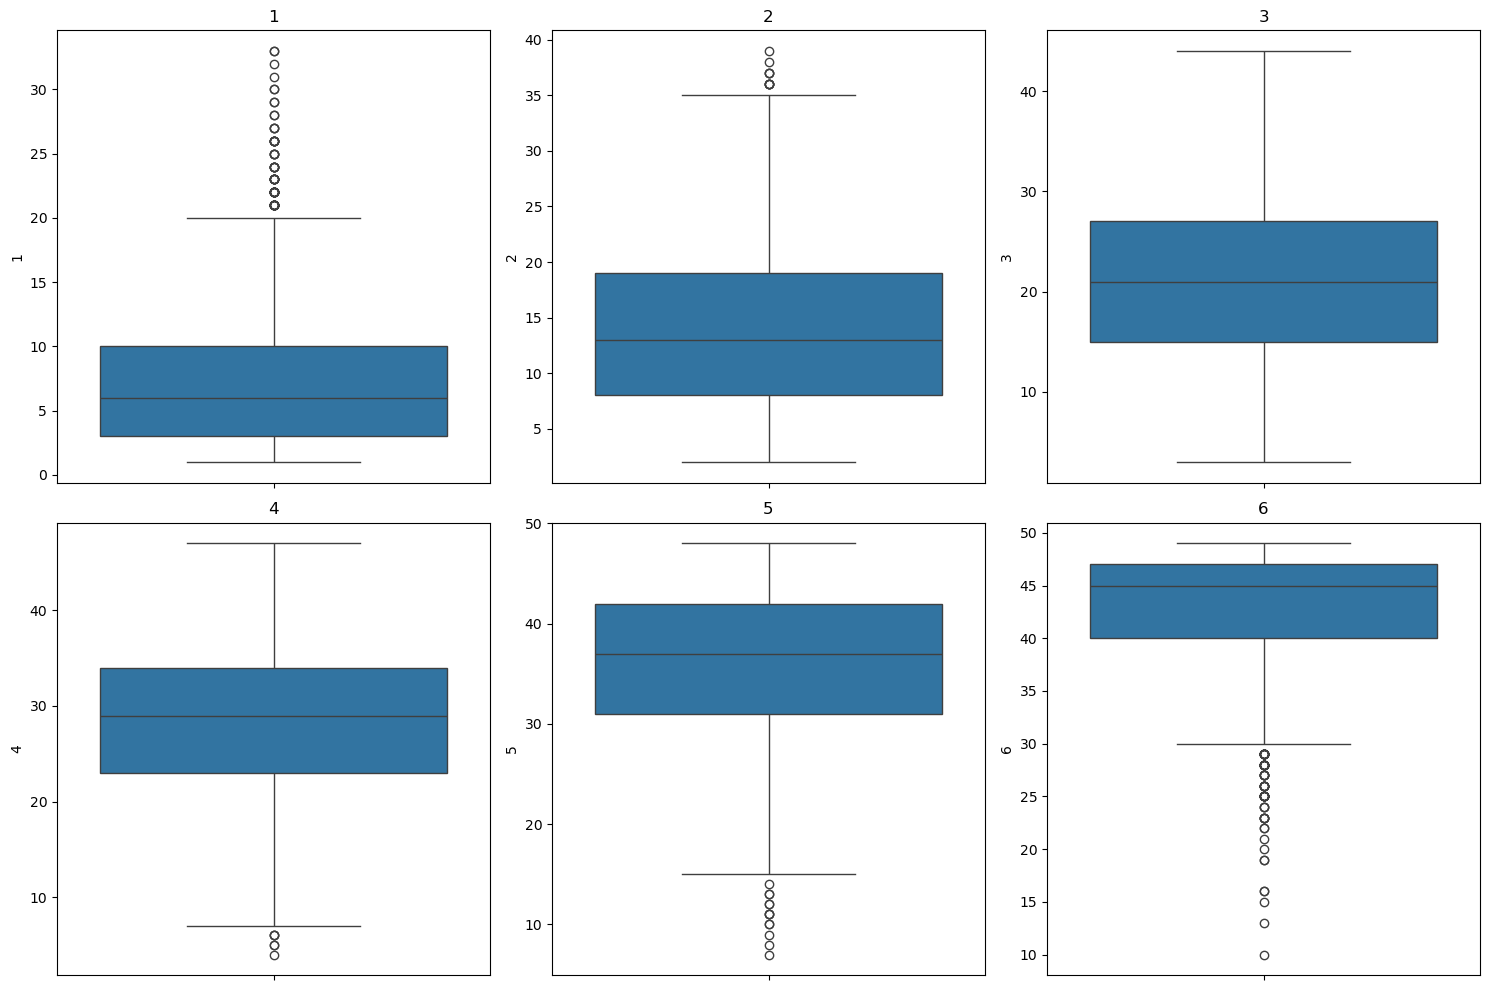

{'1': array([21, 33, 22, 27, 28, 23, 25, 24, 26, 29, 31, 32, 30]),
 '2': array([36, 37, 38, 39]),
 '3': array([], dtype=int64),
 '4': array([5, 6, 4]),
 '5': array([11,  8, 14, 13, 12, 10,  7,  9]),
 '6': array([28, 25, 29, 27, 26, 19, 24, 23, 16, 13, 15, 21, 10, 22, 20])}

In [35]:
# lets visualize the df_cols with a boxplot
# and list the unique outliers for each column
fig, ax = plt.subplots(2, 3, figsize=(15, 10))
outliers = {}
for i, col in enumerate(df_cols.columns):
    sns.boxplot(df_cols[col], ax=ax[i//3, i%3])
    ax[i//3, i%3].set_title(f'{col}')
    q1 = df_cols[col].quantile(0.25)
    q3 = df_cols[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers[col] = df_cols[(df_cols[col] < lower_bound) | (df_cols[col] > upper_bound)][col].unique()
plt.tight_layout()
plt.show()
outliers


It is obvious that the numbers were sorted.

In [110]:
df_chi.iloc[::,0:19].head()

,期數,日期,中獎號碼 1,2,3,4,5,6,特別號碼,上期出現號碼,小,大,單數,雙數,1-10,11-20,21-30,31-40,41-50
0,25/011,2025-02-02,14,18,30,36,40,42,1,"14,36",2,4,0,6,0,2,1,2,1
1,25/010,2025-01-25,7,14,19,31,36,45,24,NaN,3,3,4,2,1,2,0,2,1
2,25/009,2025-01-23,3,6,24,25,34,37,45,NaN,3,3,3,3,2,0,2,2,0
3,25/008,2025-01-21,16,22,33,43,48,49,8,NaN,2,4,3,3,0,1,1,1,3
4,25/007,2025-01-18,3,4,6,12,18,32,28,"3,4",5,1,1,5,3,2,0,1,0


In [111]:
#the rest of the columns
df_2ndhalf.head()

,Division 1 Winners,Division 1 Prize,Division 2 Winners,Division 2 Prize,Division 3 Winners,Division 3 Prize,Division 4 Winners,Division 4 Prize,Division 5 Winners,Division 5 Prize,Division 6 Winners,Division 6 Prize,Division 7 Winners,Division 7 Prize,Turnover
0,1.0,193762620.0,12.0,1215620.0,536.5,72500.0,1358.0,9600.0,29767.6,640.0,42866.3,320.0,569761.9,40.0,380697962
1,2.0,7578090.0,1.0,1580300.0,62.0,84960.0,204.5,9600.0,3961.2,640.0,5473.9,320.0,75878.0,40.0,51547722
2,0.0,0.0,0.5,834970.0,50.5,88180.0,127.0,9600.0,3505.7,640.0,4022.2,320.0,72790.4,40.0,43343702
3,1.0,24588320.0,3.0,873060.0,116.5,59950.0,365.0,9600.0,6223.0,640.0,9706.5,320.0,108389.9,40.0,71603316
4,0.5,16730720.0,6.0,346480.0,268.0,20680.0,649.5,9600.0,11180.2,640.0,14642.0,320.0,164579.8,40.0,70509097


In [112]:
df_chi.iloc[::, 19:34].head()

,頭獎 中獎注數,頭獎 每注獎金,二獎 中獎注數,二獎 每注獎金,三獎 中獎注數,三獎 每注獎金,四獎 中獎注數,四獎 每注獎金,五獎 中獎注數,五獎 每注獎金,六獎 中獎注數,六獎 每注獎金,七獎 中獎注數,七獎 每注獎金,總投注額
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,380697962
1,2.0,7578090.0,1.0,1580300.0,62.0,84960.0,204.5,9600.0,3961.2,640.0,5473.9,320.0,75878.0,40.0,51547722
2,0.0,0.0,0.5,834970.0,50.5,88180.0,127.0,9600.0,3505.7,640.0,4022.2,320.0,72790.4,40.0,43343702
3,1.0,24588320.0,3.0,873060.0,116.5,59950.0,365.0,9600.0,6223.0,640.0,9706.5,320.0,108389.9,40.0,71603316
4,0.5,16730720.0,6.0,346480.0,268.0,20680.0,649.5,9600.0,11180.2,640.0,14642.0,320.0,164579.8,40.0,70509097


In [113]:
df_1sthalf.describe()

,1,2,3,4,5,6,Extra Number,Low,High,Odd,Even,1-10,11-20,21-30,31-40,41-50
count,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000,1920.000000
mean,7.191667,14.025521,21.388021,28.506250,35.620312,42.732292,24.704687,2.956250,3.043750,3.002604,2.997396,1.218229,1.238021,1.246875,1.214063,1.082812
std,5.787152,7.154578,7.983239,7.987677,7.521663,6.085049,14.294628,1.146925,1.146925,1.154773,1.154773,0.950456,0.949541,0.934259,0.924740,0.887007
min,1.000000,2.000000,3.000000,4.000000,7.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,8.000000,15.000000,23.000000,31.000000,40.000000,12.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000
50%,6.000000,13.000000,21.000000,29.000000,37.000000,45.000000,25.000000,3.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,10.000000,19.000000,27.000000,34.000000,42.000000,47.000000,37.000000,4.000000,4.000000,4.000000,4.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,33.000000,39.000000,44.000000,47.000000,48.000000,49.000000,49.000000,6.000000,6.000000,6.000000,6.000000,6.000000,5.000000,4.000000,5.000000,4.000000


In [9]:
df_2ndhalf.describe()

,Division 1 Winners,Division 1 Prize,Division 2 Winners,Division 2 Prize,Division 3 Winners,Division 3 Prize,Division 4 Winners,Division 4 Prize,Division 5 Winners,Division 5 Prize,Division 6 Winners,Division 6 Prize,Division 7 Winners,Division 7 Prize,Turnover
count,2374.000000,2.374000e+03,2374.000000,2.374000e+03,2374.000000,2374.000000,2374.000000,2374.000000,2374.000000,2374.000000,2374.000000,2374.000000,2374.000000,2374.000000,2.375000e+03
mean,0.458804,7.806728e+06,2.680329,9.729598e+05,109.905518,71748.342460,268.823252,8726.537489,5516.920345,581.769166,7308.571693,290.884583,97371.130244,36.360573,5.176081e+07
std,0.938907,1.568706e+07,3.639066,7.539880e+05,104.340654,33338.690143,203.884085,1852.330583,3944.687817,123.488706,4975.249698,61.744353,65011.817943,7.718044,3.421071e+07
min,0.000000,0.000000e+00,0.000000,0.000000e+00,17.000000,9600.000000,57.000000,4800.000000,1446.200000,320.000000,2153.500000,160.000000,31431.500000,20.000000,2.121556e+07
25%,0.000000,0.000000e+00,1.000000,4.011875e+05,59.000000,44960.000000,151.000000,9600.000000,3311.250000,640.000000,4440.025000,320.000000,62158.500000,40.000000,3.528063e+07
50%,0.000000,0.000000e+00,2.000000,8.447450e+05,80.000000,70520.000000,205.250000,9600.000000,4352.500000,640.000000,5818.500000,320.000000,78366.100000,40.000000,4.278190e+07
75%,1.000000,9.106724e+06,3.500000,1.453249e+06,124.000000,94865.000000,305.875000,9600.000000,6125.000000,640.000000,8133.400000,320.000000,105726.750000,40.000000,5.428350e+07
max,23.500000,1.937626e+08,104.700000,5.541450e+06,2470.000000,249250.000000,2042.600000,9600.000000,43397.000000,640.000000,54231.200000,320.000000,732713.600000,40.000000,4.463953e+08


In [114]:
df_1sthalf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1920 entries, 0 to 1919
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Draw          1920 non-null   object
 1   Date          1920 non-null   object
 2   1             1920 non-null   int64 
 3   2             1920 non-null   int64 
 4   3             1920 non-null   int64 
 5   4             1920 non-null   int64 
 6   5             1920 non-null   int64 
 7   6             1920 non-null   int64 
 8   Extra Number  1920 non-null   int64 
 9   From Last     1067 non-null   object
 10  Low           1920 non-null   int64 
 11  High          1920 non-null   int64 
 12  Odd           1920 non-null   int64 
 13  Even          1920 non-null   int64 
 14  1-10          1920 non-null   int64 
 15  11-20         1920 non-null   int64 
 16  21-30         1920 non-null   int64 
 17  31-40         1920 non-null   int64 
 18  41-50         1920 non-null   int64 
dtypes: int64(16

In [115]:
df_2ndhalf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1920 entries, 0 to 1919
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Division 1 Winners  1919 non-null   float64
 1   Division 1 Prize    1919 non-null   float64
 2   Division 2 Winners  1919 non-null   float64
 3   Division 2 Prize    1919 non-null   float64
 4   Division 3 Winners  1919 non-null   float64
 5   Division 3 Prize    1919 non-null   float64
 6   Division 4 Winners  1919 non-null   float64
 7   Division 4 Prize    1919 non-null   float64
 8   Division 5 Winners  1919 non-null   float64
 9   Division 5 Prize    1919 non-null   float64
 10  Division 6 Winners  1919 non-null   float64
 11  Division 6 Prize    1919 non-null   float64
 12  Division 7 Winners  1919 non-null   float64
 13  Division 7 Prize    1919 non-null   float64
 14  Turnover            1920 non-null   int64  
dtypes: float64(14), int64(1)
memory usage: 240.0 KB


In [12]:
df_1sthalf.isnull().any()

Draw            False
Date            False
1               False
2               False
3               False
4               False
5               False
6               False
Extra Number    False
From Last        True
Low             False
High            False
Odd             False
Even            False
1-10            False
11-20           False
21-30           False
31-40           False
41-50           False
dtype: bool

# Feature Engineering

## Low, high, odd and even

*[Back To Table Content](#table-of-contents)*

In [3]:
#the default low, high, odd and even does not include the extra number
n=1920

low_percent=(df_1sthalf['Low'].sum()/6/n)
high_percent=(df_1sthalf['High'].sum()/6/n)
odd_percent=(df_1sthalf['Odd'].sum()/6/n)
even_percent=(df_1sthalf['Even'].sum()/6/n)

print(low_percent, high_percent, odd_percent, even_percent)

0.49270833333333336 0.5072916666666667 0.5004340277777778 0.4995659722222222


In [4]:
df_1sthalf

,Draw,Date,1,2,3,4,5,6,Extra Number,From Last,Low,High,Odd,Even,1-10,11-20,21-30,31-40,41-50
0,25/011,2025-02-02,14,18,30,36,40,42,1,"14,36",2,4,0,6,0,2,1,2,1
1,25/010,2025-01-25,7,14,19,31,36,45,24,NaN,3,3,4,2,1,2,0,2,1
2,25/009,2025-01-23,3,6,24,25,34,37,45,NaN,3,3,3,3,2,0,2,2,0
3,25/008,2025-01-21,16,22,33,43,48,49,8,NaN,2,4,3,3,0,1,1,1,3
4,25/007,2025-01-18,3,4,6,12,18,32,28,"3,4",5,1,1,5,3,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,11/005,2011-01-11,1,2,29,37,42,48,38,NaN,2,4,3,3,2,0,1,1,2
1916,11/004,2011-01-08,10,12,18,21,27,33,4,NaN,4,2,3,3,1,2,2,1,0
1917,11/003,2011-01-06,4,7,14,15,19,26,43,4,5,1,3,3,2,3,1,0,0
1918,11/002,2011-01-04,4,9,16,20,38,39,40,"20,39",4,2,2,4,2,2,0,2,0


In [5]:
df_low_high_odd_even = df_1sthalf.copy()

In [6]:
# Calculate low/high and odd/even cumsum for all columns at once
positions = ['1st', '2nd', '3rd', '4th', '5th', '6th']
for i, pos in enumerate(positions):
    df_low_high_odd_even[f'low_{pos}_cumsum'] = (df_cols.iloc[:, i] <= 24).cumsum()
    df_low_high_odd_even[f'high_{pos}_cumsum'] = (df_cols.iloc[:, i] > 24).cumsum()
    df_low_high_odd_even[f'odd_{pos}_cumsum'] = (df_cols.iloc[:, i] % 2 > 0).cumsum()
    df_low_high_odd_even[f'even_{pos}_cumsum'] = (df_cols.iloc[:, i] % 2 == 0).cumsum()

In [7]:
df_low_high_odd_even

,Draw,Date,1,2,3,4,5,6,Extra Number,From Last,...,odd_4th_cumsum,even_4th_cumsum,low_5th_cumsum,high_5th_cumsum,odd_5th_cumsum,even_5th_cumsum,low_6th_cumsum,high_6th_cumsum,odd_6th_cumsum,even_6th_cumsum
0,25/011,2025-02-02,14,18,30,36,40,42,1,"14,36",...,0,1,0,1,0,1,0,1,0,1
1,25/010,2025-01-25,7,14,19,31,36,45,24,NaN,...,1,1,0,2,0,2,0,2,1,1
2,25/009,2025-01-23,3,6,24,25,34,37,45,NaN,...,2,1,0,3,0,3,0,3,2,1
3,25/008,2025-01-21,16,22,33,43,48,49,8,NaN,...,3,1,0,4,0,4,0,4,3,1
4,25/007,2025-01-18,3,4,6,12,18,32,28,"3,4",...,3,2,1,4,0,5,0,5,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,11/005,2011-01-11,1,2,29,37,42,48,38,NaN,...,952,964,177,1739,914,1002,19,1897,1055,861
1916,11/004,2011-01-08,10,12,18,21,27,33,4,NaN,...,953,964,177,1740,915,1002,19,1898,1056,861
1917,11/003,2011-01-06,4,7,14,15,19,26,43,4,...,954,964,178,1740,916,1002,19,1899,1056,862
1918,11/002,2011-01-04,4,9,16,20,38,39,40,"20,39",...,954,965,178,1741,916,1003,19,1900,1057,862


### Numbers in position 1st to 6th

#### Odd, even cumsum & rolling sum

In [8]:
positions = ['1st', '2nd', '3rd', '4th', '5th', '6th']
#odd even cumsum
odd_cumsum = df_low_high_odd_even['Odd'].cumsum()

odd_cumsum_dict = {f'odd_{pos}_cumsum': df_low_high_odd_even[f'odd_{pos}_cumsum'] for pos in positions}
globals().update(odd_cumsum_dict)

even_cumsum = df_low_high_odd_even['Even'].cumsum()

even_cumsum_dict = {f'even_{pos}_cumsum': df_low_high_odd_even[f'even_{pos}_cumsum'] for pos in positions}
globals().update(even_cumsum_dict)

odd_roll_100 = df_low_high_odd_even['Odd'].rolling(window=100).sum()

odd_roll_dict = {f'odd_{pos}_roll_100': df_low_high_odd_even[f'odd_{pos}_cumsum'].rolling(window=100).sum() for pos in positions}
globals().update(odd_roll_dict)

even_roll_100 = df_low_high_odd_even['Even'].rolling(window=100).sum()

even_roll_dict = {f'even_{pos}_roll_100': df_low_high_odd_even[f'even_{pos}_cumsum'].rolling(window=100).sum() for pos in positions}
globals().update(even_roll_dict)

#### Low, High cumsum & rolling sum

In [9]:
positions = ['1st', '2nd', '3rd', '4th', '5th', '6th']

#low high cumsum
low_cumsum = df_low_high_odd_even['Low'].cumsum()

low_cumsum_dict = {f'low_{pos}_cumsum': df_low_high_odd_even[f'low_{pos}_cumsum'] for pos in positions}
globals().update(low_cumsum_dict)

high_cumsum = df_low_high_odd_even['High'].cumsum()

high_cumsum_dict = {f'high_{pos}_cumsum': df_low_high_odd_even[f'high_{pos}_cumsum'] for pos in positions}
globals().update(high_cumsum_dict)

low_roll_100 = df_low_high_odd_even['Low'].rolling(window=100).sum()

low_roll_dict = {f'low_{pos}_roll_100': df_low_high_odd_even[f'low_{pos}_cumsum'].rolling(window=100).sum() for pos in positions}
globals().update(low_roll_dict)

high_roll_100 = df_low_high_odd_even['High'].rolling(window=100).sum()

high_roll_dict = {f'high_{pos}_roll_100': df_low_high_odd_even[f'high_{pos}_cumsum'].rolling(window=100).sum() for pos in positions}
globals().update(high_roll_dict)

#### ML features transformation

In [10]:
df_feature_low_high_odd_even = df_cols.copy()
positions = ['1st', '2nd', '3rd', '4th', '5th', '6th']

# Total Low High frequency
df_feature_low_high_odd_even['low_cumsum']=low_cumsum/(low_cumsum + high_cumsum)
# Calculate low cumsum ratios for positions 1st through 6th
for pos in positions:
    df_feature_low_high_odd_even[f'low_{pos}_cumsum'] = locals()[f'low_{pos}_cumsum'] / (locals()[f'low_{pos}_cumsum'] + locals()[f'high_{pos}_cumsum'])

df_feature_low_high_odd_even['high_cumsum']=high_cumsum/(low_cumsum + high_cumsum)
# Calculate high cumsum ratios for positions 1st through 6th
for pos in positions:
    df_feature_low_high_odd_even[f'high_{pos}_cumsum'] = locals()[f'high_{pos}_cumsum'] / (locals()[f'high_{pos}_cumsum'] + locals()[f'low_{pos}_cumsum'])

# cumulative Low High frequency (changes every 100 lotterys/100 lotterys moving average)
df_feature_low_high_odd_even['low_roll_100']=low_roll_100/(low_roll_100 + high_roll_100)
# Calculate low roll ratios for positions 1st through 6th
for pos in positions:
    df_feature_low_high_odd_even[f'low_{pos}_roll_100'] = locals()[f'low_{pos}_cumsum'] / (locals()[f'high_{pos}_cumsum'] + locals()[f'low_{pos}_cumsum'])

df_feature_low_high_odd_even['high_roll_100']=high_roll_100/(low_roll_100 + high_roll_100)
# Calculate high roll ratios for positions 1st through 6th
for pos in positions:
    df_feature_low_high_odd_even[f'high_{pos}_roll_100'] = locals()[f'high_{pos}_cumsum'] / (locals()[f'low_{pos}_cumsum'] + locals()[f'high_{pos}_cumsum'])
    
# Replace NaN values with cumulative sums of available draws
df_feature_low_high_odd_even.loc[0:100, 'low_roll_100'] = low_cumsum/(low_cumsum + high_cumsum)
# Replace NaN values with cumulative sums for low positions
for pos in positions:
    df_feature_low_high_odd_even.loc[0:100, f'low_{pos}_roll_100'] = locals()[f'low_{pos}_cumsum'] / (locals()[f'low_{pos}_cumsum'] + locals()[f'high_{pos}_cumsum'])

df_feature_low_high_odd_even.loc[0:100, 'high_roll_100'] = high_cumsum/(low_cumsum + high_cumsum)
# Replace NaN values with cumulative sums for high positions
for pos in positions:
    df_feature_low_high_odd_even.loc[0:100, f'high_{pos}_roll_100'] = locals()[f'high_{pos}_cumsum'] / (locals()[f'high_{pos}_cumsum'] + locals()[f'low_{pos}_cumsum'])

# Total Odd Even frequency (from beginning to the end) range 0-1
df_feature_low_high_odd_even['odd_cumsum']=odd_cumsum/(odd_cumsum + even_cumsum)
# Calculate odd cumsum ratios for positions 1st through 6th
for pos in positions:
    df_feature_low_high_odd_even[f'odd_{pos}_cumsum'] = locals()[f'odd_{pos}_cumsum'] / (locals()[f'odd_{pos}_cumsum'] + locals()[f'even_{pos}_cumsum'])

df_feature_low_high_odd_even['even_cumsum']=even_cumsum/(odd_cumsum + even_cumsum)
# Calculate even cumsum ratios for positions 1st through 6th
for pos in positions:
    df_feature_low_high_odd_even[f'even_{pos}_cumsum'] = locals()[f'even_{pos}_cumsum'] / (locals()[f'even_{pos}_cumsum'] + locals()[f'odd_{pos}_cumsum'])

# cumulative Low High frequency (changes every 100 lotterys/100 lotterys moving average)
df_feature_low_high_odd_even['odd_roll_100']=odd_roll_100/(odd_roll_100 + even_roll_100)
# Calculate odd roll ratios for positions 1st through 6th
for pos in positions:
    df_feature_low_high_odd_even[f'odd_{pos}_roll_100'] = locals()[f'odd_{pos}_cumsum'] / (locals()[f'even_{pos}_cumsum'] + locals()[f'odd_{pos}_cumsum'])

df_feature_low_high_odd_even['even_roll_100']=even_roll_100/(odd_roll_100 + even_roll_100)
# Calculate even roll ratios for positions 1st through 6th
for pos in positions:
    df_feature_low_high_odd_even[f'even_{pos}_roll_100'] = locals()[f'even_{pos}_cumsum'] / (locals()[f'odd_{pos}_cumsum'] + locals()[f'even_{pos}_cumsum'])

# Replace NaN values with cumulative sums of available draws
df_feature_low_high_odd_even.loc[0:100, 'odd_roll_100'] = odd_cumsum/(odd_cumsum + even_cumsum)
# Replace NaN values with cumulative sums for odd positions
for pos in positions:
    df_feature_low_high_odd_even.loc[0:100, f'odd_{pos}_roll_100'] = locals()[f'odd_{pos}_cumsum'] / (locals()[f'odd_{pos}_cumsum'] + locals()[f'even_{pos}_cumsum'])

df_feature_low_high_odd_even.loc[0:100, 'even_roll_100'] = even_cumsum/(odd_cumsum + even_cumsum)
# Replace NaN values with cumulative sums for even positions
for pos in positions:
    df_feature_low_high_odd_even.loc[0:100, f'even_{pos}_roll_100'] = locals()[f'even_{pos}_cumsum'] / (locals()[f'even_{pos}_cumsum'] + locals()[f'odd_{pos}_cumsum'])

df_feature_low_high_odd_even

,1st,2nd,3rd,4th,5th,6th,low_cumsum,low_1st_cumsum,low_2nd_cumsum,low_3rd_cumsum,...,odd_4th_roll_100,odd_5th_roll_100,odd_6th_roll_100,even_roll_100,even_1st_roll_100,even_2nd_roll_100,even_3rd_roll_100,even_4th_roll_100,even_5th_roll_100,even_6th_roll_100
0,14,18,30,36,40,42,0.333333,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,7,14,19,31,36,45,0.416667,1.000000,1.000000,0.500000,...,0.500000,0.000000,0.500000,0.666667,0.500000,1.000000,0.500000,0.500000,1.000000,0.500000
2,3,6,24,25,34,37,0.444444,1.000000,1.000000,0.666667,...,0.666667,0.000000,0.666667,0.611111,0.333333,1.000000,0.666667,0.333333,1.000000,0.333333
3,16,22,33,43,48,49,0.416667,1.000000,1.000000,0.500000,...,0.750000,0.000000,0.750000,0.583333,0.500000,1.000000,0.500000,0.250000,1.000000,0.250000
4,3,4,6,12,18,32,0.500000,1.000000,1.000000,0.600000,...,0.600000,0.000000,0.600000,0.633333,0.400000,1.000000,0.600000,0.400000,1.000000,0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,1,2,29,37,42,48,0.492258,0.987474,0.910752,0.647182,...,0.496868,0.477035,0.550626,0.475000,0.474426,0.536534,0.510960,0.503132,0.522965,0.449374
1916,10,12,18,21,27,33,0.492349,0.987480,0.910798,0.647366,...,0.497131,0.477308,0.550861,0.475000,0.474700,0.536776,0.511215,0.502869,0.522692,0.449139
1917,4,7,14,15,19,26,0.492527,0.987487,0.910845,0.647550,...,0.497393,0.477581,0.550574,0.475000,0.474974,0.536496,0.511470,0.502607,0.522419,0.449426
1918,4,9,16,20,38,39,0.492618,0.987493,0.910891,0.647733,...,0.497134,0.477332,0.550808,0.480000,0.475248,0.536217,0.511725,0.502866,0.522668,0.449192


### Extra number

In [48]:
#what about the low, high, odd and even for the extra number?
df = df_1sthalf.copy()
n=1920
#1 = even number, 0 = odd number
df['Extra Number Even']=df['Extra Number'].apply(lambda x: 1 if x % 2 == 0 else 0)

print((df['Extra Number Even'].value_counts()/n)*100)
print('Grouping numbers with low, High, Odd and Even do not seem to be the effective features.')

Extra Number Even
0    50.364583
1    49.635417
Name: count, dtype: float64
Grouping numbers with low, High, Odd and Even do not seem to be the effective features.


## Grouping the numbers in different ways
Would the initial position of the numbers be a factor on the drawing outcome?

[Back To Table Content](#table-of-contents)

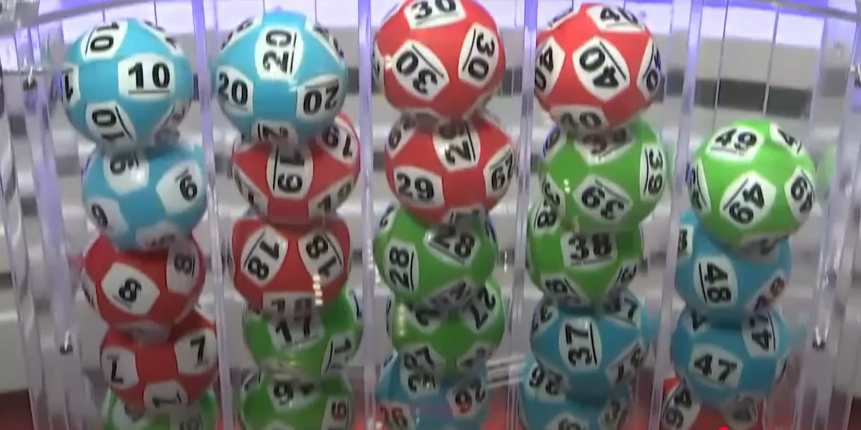

### Grouping the numbers horizontally

*[Back To Table Content](#table-of-contents)*

In [11]:
df_row_dis=df_1sthalf.copy()
df_row_dis['1_row'] = (df_row_dis.iloc[:, 2:8] % 10 == 0).sum(axis=1)

# Create a list of row suffixes and a corresponding list of target values
suffixes = range(2, 11)  # for 2_row to 10_row
targets = [9, 8, 7, 6, 5, 4, 3, 2, 1]  # corresponding values for each row

for suffix, target in zip(suffixes, targets):
    condition = df_row_dis.iloc[:, 2:8].isin([target + 10*i for i in range(0, 5)])
    df_row_dis[f'{suffix}_row'] = condition.sum(axis=1)

    # Calculate for each position (column) and each row (1-10)
for col in range(6):  # 6 columns (2 to 7 in the original DataFrame)
    # Calculate 1_row (numbers ending in 0)
    df_row_dis[f'1_row_{col+1}'] = (df_row_dis.iloc[:, col+2] % 10 == 0).astype(int)
    
    # Calculate 2_row to 10_row
    for suffix, target in zip(range(2, 11), range(9, 0, -1)):
        condition = df_row_dis.iloc[:, col+2].isin([target + 10*i for i in range(0, 5)])
        df_row_dis[f'{suffix}_row_{col+1}'] = condition.astype(int)

In [12]:
df_row_dis_proportion=df_row_dis.iloc[:,19:29].sum()
df_row_dis_proportion=df_row_dis_proportion.reset_index(name='dis')

In [13]:
#because 1_row has only 4 numbers, therefore need to do some manipulation
df_row_dis_proportion['dis'][0]=df_row_dis_proportion['dis'][0]/4
df_row_dis_proportion['dis'][1:]=df_row_dis_proportion['dis'][1:]/5

/tmp/ipykernel_2046/2325743889.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_row_dis_proportion['dis'][0]=df_row_dis_proportion['dis'][0]/4
/tmp/ipykernel_2046/2325743889.py:2: SettingWithCopyWarning: 
A value is trying to be set on

In [14]:
df_row_dis_proportion

,index,dis
0,1_row,241.75
1,2_row,231.80
2,3_row,238.00
3,4_row,228.80
4,5_row,230.60
5,6_row,226.00
6,7_row,248.60
7,8_row,232.60
8,9_row,240.40
9,10_row,233.80


#### Distribution of the 10 groups

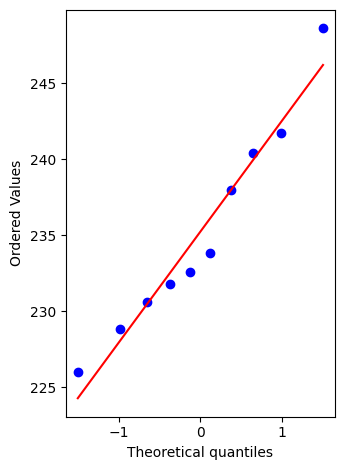

Shapiro-Wilk Test Statistic: 0.9554493089000379, p-value: 0.7330013208598682
The data is normally distributed (fail to reject H0).


In [18]:
#Are the numbers normally distributed?
data = df_row_dis_proportion['dis']

# Step 1: Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(data, dist="norm", plot=plt)
plt.title('')

plt.tight_layout()
plt.show()

# Step 2: Shapiro-Wilk Test
shapiro_stat, shapiro_p = stats.shapiro(data)
print(f'Shapiro-Wilk Test Statistic: {shapiro_stat}, p-value: {shapiro_p}')

# Interpretation of the p-value
alpha = 0.01
if shapiro_p > alpha:
    print("The data is normally distributed (fail to reject H0).")
else:
    print("The data is not normally distributed (reject H0).")

#### Significant differences between the 10 groups

In [20]:
# t-test for df_row_dis
data = df_row_dis_proportion['dis']
name = df_row_dis_proportion['index']

# Function to perform one-sample t-test
def perform_ttest(value):
    t_stat, p_value = stats.ttest_1samp(data, value)
    return (value, t_stat, p_value)

# Use reduce to apply the t-test to each value in the data
results = [perform_ttest(value) for value in data]

# Print results
num=0
for value, t_stat, p_value in results:
    print(f"For {name[num]}")
    print(f"Comparing value {value} against the group mean:")
    print(f"  t-statistic: {t_stat:.4f}")
    print(f"  p-value: {p_value:.4f}")
    num+=1
    
    if p_value > 0.05:
        print("  Fail to reject the null hypothesis (H0): Not significantly different from the mean.\n")
    else:
        print("  Reject the null hypothesis (H0): Significantly different from the mean.\n")

For 1_row
Comparing value 241.75 against the group mean:
  t-statistic: -3.0003
  p-value: 0.0149
  Reject the null hypothesis (H0): Significantly different from the mean.

For 2_row
Comparing value 231.8 against the group mean:
  t-statistic: 1.5819
  p-value: 0.1481
  Fail to reject the null hypothesis (H0): Not significantly different from the mean.

For 3_row
Comparing value 238.0 against the group mean:
  t-statistic: -1.2733
  p-value: 0.2348
  Fail to reject the null hypothesis (H0): Not significantly different from the mean.

For 4_row
Comparing value 228.8 against the group mean:
  t-statistic: 2.9634
  p-value: 0.0159
  Reject the null hypothesis (H0): Significantly different from the mean.

For 5_row
Comparing value 230.6 against the group mean:
  t-statistic: 2.1345
  p-value: 0.0616
  Fail to reject the null hypothesis (H0): Not significantly different from the mean.

For 6_row
Comparing value 226.0 against the group mean:
  t-statistic: 4.2529
  p-value: 0.0021
  Reject t

1_row appear significantly more in draws

4_row appear significantly lesser in draws

6_row appear significantly lesser in draws

7_row appear significantly lesser in draws

9_row appear significantly more in draws

#### ML features for group of 10

##### Cumsum

In [21]:
df_horizon = df_row_dis.iloc[:,19:29]

#calculate the cumsum for each column
df_horizon_cumsum = df_horizon.cumsum(axis=0)
#cumsum total of each column
df_horizon_cumsum['total'] = df_horizon_cumsum.sum(axis=1)
#divid cumscum by total
df_horizon_cumsum = df_horizon_cumsum.div(df_horizon_cumsum.total, axis=0)
df_horizon_cumsum = df_horizon_cumsum.drop('total', axis=1)
df_horizon_cumsum.columns = [ '1_row_cumsum', '2_row_cumsum', '3_row_cumsum', '4_row_cumsum', '5_row_cumsum', '6_row_cumsum', '7_row_cumsum', '8_row_cumsum', '9_row_cumsum', '10_row_cumsum']
df_horizon_cumsum

,1_row_cumsum,2_row_cumsum,3_row_cumsum,4_row_cumsum,5_row_cumsum,6_row_cumsum,7_row_cumsum,8_row_cumsum,9_row_cumsum,10_row_cumsum
0,0.333333,0.000000,0.166667,0.000000,0.166667,0.000000,0.166667,0.000000,0.166667,0.000000
1,0.166667,0.083333,0.083333,0.083333,0.166667,0.083333,0.166667,0.000000,0.083333,0.083333
2,0.111111,0.055556,0.055556,0.111111,0.166667,0.111111,0.222222,0.055556,0.055556,0.055556
3,0.083333,0.083333,0.083333,0.083333,0.166667,0.083333,0.166667,0.125000,0.083333,0.041667
4,0.066667,0.066667,0.100000,0.066667,0.166667,0.066667,0.166667,0.133333,0.133333,0.033333
...,...,...,...,...,...,...,...,...,...,...
1915,0.083855,0.100470,0.103340,0.099252,0.100122,0.098208,0.107777,0.100992,0.104471,0.101514
1916,0.083898,0.100417,0.103373,0.099287,0.100070,0.098157,0.107720,0.101026,0.104504,0.101548
1917,0.083855,0.100452,0.103319,0.099322,0.100104,0.098193,0.107838,0.100973,0.104449,0.101495
1918,0.083898,0.100573,0.103352,0.099270,0.100139,0.098141,0.107869,0.100921,0.104395,0.101442


In [22]:
def calculate_horizon_cumsum(df, start_col, num_cols):
    """Calculate cumulative sums and proportions for a specific position"""
    # Select columns for this position
    df_horizon = df.iloc[:, start_col:start_col+num_cols]
    
    # Calculate cumulative sums
    df_cumsum = df_horizon.cumsum()
    
    # Calculate proportions
    total = df_cumsum.sum(axis=1)
    df_cumsum = df_cumsum.div(total, axis=0)
    
    # Rename columns to include _cumsum
    pos_num = (start_col - 29) // 10 + 1
    df_cumsum.columns = [f'{col}_cumsum' for col in df_cumsum.columns]
    
    return df_cumsum

# Calculate cumsum for each position and store in a list
position_dfs = []
for pos in range(1, 7):
    start_col = 29 + (pos-1)*10
    df_result = calculate_horizon_cumsum(df_row_dis, start_col, 10)
    position_dfs.append(df_result)
    exec(f'df_horizon_{pos}_cumsum = df_result')

# Concatenate all position DataFrames
df_horizon_all_cumsum = pd.concat(position_dfs, axis=1)
df_horizon_all_cumsum

,1_row_1_cumsum,2_row_1_cumsum,3_row_1_cumsum,4_row_1_cumsum,5_row_1_cumsum,6_row_1_cumsum,7_row_1_cumsum,8_row_1_cumsum,9_row_1_cumsum,10_row_1_cumsum,...,1_row_6_cumsum,2_row_6_cumsum,3_row_6_cumsum,4_row_6_cumsum,5_row_6_cumsum,6_row_6_cumsum,7_row_6_cumsum,8_row_6_cumsum,9_row_6_cumsum,10_row_6_cumsum
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
1,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.500000,0.000000
2,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.333333,0.333333,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.333333,0.000000,0.333333,0.000000,0.000000,0.333333,0.000000
3,0.000000,0.000000,0.000000,0.250000,0.250000,0.000000,0.250000,0.250000,0.000000,0.000000,...,0.000000,0.250000,0.000000,0.250000,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000
4,0.000000,0.000000,0.000000,0.200000,0.200000,0.000000,0.200000,0.400000,0.000000,0.000000,...,0.000000,0.200000,0.000000,0.200000,0.000000,0.200000,0.000000,0.000000,0.400000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,0.054802,0.057933,0.069415,0.076722,0.078810,0.081942,0.115344,0.128392,0.156054,0.180585,...,0.046451,0.183716,0.134656,0.134134,0.116910,0.105428,0.094990,0.074635,0.056367,0.052714
1916,0.055295,0.057903,0.069379,0.076682,0.078769,0.081899,0.115284,0.128326,0.155973,0.180490,...,0.046427,0.183620,0.134585,0.134064,0.116849,0.105373,0.094940,0.075117,0.056338,0.052686
1917,0.055266,0.057873,0.069343,0.076642,0.078728,0.081856,0.115746,0.128259,0.155892,0.180396,...,0.046403,0.183525,0.134515,0.133994,0.117310,0.105318,0.094891,0.075078,0.056309,0.052659
1918,0.055237,0.057843,0.069307,0.076602,0.078687,0.081813,0.116206,0.128192,0.155810,0.180302,...,0.046378,0.183950,0.134445,0.133924,0.117249,0.105263,0.094841,0.075039,0.056279,0.052632


##### Rolling sum

In [23]:
df_horizon = df_row_dis.iloc[:,19:29]

#rolling sum of horizon numbers
df_horizon_rolling = df_horizon.rolling(window=100).sum()
df_horizon_rolling.iloc[0:100,:] = df_horizon.iloc[0:100,].cumsum()
df_horizon_rolling['total']=df_horizon_rolling.sum(axis=1)
df_horizon_rolling = df_horizon_rolling.div(df_horizon_rolling.total, axis=0)
df_horizon_rolling = df_horizon_rolling.drop('total', axis=1)
df_horizon_rolling.columns=['1_row_rolling','2_row_rolling','3_row_rolling','4_row_rolling','5_row_rolling','6_row_rolling','7_row_rolling','8_row_rolling','9_row_rolling','10_row_rolling']
df_horizon_rolling

,1_row_rolling,2_row_rolling,3_row_rolling,4_row_rolling,5_row_rolling,6_row_rolling,7_row_rolling,8_row_rolling,9_row_rolling,10_row_rolling
0,0.333333,0.000000,0.166667,0.000000,0.166667,0.000000,0.166667,0.000000,0.166667,0.000000
1,0.166667,0.083333,0.083333,0.083333,0.166667,0.083333,0.166667,0.000000,0.083333,0.083333
2,0.111111,0.055556,0.055556,0.111111,0.166667,0.111111,0.222222,0.055556,0.055556,0.055556
3,0.083333,0.083333,0.083333,0.083333,0.166667,0.083333,0.166667,0.125000,0.083333,0.041667
4,0.066667,0.066667,0.100000,0.066667,0.166667,0.066667,0.166667,0.133333,0.133333,0.033333
...,...,...,...,...,...,...,...,...,...,...
1915,0.085000,0.111667,0.096667,0.096667,0.103333,0.115000,0.101667,0.090000,0.088333,0.111667
1916,0.086667,0.108333,0.098333,0.098333,0.103333,0.115000,0.098333,0.090000,0.088333,0.113333
1917,0.086667,0.106667,0.096667,0.100000,0.103333,0.115000,0.100000,0.090000,0.088333,0.113333
1918,0.086667,0.105000,0.098333,0.098333,0.105000,0.113333,0.101667,0.090000,0.088333,0.113333


In [24]:
df_horizon = df_row_dis.iloc[:,19:29]

def calculate_horizon_rolling(df, start_col, num_cols, window=100):
    """Calculate rolling sums and proportions for a specific position"""
    # Select columns for this position
    df_horizon = df.iloc[:, start_col:start_col+num_cols]
    
    # Calculate rolling sums
    df_rolling = df_horizon.rolling(window=window).sum()
    
    # Fill first window-1 rows with cumulative sum
    df_rolling.iloc[0:window, :] = df_horizon.iloc[0:window, :].cumsum()
    
    # Calculate proportions
    total = df_rolling.sum(axis=1)
    df_rolling = df_rolling.div(total, axis=0)
    
    return df_rolling

# Calculate rolling sums for each position
position_dfs = []
for pos in range(1, 7):
    start_col = 19 + (pos-1)*10  # Adjusted to start from column 19
    df_result = calculate_horizon_rolling(df_row_dis, start_col, 10)
    # Rename columns to include _rolling and position number
    df_result.columns = [f'{i+1}_row_pos{pos}_rolling' for i in range(10)]
    position_dfs.append(df_result)
    exec(f'df_horizon_{pos}_rolling = df_result')

# Concatenate all position DataFrames
df_horizon_all_rolling = pd.concat(position_dfs, axis=1)
df_horizon_all_rolling

,1_row_pos1_rolling,2_row_pos1_rolling,3_row_pos1_rolling,4_row_pos1_rolling,5_row_pos1_rolling,6_row_pos1_rolling,7_row_pos1_rolling,8_row_pos1_rolling,9_row_pos1_rolling,10_row_pos1_rolling,...,1_row_pos6_rolling,2_row_pos6_rolling,3_row_pos6_rolling,4_row_pos6_rolling,5_row_pos6_rolling,6_row_pos6_rolling,7_row_pos6_rolling,8_row_pos6_rolling,9_row_pos6_rolling,10_row_pos6_rolling
0,0.333333,0.000000,0.166667,0.000000,0.166667,0.000000,0.166667,0.000000,0.166667,0.000000,...,1.000000,0.00,0.00,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00
1,0.166667,0.083333,0.083333,0.083333,0.166667,0.083333,0.166667,0.000000,0.083333,0.083333,...,0.500000,0.00,0.00,0.00,0.500000,0.00,0.000000,0.00,0.00,0.00
2,0.111111,0.055556,0.055556,0.111111,0.166667,0.111111,0.222222,0.055556,0.055556,0.055556,...,0.333333,0.00,0.00,0.00,0.333333,0.00,0.333333,0.00,0.00,0.00
3,0.083333,0.083333,0.083333,0.083333,0.166667,0.083333,0.166667,0.125000,0.083333,0.041667,...,0.250000,0.00,0.25,0.00,0.250000,0.00,0.250000,0.00,0.00,0.00
4,0.066667,0.066667,0.100000,0.066667,0.166667,0.066667,0.166667,0.133333,0.133333,0.033333,...,0.200000,0.00,0.40,0.00,0.200000,0.00,0.200000,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,0.085000,0.111667,0.096667,0.096667,0.103333,0.115000,0.101667,0.090000,0.088333,0.111667,...,0.100000,0.12,0.07,0.09,0.080000,0.13,0.080000,0.08,0.14,0.11
1916,0.086667,0.108333,0.098333,0.098333,0.103333,0.115000,0.098333,0.090000,0.088333,0.113333,...,0.100000,0.12,0.07,0.10,0.080000,0.13,0.070000,0.08,0.14,0.11
1917,0.086667,0.106667,0.096667,0.100000,0.103333,0.115000,0.100000,0.090000,0.088333,0.113333,...,0.100000,0.13,0.06,0.10,0.080000,0.13,0.070000,0.08,0.14,0.11
1918,0.086667,0.105000,0.098333,0.098333,0.105000,0.113333,0.101667,0.090000,0.088333,0.113333,...,0.100000,0.12,0.07,0.10,0.080000,0.13,0.070000,0.08,0.14,0.11


In [25]:
# concat horizon cumsum and rolling sum into ML features
df_horizon_features = pd.concat([df_horizon_cumsum, df_horizon_all_cumsum, df_horizon_rolling, df_horizon_all_rolling], axis=1)
df_horizon_features

,1_row_cumsum,2_row_cumsum,3_row_cumsum,4_row_cumsum,5_row_cumsum,6_row_cumsum,7_row_cumsum,8_row_cumsum,9_row_cumsum,10_row_cumsum,...,1_row_pos6_rolling,2_row_pos6_rolling,3_row_pos6_rolling,4_row_pos6_rolling,5_row_pos6_rolling,6_row_pos6_rolling,7_row_pos6_rolling,8_row_pos6_rolling,9_row_pos6_rolling,10_row_pos6_rolling
0,0.333333,0.000000,0.166667,0.000000,0.166667,0.000000,0.166667,0.000000,0.166667,0.000000,...,1.000000,0.00,0.00,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00
1,0.166667,0.083333,0.083333,0.083333,0.166667,0.083333,0.166667,0.000000,0.083333,0.083333,...,0.500000,0.00,0.00,0.00,0.500000,0.00,0.000000,0.00,0.00,0.00
2,0.111111,0.055556,0.055556,0.111111,0.166667,0.111111,0.222222,0.055556,0.055556,0.055556,...,0.333333,0.00,0.00,0.00,0.333333,0.00,0.333333,0.00,0.00,0.00
3,0.083333,0.083333,0.083333,0.083333,0.166667,0.083333,0.166667,0.125000,0.083333,0.041667,...,0.250000,0.00,0.25,0.00,0.250000,0.00,0.250000,0.00,0.00,0.00
4,0.066667,0.066667,0.100000,0.066667,0.166667,0.066667,0.166667,0.133333,0.133333,0.033333,...,0.200000,0.00,0.40,0.00,0.200000,0.00,0.200000,0.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,0.083855,0.100470,0.103340,0.099252,0.100122,0.098208,0.107777,0.100992,0.104471,0.101514,...,0.100000,0.12,0.07,0.09,0.080000,0.13,0.080000,0.08,0.14,0.11
1916,0.083898,0.100417,0.103373,0.099287,0.100070,0.098157,0.107720,0.101026,0.104504,0.101548,...,0.100000,0.12,0.07,0.10,0.080000,0.13,0.070000,0.08,0.14,0.11
1917,0.083855,0.100452,0.103319,0.099322,0.100104,0.098193,0.107838,0.100973,0.104449,0.101495,...,0.100000,0.13,0.06,0.10,0.080000,0.13,0.070000,0.08,0.14,0.11
1918,0.083898,0.100573,0.103352,0.099270,0.100139,0.098141,0.107869,0.100921,0.104395,0.101442,...,0.100000,0.12,0.07,0.10,0.080000,0.13,0.070000,0.08,0.14,0.11


### Grouping the numbers vertically

*[Back To Table Content](#table-of-contents)*

In [29]:
df_5_1stto6th = df_cols.copy()

positions = ['1st', '2nd', '3rd', '4th', '5th', '6th']

for pos_num, pos in enumerate(positions, 1):
    df_5_1stto6th[f'10_{pos_num}'] = ((df_5_1stto6th[pos] >= 1) & (df_5_1stto6th[pos] <= 10)).astype(int)
    df_5_1stto6th[f'20_{pos_num}'] = ((df_5_1stto6th[pos] >= 11) & (df_5_1stto6th[pos] <= 20)).astype(int)
    df_5_1stto6th[f'30_{pos_num}'] = ((df_5_1stto6th[pos] >= 21) & (df_5_1stto6th[pos] <= 30)).astype(int)
    df_5_1stto6th[f'40_{pos_num}'] = ((df_5_1stto6th[pos] >= 31) & (df_5_1stto6th[pos] <= 40)).astype(int)
    df_5_1stto6th[f'50_{pos_num}'] = ((df_5_1stto6th[pos] >= 41) & (df_5_1stto6th[pos] <= 49)).astype(int)

df_5_1stto6th

,1st,2nd,3rd,4th,5th,6th,10_1,20_1,30_1,40_1,...,10_5,20_5,30_5,40_5,50_5,10_6,20_6,30_6,40_6,50_6
0,14,18,30,36,40,42,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
1,7,14,19,31,36,45,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,3,6,24,25,34,37,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,16,22,33,43,48,49,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
4,3,4,6,12,18,32,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,1,2,29,37,42,48,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1916,10,12,18,21,27,33,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1917,4,7,14,15,19,26,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1918,4,9,16,20,38,39,1,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [30]:
df_10_dis=pd.DataFrame()
df_10_dis=df_1sthalf.iloc[:,14:19].sum()
df_10_dis=df_10_dis.reset_index(name='dis')
df_10_dis

,index,dis
0,1-10,2339
1,11-20,2377
2,21-30,2394
3,31-40,2331
4,41-50,2079


In [31]:
#because 41-50 has only 9 numbers, therefore need to do some manipulation
df_10_dis['dis'][4]=df_10_dis['dis'][4]/9
df_10_dis['dis'][:4]=df_10_dis['dis'][:4]/10
df_10_dis

/tmp/ipykernel_2046/1147635588.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_10_dis['dis'][4]=df_10_dis['dis'][4]/9
/tmp/ipykernel_2046/1147635588.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from 

,index,dis
0,1-10,233.9
1,11-20,237.7
2,21-30,239.4
3,31-40,233.1
4,41-50,231.0


#### Distribution of the 5 groups

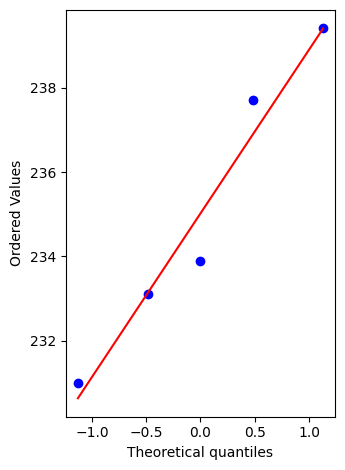

Shapiro-Wilk Test Statistic: 0.9437783754972157, p-value: 0.6927597714479251
The data is normally distributed (fail to reject H0).


In [32]:
#Are the numbers normally distributed?
data = df_10_dis['dis']

# Step 1: Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(data, dist="norm", plot=plt)
plt.title('')

plt.tight_layout()
plt.show()

# Step 2: Shapiro-Wilk Test
shapiro_stat, shapiro_p = stats.shapiro(data)
print(f'Shapiro-Wilk Test Statistic: {shapiro_stat}, p-value: {shapiro_p}')

# Interpretation of the p-value
alpha = 0.01
if shapiro_p > alpha:
    print("The data is normally distributed (fail to reject H0).")
else:
    print("The data is not normally distributed (reject H0).")

#### Significant differences between the 5 groups

In [33]:
# t-test for df_10_dis
data = df_10_dis['dis']
name = df_10_dis['index']

# Function to perform one-sample t-test
def perform_ttest(value):
    t_stat, p_value = stats.ttest_1samp(data, value)
    return (value, t_stat, p_value)

# Use reduce to apply the t-test to each value in the data
results = [perform_ttest(value) for value in data]

# Print results
num=0
for value, t_stat, p_value in results:
    print(f"For {name[num]}")
    print(f"Comparing value {value} against the group mean:")
    print(f"  t-statistic: {t_stat:.4f}")
    print(f"  p-value: {p_value:.4f}")
    num+=1
    
    if p_value > 0.05:
        print("  Fail to reject the null hypothesis (H0): Not significantly different from the mean.\n")
    else:
        print("  Reject the null hypothesis (H0): Significantly different from the mean.\n")

For 1-10
Comparing value 233.9 against the group mean:
  t-statistic: 0.7270
  p-value: 0.5075
  Fail to reject the null hypothesis (H0): Not significantly different from the mean.

For 11-20
Comparing value 237.7 against the group mean:
  t-statistic: -1.7396
  p-value: 0.1569
  Fail to reject the null hypothesis (H0): Not significantly different from the mean.

For 21-30
Comparing value 239.4 against the group mean:
  t-statistic: -2.8431
  p-value: 0.0467
  Reject the null hypothesis (H0): Significantly different from the mean.

For 31-40
Comparing value 233.1 against the group mean:
  t-statistic: 1.2463
  p-value: 0.2807
  Fail to reject the null hypothesis (H0): Not significantly different from the mean.

For 41-50
Comparing value 231.0 against the group mean:
  t-statistic: 2.6094
  p-value: 0.0595
  Fail to reject the null hypothesis (H0): Not significantly different from the mean.



21-30 appear signifcantly more in draws

#### ML features for group of 5

##### Cumsum

In [34]:
df_5_cumsum=df_1sthalf.iloc[:,14:19].cumsum()
df_5_cumsum['total']=df_5_cumsum.sum(axis=1)
df_5_cumsum=df_5_cumsum.div(df_5_cumsum['total'],axis=0)
df_5_cumsum.drop('total',axis=1,inplace=True)
df_5_cumsum.columns = ['1_10_vertical_cumsum','11_20_vertical_cumsum','21_30_vertical_cumsum','31_40_vertical_cumsum','41_50_vertical_cumsum']
df_5_cumsum

,1_10_vertical_cumsum,11_20_vertical_cumsum,21_30_vertical_cumsum,31_40_vertical_cumsum,41_50_vertical_cumsum
0,0.000000,0.333333,0.166667,0.333333,0.166667
1,0.083333,0.333333,0.083333,0.333333,0.166667
2,0.166667,0.222222,0.166667,0.333333,0.111111
3,0.125000,0.208333,0.166667,0.291667,0.208333
4,0.200000,0.233333,0.133333,0.266667,0.166667
...,...,...,...,...,...
1915,0.202940,0.205985,0.207898,0.202331,0.180846
1916,0.202921,0.206051,0.207964,0.202313,0.180751
1917,0.202989,0.206204,0.207942,0.202207,0.180657
1918,0.203057,0.206271,0.207834,0.202275,0.180563


In [35]:
df_5_1stto6th_cumsum = df_5_1stto6th.iloc[:,6:]

def calculate_vertical_cumsum(df, start_col, num_cols):
    """Calculate cumulative sums and proportions for a specific position"""
    # Select columns for this position
    df_vertical = df.iloc[:, start_col:start_col+num_cols]
    
    # Calculate cumulative sums
    df_cumsum = df_vertical.cumsum()
    
    # Calculate proportions
    total = df_cumsum.sum(axis=1)
    df_cumsum = df_cumsum.div(total, axis=0)
    
    return df_cumsum

# Calculate cumsum for each position and store in a list
position_dfs = []
for pos in range(1, 7):  # 6 positions
    start_col = (pos-1)*5  # 5 columns per position
    df_result = calculate_vertical_cumsum(df_5_1stto6th_cumsum, start_col, 5)
    # Rename columns to include position number
    df_result.columns = [f'{i*10}_cumsum_{pos}' for i in range(1, 6)]
    position_dfs.append(df_result)
    exec(f'df_vertical_{pos}_cumsum = df_result')

# Concatenate all position DataFrames
df_vertical_all_cumsum = pd.concat(position_dfs, axis=1)
df_vertical_all_cumsum

,10_cumsum_1,20_cumsum_1,30_cumsum_1,40_cumsum_1,50_cumsum_1,10_cumsum_2,20_cumsum_2,30_cumsum_2,40_cumsum_2,50_cumsum_2,...,10_cumsum_5,20_cumsum_5,30_cumsum_5,40_cumsum_5,50_cumsum_5,10_cumsum_6,20_cumsum_6,30_cumsum_6,40_cumsum_6,50_cumsum_6
0,0.000000,1.000000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1,0.500000,0.500000,0.000000,0.000000,0.0,0.000000,1.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
2,0.666667,0.333333,0.000000,0.000000,0.0,0.333333,0.666667,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.666667
3,0.500000,0.500000,0.000000,0.000000,0.0,0.250000,0.500000,0.250000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.750000,0.250000,0.000000,0.000000,0.000000,0.250000,0.750000
4,0.600000,0.400000,0.000000,0.000000,0.0,0.400000,0.400000,0.200000,0.000000,0.0,...,0.000000,0.200000,0.000000,0.600000,0.200000,0.000000,0.000000,0.000000,0.400000,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,0.759916,0.200939,0.037056,0.002088,0.0,0.352296,0.462422,0.165971,0.019311,0.0,...,0.002610,0.038100,0.192067,0.467119,0.300104,0.000522,0.003653,0.047495,0.230167,0.718163
1916,0.760042,0.200835,0.037037,0.002087,0.0,0.352113,0.462702,0.165884,0.019301,0.0,...,0.002608,0.038080,0.192488,0.466875,0.299948,0.000522,0.003652,0.047470,0.230569,0.717788
1917,0.760167,0.200730,0.037018,0.002086,0.0,0.352450,0.462461,0.165798,0.019291,0.0,...,0.002607,0.038582,0.192388,0.466632,0.299791,0.000521,0.003650,0.047967,0.230448,0.717414
1918,0.760292,0.200625,0.036998,0.002084,0.0,0.352788,0.462220,0.165711,0.019281,0.0,...,0.002606,0.038562,0.192288,0.466910,0.299635,0.000521,0.003648,0.047942,0.230849,0.717040


In [36]:
df_vertical_cumsum_features = pd.concat([df_5_cumsum, df_vertical_all_cumsum], axis=1)
df_vertical_cumsum_features

,1_10_vertical_cumsum,11_20_vertical_cumsum,21_30_vertical_cumsum,31_40_vertical_cumsum,41_50_vertical_cumsum,10_cumsum_1,20_cumsum_1,30_cumsum_1,40_cumsum_1,50_cumsum_1,...,10_cumsum_5,20_cumsum_5,30_cumsum_5,40_cumsum_5,50_cumsum_5,10_cumsum_6,20_cumsum_6,30_cumsum_6,40_cumsum_6,50_cumsum_6
0,0.000000,0.333333,0.166667,0.333333,0.166667,0.000000,1.000000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1,0.083333,0.333333,0.083333,0.333333,0.166667,0.500000,0.500000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
2,0.166667,0.222222,0.166667,0.333333,0.111111,0.666667,0.333333,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.333333,0.666667
3,0.125000,0.208333,0.166667,0.291667,0.208333,0.500000,0.500000,0.000000,0.000000,0.0,...,0.000000,0.000000,0.000000,0.750000,0.250000,0.000000,0.000000,0.000000,0.250000,0.750000
4,0.200000,0.233333,0.133333,0.266667,0.166667,0.600000,0.400000,0.000000,0.000000,0.0,...,0.000000,0.200000,0.000000,0.600000,0.200000,0.000000,0.000000,0.000000,0.400000,0.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,0.202940,0.205985,0.207898,0.202331,0.180846,0.759916,0.200939,0.037056,0.002088,0.0,...,0.002610,0.038100,0.192067,0.467119,0.300104,0.000522,0.003653,0.047495,0.230167,0.718163
1916,0.202921,0.206051,0.207964,0.202313,0.180751,0.760042,0.200835,0.037037,0.002087,0.0,...,0.002608,0.038080,0.192488,0.466875,0.299948,0.000522,0.003652,0.047470,0.230569,0.717788
1917,0.202989,0.206204,0.207942,0.202207,0.180657,0.760167,0.200730,0.037018,0.002086,0.0,...,0.002607,0.038582,0.192388,0.466632,0.299791,0.000521,0.003650,0.047967,0.230448,0.717414
1918,0.203057,0.206271,0.207834,0.202275,0.180563,0.760292,0.200625,0.036998,0.002084,0.0,...,0.002606,0.038562,0.192288,0.466910,0.299635,0.000521,0.003648,0.047942,0.230849,0.717040


##### Rolling sum

In [37]:
df_5_rolling = df_1sthalf.iloc[:,14:19].rolling(window=100).sum()
df_5_rolling.iloc[0:100,:] = df_1sthalf.iloc[0:100:,14:19].cumsum()
df_5_rolling['total'] = df_5_rolling.sum(axis=1)
df_5_rolling = df_5_rolling.div(df_5_rolling.total, axis=0)
df_5_rolling.drop('total', axis=1, inplace=True)
df_5_rolling.columns = ['1_10_vertical_rolling', '11_20_vertical_rolling', '21_30_vertical_rolling', '31_40_vertical_rolling', '41_50_vertical_rolling']
df_5_rolling

,1_10_vertical_rolling,11_20_vertical_rolling,21_30_vertical_rolling,31_40_vertical_rolling,41_50_vertical_rolling
0,0.000000,0.333333,0.166667,0.333333,0.166667
1,0.083333,0.333333,0.083333,0.333333,0.166667
2,0.166667,0.222222,0.166667,0.333333,0.111111
3,0.125000,0.208333,0.166667,0.291667,0.208333
4,0.200000,0.233333,0.133333,0.266667,0.166667
...,...,...,...,...,...
1915,0.216667,0.183333,0.211667,0.190000,0.198333
1916,0.216667,0.186667,0.213333,0.188333,0.195000
1917,0.218333,0.190000,0.213333,0.188333,0.190000
1918,0.218333,0.191667,0.210000,0.191667,0.188333


In [38]:
df_5_1stto6th_rolling = df_5_1stto6th.iloc[:,6:]

# Create column names for all ranges and positions
new_columns = []
for pos in range(1, 7):  # 6 positions
    for range_num in [10, 20, 30, 40, 50]:  # 5 ranges
        new_columns.append(f'{range_num}_{pos}_vertical_rolling')

# Assign new column names
df_5_1stto6th_rolling.columns = new_columns
df_5_1stto6th_rolling

,10_1_vertical_rolling,20_1_vertical_rolling,30_1_vertical_rolling,40_1_vertical_rolling,50_1_vertical_rolling,10_2_vertical_rolling,20_2_vertical_rolling,30_2_vertical_rolling,40_2_vertical_rolling,50_2_vertical_rolling,...,10_5_vertical_rolling,20_5_vertical_rolling,30_5_vertical_rolling,40_5_vertical_rolling,50_5_vertical_rolling,10_6_vertical_rolling,20_6_vertical_rolling,30_6_vertical_rolling,40_6_vertical_rolling,50_6_vertical_rolling
0,0,1,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,1,0,0,0,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1
4,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,1,0,0,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
1916,1,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1917,1,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1918,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


In [39]:
# Calculate rolling sum with window=100
df_5_1stto6th_rolling_sum = df_5_1stto6th_rolling.rolling(window=100).sum()

# Fill NaN values with cumulative sums for all columns
num_columns = df_5_1stto6th_rolling.shape[1]
for i in range(0, num_columns, 5):
    df_5_1stto6th_rolling_sum.iloc[0:100, i:i+5] = df_5_1stto6th_rolling.iloc[0:100, i:i+5].cumsum()

df_5_1stto6th_rolling_sum

,10_1_vertical_rolling,20_1_vertical_rolling,30_1_vertical_rolling,40_1_vertical_rolling,50_1_vertical_rolling,10_2_vertical_rolling,20_2_vertical_rolling,30_2_vertical_rolling,40_2_vertical_rolling,50_2_vertical_rolling,...,10_5_vertical_rolling,20_5_vertical_rolling,30_5_vertical_rolling,40_5_vertical_rolling,50_5_vertical_rolling,10_6_vertical_rolling,20_6_vertical_rolling,30_6_vertical_rolling,40_6_vertical_rolling,50_6_vertical_rolling
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1.0,1.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,2.0
2,2.0,1.0,0.0,0.0,0.0,1.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,2.0
3,2.0,2.0,0.0,0.0,0.0,1.0,2.0,1.0,0.0,0.0,...,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0,1.0,3.0
4,3.0,2.0,0.0,0.0,0.0,2.0,2.0,1.0,0.0,0.0,...,0.0,1.0,0.0,3.0,1.0,0.0,0.0,0.0,2.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,76.0,23.0,1.0,0.0,0.0,41.0,43.0,16.0,0.0,0.0,...,0.0,1.0,21.0,47.0,31.0,0.0,0.0,3.0,19.0,78.0
1916,76.0,23.0,1.0,0.0,0.0,41.0,44.0,15.0,0.0,0.0,...,0.0,1.0,22.0,47.0,30.0,0.0,0.0,3.0,20.0,77.0
1917,76.0,23.0,1.0,0.0,0.0,42.0,43.0,15.0,0.0,0.0,...,0.0,2.0,22.0,47.0,29.0,0.0,0.0,4.0,20.0,76.0
1918,76.0,23.0,1.0,0.0,0.0,42.0,43.0,15.0,0.0,0.0,...,0.0,2.0,21.0,48.0,29.0,0.0,0.0,4.0,21.0,75.0


In [40]:
# Calculate rolling sum with window=100
df_5_1stto6th_rolling_sum = df_5_1stto6th_rolling.rolling(window=100).sum()

# Fill NaN values with cumulative sums for all columns
num_columns = df_5_1stto6th_rolling.shape[1]
for i in range(0, num_columns, 5):
    df_5_1stto6th_rolling_sum.iloc[0:100, i:i+5] = df_5_1stto6th_rolling.iloc[0:100, i:i+5].cumsum()

# Calculate total for each row
df_5_1stto6th_rolling_sum['total'] = df_5_1stto6th_rolling_sum.sum(axis=1)

# Calculate proportions
df_5_1stto6th_rolling_sum = df_5_1stto6th_rolling_sum.div(df_5_1stto6th_rolling_sum.total, axis=0)

# Remove the total column
df_5_1stto6th_rolling_sum = df_5_1stto6th_rolling_sum.drop('total', axis=1)

df_5_1stto6th_rolling_sum

,10_1_vertical_rolling,20_1_vertical_rolling,30_1_vertical_rolling,40_1_vertical_rolling,50_1_vertical_rolling,10_2_vertical_rolling,20_2_vertical_rolling,30_2_vertical_rolling,40_2_vertical_rolling,50_2_vertical_rolling,...,10_5_vertical_rolling,20_5_vertical_rolling,30_5_vertical_rolling,40_5_vertical_rolling,50_5_vertical_rolling,10_6_vertical_rolling,20_6_vertical_rolling,30_6_vertical_rolling,40_6_vertical_rolling,50_6_vertical_rolling
0,0.000000,0.166667,0.000000,0.0,0.0,0.000000,0.166667,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.166667,0.000000,0.0,0.0,0.000000,0.000000,0.166667
1,0.083333,0.083333,0.000000,0.0,0.0,0.000000,0.166667,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.166667,0.000000,0.0,0.0,0.000000,0.000000,0.166667
2,0.111111,0.055556,0.000000,0.0,0.0,0.055556,0.111111,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.166667,0.000000,0.0,0.0,0.000000,0.055556,0.111111
3,0.083333,0.083333,0.000000,0.0,0.0,0.041667,0.083333,0.041667,0.0,0.0,...,0.0,0.000000,0.000000,0.125000,0.041667,0.0,0.0,0.000000,0.041667,0.125000
4,0.100000,0.066667,0.000000,0.0,0.0,0.066667,0.066667,0.033333,0.0,0.0,...,0.0,0.033333,0.000000,0.100000,0.033333,0.0,0.0,0.000000,0.066667,0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,0.126667,0.038333,0.001667,0.0,0.0,0.068333,0.071667,0.026667,0.0,0.0,...,0.0,0.001667,0.035000,0.078333,0.051667,0.0,0.0,0.005000,0.031667,0.130000
1916,0.126667,0.038333,0.001667,0.0,0.0,0.068333,0.073333,0.025000,0.0,0.0,...,0.0,0.001667,0.036667,0.078333,0.050000,0.0,0.0,0.005000,0.033333,0.128333
1917,0.126667,0.038333,0.001667,0.0,0.0,0.070000,0.071667,0.025000,0.0,0.0,...,0.0,0.003333,0.036667,0.078333,0.048333,0.0,0.0,0.006667,0.033333,0.126667
1918,0.126667,0.038333,0.001667,0.0,0.0,0.070000,0.071667,0.025000,0.0,0.0,...,0.0,0.003333,0.035000,0.080000,0.048333,0.0,0.0,0.006667,0.035000,0.125000


In [41]:
df_5_all_rolling_sum_features = pd.concat([df_5_rolling, df_5_1stto6th_rolling_sum], axis=1)
df_5_all_rolling_sum_features

,1_10_vertical_rolling,11_20_vertical_rolling,21_30_vertical_rolling,31_40_vertical_rolling,41_50_vertical_rolling,10_1_vertical_rolling,20_1_vertical_rolling,30_1_vertical_rolling,40_1_vertical_rolling,50_1_vertical_rolling,...,10_5_vertical_rolling,20_5_vertical_rolling,30_5_vertical_rolling,40_5_vertical_rolling,50_5_vertical_rolling,10_6_vertical_rolling,20_6_vertical_rolling,30_6_vertical_rolling,40_6_vertical_rolling,50_6_vertical_rolling
0,0.000000,0.333333,0.166667,0.333333,0.166667,0.000000,0.166667,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.166667,0.000000,0.0,0.0,0.000000,0.000000,0.166667
1,0.083333,0.333333,0.083333,0.333333,0.166667,0.083333,0.083333,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.166667,0.000000,0.0,0.0,0.000000,0.000000,0.166667
2,0.166667,0.222222,0.166667,0.333333,0.111111,0.111111,0.055556,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.166667,0.000000,0.0,0.0,0.000000,0.055556,0.111111
3,0.125000,0.208333,0.166667,0.291667,0.208333,0.083333,0.083333,0.000000,0.0,0.0,...,0.0,0.000000,0.000000,0.125000,0.041667,0.0,0.0,0.000000,0.041667,0.125000
4,0.200000,0.233333,0.133333,0.266667,0.166667,0.100000,0.066667,0.000000,0.0,0.0,...,0.0,0.033333,0.000000,0.100000,0.033333,0.0,0.0,0.000000,0.066667,0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,0.216667,0.183333,0.211667,0.190000,0.198333,0.126667,0.038333,0.001667,0.0,0.0,...,0.0,0.001667,0.035000,0.078333,0.051667,0.0,0.0,0.005000,0.031667,0.130000
1916,0.216667,0.186667,0.213333,0.188333,0.195000,0.126667,0.038333,0.001667,0.0,0.0,...,0.0,0.001667,0.036667,0.078333,0.050000,0.0,0.0,0.005000,0.033333,0.128333
1917,0.218333,0.190000,0.213333,0.188333,0.190000,0.126667,0.038333,0.001667,0.0,0.0,...,0.0,0.003333,0.036667,0.078333,0.048333,0.0,0.0,0.006667,0.033333,0.126667
1918,0.218333,0.191667,0.210000,0.191667,0.188333,0.126667,0.038333,0.001667,0.0,0.0,...,0.0,0.003333,0.035000,0.080000,0.048333,0.0,0.0,0.006667,0.035000,0.125000


In [42]:
# concat both vertical cumsum and rolling sum
df_vertical_all_features = pd.concat([df_vertical_cumsum_features, df_5_all_rolling_sum_features], axis=1)
df_vertical_all_features

,1_10_vertical_cumsum,11_20_vertical_cumsum,21_30_vertical_cumsum,31_40_vertical_cumsum,41_50_vertical_cumsum,10_cumsum_1,20_cumsum_1,30_cumsum_1,40_cumsum_1,50_cumsum_1,...,10_5_vertical_rolling,20_5_vertical_rolling,30_5_vertical_rolling,40_5_vertical_rolling,50_5_vertical_rolling,10_6_vertical_rolling,20_6_vertical_rolling,30_6_vertical_rolling,40_6_vertical_rolling,50_6_vertical_rolling
0,0.000000,0.333333,0.166667,0.333333,0.166667,0.000000,1.000000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.166667,0.000000,0.0,0.0,0.000000,0.000000,0.166667
1,0.083333,0.333333,0.083333,0.333333,0.166667,0.500000,0.500000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.166667,0.000000,0.0,0.0,0.000000,0.000000,0.166667
2,0.166667,0.222222,0.166667,0.333333,0.111111,0.666667,0.333333,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.166667,0.000000,0.0,0.0,0.000000,0.055556,0.111111
3,0.125000,0.208333,0.166667,0.291667,0.208333,0.500000,0.500000,0.000000,0.000000,0.0,...,0.0,0.000000,0.000000,0.125000,0.041667,0.0,0.0,0.000000,0.041667,0.125000
4,0.200000,0.233333,0.133333,0.266667,0.166667,0.600000,0.400000,0.000000,0.000000,0.0,...,0.0,0.033333,0.000000,0.100000,0.033333,0.0,0.0,0.000000,0.066667,0.100000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,0.202940,0.205985,0.207898,0.202331,0.180846,0.759916,0.200939,0.037056,0.002088,0.0,...,0.0,0.001667,0.035000,0.078333,0.051667,0.0,0.0,0.005000,0.031667,0.130000
1916,0.202921,0.206051,0.207964,0.202313,0.180751,0.760042,0.200835,0.037037,0.002087,0.0,...,0.0,0.001667,0.036667,0.078333,0.050000,0.0,0.0,0.005000,0.033333,0.128333
1917,0.202989,0.206204,0.207942,0.202207,0.180657,0.760167,0.200730,0.037018,0.002086,0.0,...,0.0,0.003333,0.036667,0.078333,0.048333,0.0,0.0,0.006667,0.033333,0.126667
1918,0.203057,0.206271,0.207834,0.202275,0.180563,0.760292,0.200625,0.036998,0.002084,0.0,...,0.0,0.003333,0.035000,0.080000,0.048333,0.0,0.0,0.006667,0.035000,0.125000


### Grouping by the colour of the balls

*[Back To Table Content](#table-of-contents)*

In [43]:
# Define RGB sets
R = {1, 2, 12, 13, 23, 24, 34, 35, 45, 46, 7, 8, 18, 19, 29, 30, 40}
G = {11, 21, 22, 32, 33, 43, 44, 5, 6, 16, 17, 27, 28, 38, 39, 49}
B = {41, 31, 42, 3, 4, 14, 15, 25, 26, 36, 37, 47, 48, 9, 10, 20}

len(R), len(G), len(B)

(17, 16, 16)

In [44]:
df_colour_total = df_cols.copy()

# Initialize new columns
df_colour_total['R'] = 0
df_colour_total['G'] = 0
df_colour_total['B'] = 0

# Count frequency of RGB values
for index, row in df_colour_total.iterrows():
    for value in row:
        if value in R:
            df_colour_total.at[index, 'R'] += 1
        if value in G:
            df_colour_total.at[index, 'G'] += 1
        if value in B:
            df_colour_total.at[index, 'B'] += 1

df_colour_total

,1st,2nd,3rd,4th,5th,6th,R,G,B
0,14,18,30,36,40,42,3,0,3
1,7,14,19,31,36,45,3,0,3
2,3,6,24,25,34,37,2,1,3
3,16,22,33,43,48,49,0,5,1
4,3,4,6,12,18,32,2,2,2
...,...,...,...,...,...,...,...,...,...
1915,1,2,29,37,42,48,3,0,3
1916,10,12,18,21,27,33,2,3,1
1917,4,7,14,15,19,26,2,0,4
1918,4,9,16,20,38,39,0,3,3


In [45]:
df_colour_1stto6th = df_cols.copy()

# Process each position (1st to 6th)
positions = ['1st', '2nd', '3rd', '4th', '5th', '6th']
for pos in positions:
    # Initialize RGB columns for this position
    df_colour_1stto6th[f'R_{pos}'] = 0
    df_colour_1stto6th[f'G_{pos}'] = 0
    df_colour_1stto6th[f'B_{pos}'] = 0
    
    # Count RGB values for this position
    for index, value in df_colour_1stto6th[pos].items():
        if value in R:
            df_colour_1stto6th.at[index, f'R_{pos}'] = 1
        if value in G:
            df_colour_1stto6th.at[index, f'G_{pos}'] = 1
        if value in B:
            df_colour_1stto6th.at[index, f'B_{pos}'] = 1

df_colour_1stto6th.drop(positions, axis=1, inplace=True)
df_colour_1stto6th

,R_1st,G_1st,B_1st,R_2nd,G_2nd,B_2nd,R_3rd,G_3rd,B_3rd,R_4th,G_4th,B_4th,R_5th,G_5th,B_5th,R_6th,G_6th,B_6th
0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1
1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0
2,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1
3,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0
4,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1
1916,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0
1917,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1
1918,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0


In [46]:
#R has one more ball than G and B, so manipulation is needed
R_count=df_colour_total['R'].sum()/17
G_count=df_colour_total['G'].sum()/16
B_count=df_colour_total['B'].sum()/16

R_count, G_count, B_count

(np.float64(238.76470588235293), np.float64(236.0), np.float64(230.3125))

#### Distribution of the 3 groups

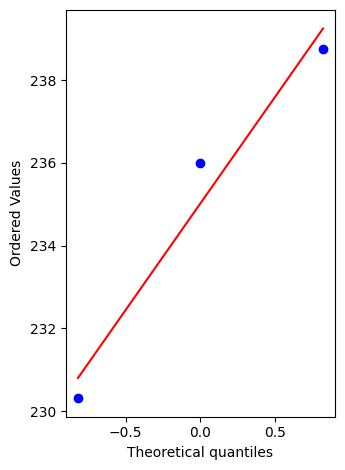

Shapiro-Wilk Test Statistic: 0.9616681064817878, p-value: 0.6236465419262958
The data is normally distributed (fail to reject H0).


In [47]:
#Are the numbers normally distributed?
data=[R_count, G_count, B_count]

# Step 1: Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(data, dist="norm", plot=plt)
plt.title('')

plt.tight_layout()
plt.show()

# Step 2: Shapiro-Wilk Test
shapiro_stat, shapiro_p = stats.shapiro(data)
print(f'Shapiro-Wilk Test Statistic: {shapiro_stat}, p-value: {shapiro_p}')

# Interpretation of the p-value
alpha = 0.01
if shapiro_p > alpha:
    print("The data is normally distributed (fail to reject H0).")
else:
    print("The data is not normally distributed (reject H0).")

#### ML features for group of 3

##### Cumsum

In [48]:
df_colour_total_cumsum = df_cols.copy()

# Initialize new columns
df_colour_total_cumsum['R'] = 0
df_colour_total_cumsum['G'] = 0
df_colour_total_cumsum['B'] = 0

# Count frequency of RGB values
for index, row in df_colour_total_cumsum.iterrows():
    for value in row:
        if value in R:
            df_colour_total_cumsum.at[index, 'R'] += 1
        if value in G:
            df_colour_total_cumsum.at[index, 'G'] += 1
        if value in B:
            df_colour_total_cumsum.at[index, 'B'] += 1

# Calculate cumulative sums
df_colour_total_cumsum['R_cumsum'] = df_colour_total_cumsum['R'].cumsum()
df_colour_total_cumsum['G_cumsum'] = df_colour_total_cumsum['G'].cumsum()
df_colour_total_cumsum['B_cumsum'] = df_colour_total_cumsum['B'].cumsum()

# Calculate proportions
total = df_colour_total_cumsum[['R_cumsum', 'G_cumsum', 'B_cumsum']].sum(axis=1)
df_colour_total_cumsum['R_cumsum'] = df_colour_total_cumsum['R_cumsum'].div(total)
df_colour_total_cumsum['G_cumsum'] = df_colour_total_cumsum['G_cumsum'].div(total)
df_colour_total_cumsum['B_cumsum'] = df_colour_total_cumsum['B_cumsum'].div(total)

df_colour_total_cumsum

,1st,2nd,3rd,4th,5th,6th,R,G,B,R_cumsum,G_cumsum,B_cumsum
0,14,18,30,36,40,42,3,0,3,0.500000,0.000000,0.500000
1,7,14,19,31,36,45,3,0,3,0.500000,0.000000,0.500000
2,3,6,24,25,34,37,2,1,3,0.444444,0.055556,0.500000
3,16,22,33,43,48,49,0,5,1,0.333333,0.250000,0.416667
4,3,4,6,12,18,32,2,2,2,0.333333,0.266667,0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...
1915,1,2,29,37,42,48,3,0,3,0.352470,0.327853,0.319676
1916,10,12,18,21,27,33,2,3,1,0.352460,0.327943,0.319597
1917,4,7,14,15,19,26,2,0,4,0.352450,0.327772,0.319778
1918,4,9,16,20,38,39,0,3,3,0.352267,0.327862,0.319871


In [49]:
df_colour_1stto6th_cumsum = df_cols.copy()

# Process each position (1st to 6th)
positions = ['1st', '2nd', '3rd', '4th', '5th', '6th']
for pos in positions:
    # Initialize RGB columns for this position
    df_colour_1stto6th_cumsum[f'R_{pos}'] = 0
    df_colour_1stto6th_cumsum[f'G_{pos}'] = 0
    df_colour_1stto6th_cumsum[f'B_{pos}'] = 0
    
    # Count RGB values for this position
    for index, value in df_colour_1stto6th_cumsum[pos].items():
        if value in R:
            df_colour_1stto6th_cumsum.at[index, f'R_{pos}'] = 1
        if value in G:
            df_colour_1stto6th_cumsum.at[index, f'G_{pos}'] = 1
        if value in B:
            df_colour_1stto6th_cumsum.at[index, f'B_{pos}'] = 1

# Calculate cumulative sums and proportions for all positions
for pos in positions:
    # Calculate cumulative sums
    df_colour_1stto6th_cumsum[f'R_{pos}_cumsum'] = df_colour_1stto6th_cumsum[f'R_{pos}'].cumsum()
    df_colour_1stto6th_cumsum[f'G_{pos}_cumsum'] = df_colour_1stto6th_cumsum[f'G_{pos}'].cumsum()
    df_colour_1stto6th_cumsum[f'B_{pos}_cumsum'] = df_colour_1stto6th_cumsum[f'B_{pos}'].cumsum()
    
    # Calculate proportions
    total = df_colour_1stto6th_cumsum[[f'R_{pos}_cumsum', f'G_{pos}_cumsum', f'B_{pos}_cumsum']].sum(axis=1)
    df_colour_1stto6th_cumsum[f'R_{pos}_cumsum'] = df_colour_1stto6th_cumsum[f'R_{pos}_cumsum'].div(total)
    df_colour_1stto6th_cumsum[f'G_{pos}_cumsum'] = df_colour_1stto6th_cumsum[f'G_{pos}_cumsum'].div(total)
    df_colour_1stto6th_cumsum[f'B_{pos}_cumsum'] = df_colour_1stto6th_cumsum[f'B_{pos}_cumsum'].div(total)

# Keep only cumsum columns
cumsum_columns = [col for col in df_colour_1stto6th_cumsum.columns if 'cumsum' in col]
df_colour_1stto6th_cumsum = df_colour_1stto6th_cumsum[cumsum_columns]

df_colour_1stto6th_cumsum

,R_1st_cumsum,G_1st_cumsum,B_1st_cumsum,R_2nd_cumsum,G_2nd_cumsum,B_2nd_cumsum,R_3rd_cumsum,G_3rd_cumsum,B_3rd_cumsum,R_4th_cumsum,G_4th_cumsum,B_4th_cumsum,R_5th_cumsum,G_5th_cumsum,B_5th_cumsum,R_6th_cumsum,G_6th_cumsum,B_6th_cumsum
0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1,0.500000,0.000000,0.500000,0.500000,0.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,0.500000,0.500000,0.000000,0.500000
2,0.333333,0.000000,0.666667,0.333333,0.333333,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.666667,0.000000,0.333333,0.333333,0.000000,0.666667
3,0.250000,0.250000,0.500000,0.250000,0.500000,0.250000,0.750000,0.250000,0.000000,0.000000,0.250000,0.750000,0.500000,0.000000,0.500000,0.250000,0.250000,0.500000
4,0.200000,0.200000,0.600000,0.200000,0.400000,0.400000,0.600000,0.400000,0.000000,0.200000,0.200000,0.600000,0.600000,0.000000,0.400000,0.200000,0.400000,0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,0.449896,0.210856,0.339248,0.347599,0.305324,0.347077,0.373173,0.343946,0.282881,0.356472,0.369520,0.274008,0.316284,0.366910,0.316806,0.271399,0.370564,0.358038
1916,0.449661,0.210746,0.339593,0.347939,0.305164,0.346896,0.373500,0.343766,0.282733,0.356286,0.369849,0.273865,0.316119,0.367240,0.316641,0.271257,0.370892,0.357851
1917,0.449426,0.210636,0.339937,0.348279,0.305005,0.346715,0.373306,0.343587,0.283107,0.356100,0.369656,0.274244,0.316475,0.367049,0.316475,0.271116,0.370699,0.358186
1918,0.449192,0.210526,0.340281,0.348098,0.304846,0.347056,0.373111,0.343929,0.282960,0.355915,0.369463,0.274622,0.316311,0.367379,0.316311,0.270974,0.371027,0.357999


In [50]:
df_colour_all_cumsum = pd.concat([df_colour_total_cumsum, df_colour_1stto6th_cumsum],axis=1).iloc[:,9:]
df_colour_all_cumsum

,R_cumsum,G_cumsum,B_cumsum,R_1st_cumsum,G_1st_cumsum,B_1st_cumsum,R_2nd_cumsum,G_2nd_cumsum,B_2nd_cumsum,R_3rd_cumsum,...,B_3rd_cumsum,R_4th_cumsum,G_4th_cumsum,B_4th_cumsum,R_5th_cumsum,G_5th_cumsum,B_5th_cumsum,R_6th_cumsum,G_6th_cumsum,B_6th_cumsum
0,0.500000,0.000000,0.500000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
1,0.500000,0.000000,0.500000,0.500000,0.000000,0.500000,0.500000,0.000000,0.500000,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.500000,0.000000,0.500000,0.500000,0.000000,0.500000
2,0.444444,0.055556,0.500000,0.333333,0.000000,0.666667,0.333333,0.333333,0.333333,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.666667,0.000000,0.333333,0.333333,0.000000,0.666667
3,0.333333,0.250000,0.416667,0.250000,0.250000,0.500000,0.250000,0.500000,0.250000,0.750000,...,0.000000,0.000000,0.250000,0.750000,0.500000,0.000000,0.500000,0.250000,0.250000,0.500000
4,0.333333,0.266667,0.400000,0.200000,0.200000,0.600000,0.200000,0.400000,0.400000,0.600000,...,0.000000,0.200000,0.200000,0.600000,0.600000,0.000000,0.400000,0.200000,0.400000,0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,0.352470,0.327853,0.319676,0.449896,0.210856,0.339248,0.347599,0.305324,0.347077,0.373173,...,0.282881,0.356472,0.369520,0.274008,0.316284,0.366910,0.316806,0.271399,0.370564,0.358038
1916,0.352460,0.327943,0.319597,0.449661,0.210746,0.339593,0.347939,0.305164,0.346896,0.373500,...,0.282733,0.356286,0.369849,0.273865,0.316119,0.367240,0.316641,0.271257,0.370892,0.357851
1917,0.352450,0.327772,0.319778,0.449426,0.210636,0.339937,0.348279,0.305005,0.346715,0.373306,...,0.283107,0.356100,0.369656,0.274244,0.316475,0.367049,0.316475,0.271116,0.370699,0.358186
1918,0.352267,0.327862,0.319871,0.449192,0.210526,0.340281,0.348098,0.304846,0.347056,0.373111,...,0.282960,0.355915,0.369463,0.274622,0.316311,0.367379,0.316311,0.270974,0.371027,0.357999


##### Rolling sum

In [51]:
df_colour_total = df_cols.copy()

# Initialize new columns
df_colour_total['R'] = 0
df_colour_total['G'] = 0
df_colour_total['B'] = 0

# Count frequency of RGB values
for index, row in df_colour_total.iterrows():
    for value in row:
        if value in R:
            df_colour_total.at[index, 'R'] += 1
        if value in G:
            df_colour_total.at[index, 'G'] += 1
        if value in B:
            df_colour_total.at[index, 'B'] += 1

# Calculate rolling sums with window=100
df_colour_rolling = df_colour_total[['R', 'G', 'B']].rolling(window=100).sum()

# Fill first 100 rows with cumulative sums
df_colour_rolling.iloc[0:100] = df_colour_total[['R', 'G', 'B']].iloc[0:100].cumsum()

# Calculate proportions
total = df_colour_rolling.sum(axis=1)
df_colour_rolling = df_colour_rolling.div(total, axis=0)

# Rename columns to indicate rolling sums
df_colour_rolling.columns = ['R_rolling', 'G_rolling', 'B_rolling']
df_colour_rolling

,R_rolling,G_rolling,B_rolling
0,0.500000,0.000000,0.500000
1,0.500000,0.000000,0.500000
2,0.444444,0.055556,0.500000
3,0.333333,0.250000,0.416667
4,0.333333,0.266667,0.400000
...,...,...,...
1915,0.323333,0.315000,0.361667
1916,0.321667,0.315000,0.363333
1917,0.321667,0.313333,0.365000
1918,0.316667,0.316667,0.366667


In [52]:
# Process all positions
positions = ['1st', '2nd', '3rd', '4th', '5th', '6th']

for pos in positions:
    # Calculate rolling sums for each position (window=100)
    rgb_cols = [f'R_{pos}', f'G_{pos}', f'B_{pos}']
    rgb_rolling = df_colour_1stto6th[rgb_cols].rolling(window=100).sum()
    
    # Fill first 100 rows with cumulative sums
    rgb_rolling.iloc[0:100, :] = df_colour_1stto6th[rgb_cols].iloc[0:100, :].cumsum()
    
    # Calculate proportions
    rgb_rolling['total'] = rgb_rolling.sum(axis=1)
    rgb_rolling = rgb_rolling.div(rgb_rolling.total, axis=0)
    rgb_rolling = rgb_rolling.drop('total', axis=1)
    
    # Rename columns to indicate rolling sums
    rgb_rolling.columns = [f'R_{pos}_rolling', f'G_{pos}_rolling', f'B_{pos}_rolling']
    
    # Store result in a variable
    exec(f'rgb_{pos}_rolling = rgb_rolling')

# Concatenate all results
rgb_all_rolling = pd.concat([rgb_1st_rolling, rgb_2nd_rolling, rgb_3rd_rolling, 
                            rgb_4th_rolling, rgb_5th_rolling, rgb_6th_rolling], axis=1)

rgb_all_rolling

,R_1st_rolling,G_1st_rolling,B_1st_rolling,R_2nd_rolling,G_2nd_rolling,B_2nd_rolling,R_3rd_rolling,G_3rd_rolling,B_3rd_rolling,R_4th_rolling,G_4th_rolling,B_4th_rolling,R_5th_rolling,G_5th_rolling,B_5th_rolling,R_6th_rolling,G_6th_rolling,B_6th_rolling
0,0.000000,0.00,1.000000,1.000000,0.000000,0.000000,1.00,0.00,0.00,0.00,0.00,1.00,1.000000,0.00,0.000000,0.000000,0.00,1.000000
1,0.500000,0.00,0.500000,0.500000,0.000000,0.500000,1.00,0.00,0.00,0.00,0.00,1.00,0.500000,0.00,0.500000,0.500000,0.00,0.500000
2,0.333333,0.00,0.666667,0.333333,0.333333,0.333333,1.00,0.00,0.00,0.00,0.00,1.00,0.666667,0.00,0.333333,0.333333,0.00,0.666667
3,0.250000,0.25,0.500000,0.250000,0.500000,0.250000,0.75,0.25,0.00,0.00,0.25,0.75,0.500000,0.00,0.500000,0.250000,0.25,0.500000
4,0.200000,0.20,0.600000,0.200000,0.400000,0.400000,0.60,0.40,0.00,0.20,0.20,0.60,0.600000,0.00,0.400000,0.200000,0.40,0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,0.410000,0.28,0.310000,0.370000,0.240000,0.390000,0.29,0.36,0.35,0.34,0.34,0.32,0.350000,0.31,0.340000,0.180000,0.36,0.460000
1916,0.400000,0.28,0.320000,0.370000,0.240000,0.390000,0.30,0.35,0.35,0.33,0.35,0.32,0.350000,0.31,0.340000,0.180000,0.36,0.460000
1917,0.400000,0.28,0.320000,0.380000,0.240000,0.380000,0.29,0.35,0.36,0.32,0.35,0.33,0.360000,0.31,0.330000,0.180000,0.35,0.470000
1918,0.400000,0.28,0.320000,0.380000,0.240000,0.380000,0.28,0.36,0.36,0.32,0.34,0.34,0.350000,0.32,0.330000,0.170000,0.36,0.470000


In [53]:
df_colour_all_rolling = pd.concat([df_colour_rolling, rgb_all_rolling], axis=1)
df_colour_all_rolling

,R_rolling,G_rolling,B_rolling,R_1st_rolling,G_1st_rolling,B_1st_rolling,R_2nd_rolling,G_2nd_rolling,B_2nd_rolling,R_3rd_rolling,...,B_3rd_rolling,R_4th_rolling,G_4th_rolling,B_4th_rolling,R_5th_rolling,G_5th_rolling,B_5th_rolling,R_6th_rolling,G_6th_rolling,B_6th_rolling
0,0.500000,0.000000,0.500000,0.000000,0.00,1.000000,1.000000,0.000000,0.000000,1.00,...,0.00,0.00,0.00,1.00,1.000000,0.00,0.000000,0.000000,0.00,1.000000
1,0.500000,0.000000,0.500000,0.500000,0.00,0.500000,0.500000,0.000000,0.500000,1.00,...,0.00,0.00,0.00,1.00,0.500000,0.00,0.500000,0.500000,0.00,0.500000
2,0.444444,0.055556,0.500000,0.333333,0.00,0.666667,0.333333,0.333333,0.333333,1.00,...,0.00,0.00,0.00,1.00,0.666667,0.00,0.333333,0.333333,0.00,0.666667
3,0.333333,0.250000,0.416667,0.250000,0.25,0.500000,0.250000,0.500000,0.250000,0.75,...,0.00,0.00,0.25,0.75,0.500000,0.00,0.500000,0.250000,0.25,0.500000
4,0.333333,0.266667,0.400000,0.200000,0.20,0.600000,0.200000,0.400000,0.400000,0.60,...,0.00,0.20,0.20,0.60,0.600000,0.00,0.400000,0.200000,0.40,0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,0.323333,0.315000,0.361667,0.410000,0.28,0.310000,0.370000,0.240000,0.390000,0.29,...,0.35,0.34,0.34,0.32,0.350000,0.31,0.340000,0.180000,0.36,0.460000
1916,0.321667,0.315000,0.363333,0.400000,0.28,0.320000,0.370000,0.240000,0.390000,0.30,...,0.35,0.33,0.35,0.32,0.350000,0.31,0.340000,0.180000,0.36,0.460000
1917,0.321667,0.313333,0.365000,0.400000,0.28,0.320000,0.380000,0.240000,0.380000,0.29,...,0.36,0.32,0.35,0.33,0.360000,0.31,0.330000,0.180000,0.35,0.470000
1918,0.316667,0.316667,0.366667,0.400000,0.28,0.320000,0.380000,0.240000,0.380000,0.28,...,0.36,0.32,0.34,0.34,0.350000,0.32,0.330000,0.170000,0.36,0.470000


In [54]:
df_feature_RGB = pd.concat([df_colour_all_cumsum, df_colour_all_rolling], axis = 1)
df_feature_RGB

,R_cumsum,G_cumsum,B_cumsum,R_1st_cumsum,G_1st_cumsum,B_1st_cumsum,R_2nd_cumsum,G_2nd_cumsum,B_2nd_cumsum,R_3rd_cumsum,...,B_3rd_rolling,R_4th_rolling,G_4th_rolling,B_4th_rolling,R_5th_rolling,G_5th_rolling,B_5th_rolling,R_6th_rolling,G_6th_rolling,B_6th_rolling
0,0.500000,0.000000,0.500000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,...,0.00,0.00,0.00,1.00,1.000000,0.00,0.000000,0.000000,0.00,1.000000
1,0.500000,0.000000,0.500000,0.500000,0.000000,0.500000,0.500000,0.000000,0.500000,1.000000,...,0.00,0.00,0.00,1.00,0.500000,0.00,0.500000,0.500000,0.00,0.500000
2,0.444444,0.055556,0.500000,0.333333,0.000000,0.666667,0.333333,0.333333,0.333333,1.000000,...,0.00,0.00,0.00,1.00,0.666667,0.00,0.333333,0.333333,0.00,0.666667
3,0.333333,0.250000,0.416667,0.250000,0.250000,0.500000,0.250000,0.500000,0.250000,0.750000,...,0.00,0.00,0.25,0.75,0.500000,0.00,0.500000,0.250000,0.25,0.500000
4,0.333333,0.266667,0.400000,0.200000,0.200000,0.600000,0.200000,0.400000,0.400000,0.600000,...,0.00,0.20,0.20,0.60,0.600000,0.00,0.400000,0.200000,0.40,0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,0.352470,0.327853,0.319676,0.449896,0.210856,0.339248,0.347599,0.305324,0.347077,0.373173,...,0.35,0.34,0.34,0.32,0.350000,0.31,0.340000,0.180000,0.36,0.460000
1916,0.352460,0.327943,0.319597,0.449661,0.210746,0.339593,0.347939,0.305164,0.346896,0.373500,...,0.35,0.33,0.35,0.32,0.350000,0.31,0.340000,0.180000,0.36,0.460000
1917,0.352450,0.327772,0.319778,0.449426,0.210636,0.339937,0.348279,0.305005,0.346715,0.373306,...,0.36,0.32,0.35,0.33,0.360000,0.31,0.330000,0.180000,0.35,0.470000
1918,0.352267,0.327862,0.319871,0.449192,0.210526,0.340281,0.348098,0.304846,0.347056,0.373111,...,0.36,0.32,0.34,0.34,0.350000,0.32,0.330000,0.170000,0.36,0.470000


### Grouping the numbers into 7 groups
1-7, 8-14, 15-21, 22-28, 29-35, 36-42, 43-49

*[Back To Table Content](#table-of-contents)*

In [55]:
# Create ranges for counting
df_7_dis = df_cols.copy()
ranges = [(1,7), (8,14), (15,21), (22,28), (29,35), (36,42), (43,49)]
positions = ['1st', '2nd', '3rd', '4th', '5th', '6th']

# Count numbers for total (all columns)
for start, end in ranges:
    range_name = f'{start}-{end}'
    df_7_dis[range_name] = df_cols.iloc[:, :6].apply(
        lambda row: sum((row >= start) & (row <= end)), 
        axis=1
    )

# Count numbers for each position separately
for pos_idx, pos in enumerate(positions):
    for start, end in ranges:
        range_name = f'{start}-{end}_{pos}'
        df_7_dis[range_name] = ((df_cols[pos] >= start) & (df_cols[pos] <= end)).astype(int)

df_7_dis

,1st,2nd,3rd,4th,5th,6th,1-7,8-14,15-21,22-28,...,29-35_5th,36-42_5th,43-49_5th,1-7_6th,8-14_6th,15-21_6th,22-28_6th,29-35_6th,36-42_6th,43-49_6th
0,14,18,30,36,40,42,0,1,1,0,...,0,1,0,0,0,0,0,0,1,0
1,7,14,19,31,36,45,1,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,3,6,24,25,34,37,2,0,0,2,...,1,0,0,0,0,0,0,0,1,0
3,16,22,33,43,48,49,0,0,1,1,...,0,0,1,0,0,0,0,0,0,1
4,3,4,6,12,18,32,3,1,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,1,2,29,37,42,48,2,0,0,0,...,0,1,0,0,0,0,0,0,0,1
1916,10,12,18,21,27,33,0,2,2,1,...,0,0,0,0,0,0,0,1,0,0
1917,4,7,14,15,19,26,2,1,2,1,...,0,0,0,0,0,0,1,0,0,0
1918,4,9,16,20,38,39,1,1,2,0,...,0,1,0,0,0,0,0,0,1,0


In [56]:
df_7_dis_sum=df_7_dis[['1-7','8-14','15-21', '22-28','29-35','36-42','43-49']].sum()
df_7_dis_sum=df_7_dis_sum.reset_index(name='dis')
df_7_dis_sum

,index,dis
0,1-7,1632
1,8-14,1664
2,15-21,1665
3,22-28,1645
4,29-35,1734
5,36-42,1527
6,43-49,1653


#### Distribution of the 7 groups

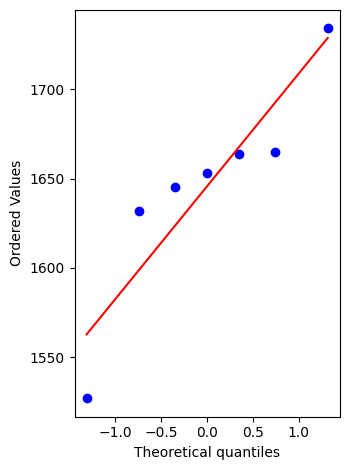

Shapiro-Wilk Test Statistic: 0.8788405294238663, p-value: 0.22135107716109914
The data is normally distributed (fail to reject H0).


In [57]:
#Are the numbers normally distributed?
data=df_7_dis_sum['dis'].copy()

# Step 1: Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(data, dist="norm", plot=plt)
plt.title('')

plt.tight_layout()
plt.show()

# Step 2: Shapiro-Wilk Test
shapiro_stat, shapiro_p = stats.shapiro(data)
print(f'Shapiro-Wilk Test Statistic: {shapiro_stat}, p-value: {shapiro_p}')

# Interpretation of the p-value
alpha = 0.01
if shapiro_p > alpha:
    print("The data is normally distributed (fail to reject H0).")
else:
    print("The data is not normally distributed (reject H0).")

#### Significant differences between the 7 groups

In [58]:
# t-test for df_10_percent_dis
data = df_7_dis_sum['dis'].copy()
name = df_7_dis_sum['index'].copy()

# Function to perform one-sample t-test
def perform_ttest(value):
    t_stat, p_value = stats.ttest_1samp(data, value)
    return (value, t_stat, p_value)

# Use reduce to apply the t-test to each value in the data
results = [perform_ttest(value) for value in data]

# Print results
num=0
for value, t_stat, p_value in results:
    print(f"For {name[num]}")
    print(f"Comparing value {value} against the group mean:")
    print(f"  t-statistic: {t_stat:.4f}")
    print(f"  p-value: {p_value:.4f}")
    num+=1
    
    if p_value > 0.05:
        print("  Fail to reject the null hypothesis (H0): Not significantly different from the mean.\n")
    else:
        print("  Reject the null hypothesis (H0): Significantly different from the mean.\n")

For 1-7
Comparing value 1632 against the group mean:
  t-statistic: 0.5882
  p-value: 0.5779
  Fail to reject the null hypothesis (H0): Not significantly different from the mean.

For 8-14
Comparing value 1664 against the group mean:
  t-statistic: -0.7842
  p-value: 0.4627
  Fail to reject the null hypothesis (H0): Not significantly different from the mean.

For 15-21
Comparing value 1665 against the group mean:
  t-statistic: -0.8271
  p-value: 0.4398
  Fail to reject the null hypothesis (H0): Not significantly different from the mean.

For 22-28
Comparing value 1645 against the group mean:
  t-statistic: 0.0306
  p-value: 0.9766
  Fail to reject the null hypothesis (H0): Not significantly different from the mean.

For 29-35
Comparing value 1734 against the group mean:
  t-statistic: -3.7863
  p-value: 0.0091
  Reject the null hypothesis (H0): Significantly different from the mean.

For 36-42
Comparing value 1527 against the group mean:
  t-statistic: 5.0912
  p-value: 0.0022
  Rejec

Group 29-35 appear significantly more in drawing

Group 36-42 appear significantly lesser in drawing

#### ML features for Group of 7

##### Cumsum

In [59]:
df_7_cumsum_total = df_7_dis.iloc[:,6:13].cumsum()
df_7_cumsum_total['total'] = df_7_cumsum_total.sum(axis=1)
df_7_cumsum_total = df_7_cumsum_total.div(df_7_cumsum_total['total'], axis=0).drop('total',axis=1)
df_7_cumsum_total

,1-7,8-14,15-21,22-28,29-35,36-42,43-49
0,0.000000,0.166667,0.166667,0.000000,0.166667,0.500000,0.000000
1,0.083333,0.166667,0.166667,0.000000,0.166667,0.333333,0.083333
2,0.166667,0.111111,0.111111,0.111111,0.166667,0.277778,0.055556
3,0.125000,0.083333,0.125000,0.125000,0.166667,0.208333,0.166667
4,0.200000,0.100000,0.133333,0.100000,0.166667,0.166667,0.133333
...,...,...,...,...,...,...,...
1915,0.141614,0.144311,0.144224,0.142832,0.150748,0.132481,0.143789
1916,0.141541,0.144410,0.144323,0.142845,0.150756,0.132412,0.143714
1917,0.141641,0.144421,0.144421,0.142857,0.150678,0.132343,0.143639
1918,0.141654,0.144433,0.144520,0.142783,0.150599,0.132447,0.143564


In [60]:
df_7_cumsum_1stto6th = df_7_dis.iloc[:,13:]

def calculate_7_cumsum(df, start_col, num_cols):
    """Calculate cumulative sums and proportions for a specific position"""
    # Select columns for this position
    df_position = df.iloc[:, start_col:start_col+num_cols]
    
    # Calculate cumulative sums
    df_cumsum = df_position.cumsum()
    
    # Calculate proportions
    total = df_cumsum.sum(axis=1)
    df_cumsum = df_cumsum.div(total, axis=0)
    
    return df_cumsum

# Calculate cumsum for each position and store in a list
position_dfs = []
for pos in range(1, 7):
    start_col = (pos-1)*7  # 7 columns per position
    df_result = calculate_7_cumsum(df_7_cumsum_1stto6th, start_col, 7)
    position_dfs.append(df_result)
    exec(f'df_7_cumsum_{pos} = df_result')

# Concatenate all position DataFrames
df_7_all_cumsum = pd.concat(position_dfs, axis=1)
df_7_all_cumsum

,1-7_1st,8-14_1st,15-21_1st,22-28_1st,29-35_1st,36-42_1st,43-49_1st,1-7_2nd,8-14_2nd,15-21_2nd,...,29-35_5th,36-42_5th,43-49_5th,1-7_6th,8-14_6th,15-21_6th,22-28_6th,29-35_6th,36-42_6th,43-49_6th
0,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,1.000000,...,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
1,0.500000,0.500000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.500000,0.500000,...,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000
2,0.666667,0.333333,0.000000,0.000000,0.000000,0.0,0.0,0.333333,0.333333,0.333333,...,0.333333,0.666667,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.666667,0.333333
3,0.500000,0.250000,0.250000,0.000000,0.000000,0.0,0.0,0.250000,0.250000,0.250000,...,0.250000,0.500000,0.250000,0.0,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000
4,0.600000,0.200000,0.200000,0.000000,0.000000,0.0,0.0,0.400000,0.200000,0.200000,...,0.200000,0.400000,0.200000,0.0,0.000000,0.000000,0.000000,0.200000,0.400000,0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,0.608559,0.278706,0.084029,0.024530,0.004175,0.0,0.0,0.200939,0.363779,0.279228,...,0.278706,0.353862,0.197286,0.0,0.001044,0.003653,0.027662,0.103340,0.231211,0.633090
1916,0.608242,0.279082,0.083985,0.024517,0.004173,0.0,0.0,0.200835,0.364111,0.279082,...,0.278560,0.353678,0.197183,0.0,0.001043,0.003652,0.027647,0.103808,0.231090,0.632760
1917,0.608446,0.278936,0.083942,0.024505,0.004171,0.0,0.0,0.201251,0.363921,0.278936,...,0.278415,0.353493,0.197080,0.0,0.001043,0.003650,0.028154,0.103754,0.230970,0.632430
1918,0.608650,0.278791,0.083898,0.024492,0.004169,0.0,0.0,0.201146,0.364252,0.278791,...,0.278270,0.353830,0.196978,0.0,0.001042,0.003648,0.028140,0.103700,0.231371,0.632100


In [61]:
df_feature_7_cumsum = pd.concat([df_7_cumsum_total,df_7_all_cumsum], axis=1)
df_feature_7_cumsum

,1-7,8-14,15-21,22-28,29-35,36-42,43-49,1-7_1st,8-14_1st,15-21_1st,...,29-35_5th,36-42_5th,43-49_5th,1-7_6th,8-14_6th,15-21_6th,22-28_6th,29-35_6th,36-42_6th,43-49_6th
0,0.000000,0.166667,0.166667,0.000000,0.166667,0.500000,0.000000,0.000000,1.000000,0.000000,...,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
1,0.083333,0.166667,0.166667,0.000000,0.166667,0.333333,0.083333,0.500000,0.500000,0.000000,...,0.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000
2,0.166667,0.111111,0.111111,0.111111,0.166667,0.277778,0.055556,0.666667,0.333333,0.000000,...,0.333333,0.666667,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.666667,0.333333
3,0.125000,0.083333,0.125000,0.125000,0.166667,0.208333,0.166667,0.500000,0.250000,0.250000,...,0.250000,0.500000,0.250000,0.0,0.000000,0.000000,0.000000,0.000000,0.500000,0.500000
4,0.200000,0.100000,0.133333,0.100000,0.166667,0.166667,0.133333,0.600000,0.200000,0.200000,...,0.200000,0.400000,0.200000,0.0,0.000000,0.000000,0.000000,0.200000,0.400000,0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,0.141614,0.144311,0.144224,0.142832,0.150748,0.132481,0.143789,0.608559,0.278706,0.084029,...,0.278706,0.353862,0.197286,0.0,0.001044,0.003653,0.027662,0.103340,0.231211,0.633090
1916,0.141541,0.144410,0.144323,0.142845,0.150756,0.132412,0.143714,0.608242,0.279082,0.083985,...,0.278560,0.353678,0.197183,0.0,0.001043,0.003652,0.027647,0.103808,0.231090,0.632760
1917,0.141641,0.144421,0.144421,0.142857,0.150678,0.132343,0.143639,0.608446,0.278936,0.083942,...,0.278415,0.353493,0.197080,0.0,0.001043,0.003650,0.028154,0.103754,0.230970,0.632430
1918,0.141654,0.144433,0.144520,0.142783,0.150599,0.132447,0.143564,0.608650,0.278791,0.083898,...,0.278270,0.353830,0.196978,0.0,0.001042,0.003648,0.028140,0.103700,0.231371,0.632100


##### Rolling sum

In [62]:
df_7_rolling_total = df_7_dis.iloc[:,6:13].rolling(window = 100).sum()
df_7_rolling_total.iloc[0:100,:] = df_7_dis.iloc[0:100,6:13].cumsum()
df_7_rolling_total['total'] = df_7_rolling_total.sum(axis = 1)
df_7_rolling_total = df_7_rolling_total.divide(df_7_rolling_total.total, axis=0).drop('total', axis=1)
df_7_rolling_total

,1-7,8-14,15-21,22-28,29-35,36-42,43-49
0,0.000000,0.166667,0.166667,0.000000,0.166667,0.500000,0.000000
1,0.083333,0.166667,0.166667,0.000000,0.166667,0.333333,0.083333
2,0.166667,0.111111,0.111111,0.111111,0.166667,0.277778,0.055556
3,0.125000,0.083333,0.125000,0.125000,0.166667,0.208333,0.166667
4,0.200000,0.100000,0.133333,0.100000,0.166667,0.166667,0.133333
...,...,...,...,...,...,...,...
1915,0.138333,0.151667,0.128333,0.140000,0.161667,0.116667,0.163333
1916,0.136667,0.155000,0.131667,0.141667,0.158333,0.116667,0.160000
1917,0.140000,0.155000,0.133333,0.141667,0.158333,0.116667,0.155000
1918,0.141667,0.153333,0.135000,0.140000,0.156667,0.120000,0.153333


In [63]:
df_7_rolling_1stto6th = df_7_dis.iloc[:,13:]

def calculate_7_dis_rolling(df, start_col, num_cols, window=100):
    """Calculate rolling sums and proportions for a specific position"""
    df_position = df.iloc[:, start_col:start_col+num_cols]
    
    # Calculate rolling sums
    df_rolling = df_position.rolling(window=window).sum()
    
    # Fill first window-1 rows with cumulative sum
    df_rolling.iloc[0:window, :] = df_position.iloc[0:window, :].cumsum()
    
    # Calculate proportions
    total = df_rolling.sum(axis=1)
    df_rolling = df_rolling.div(total, axis=0)
    
    return df_rolling

# Calculate rolling sums for each position
position_dfs = []
for pos in range(1, 7):  # 6 positions
    start_col = (pos-1)*7  # 7 columns per position
    df_result = calculate_7_dis_rolling(df_7_rolling_1stto6th, start_col, 7)
    position_dfs.append(df_result)
    exec(f'df_7_dis_{pos}_rolling = df_result')

# Concatenate all position DataFrames
df_7_rolling_1stto6th = pd.concat(position_dfs, axis=1)
df_7_rolling_1stto6th

,1-7_1st,8-14_1st,15-21_1st,22-28_1st,29-35_1st,36-42_1st,43-49_1st,1-7_2nd,8-14_2nd,15-21_2nd,...,29-35_5th,36-42_5th,43-49_5th,1-7_6th,8-14_6th,15-21_6th,22-28_6th,29-35_6th,36-42_6th,43-49_6th
0,0.000000,1.000000,0.00,0.00,0.0,0.0,0.0,0.000000,0.000000,1.000000,...,0.000000,1.000000,0.00,0.0,0.0,0.0,0.00,0.00,1.000000,0.000000
1,0.500000,0.500000,0.00,0.00,0.0,0.0,0.0,0.000000,0.500000,0.500000,...,0.000000,1.000000,0.00,0.0,0.0,0.0,0.00,0.00,0.500000,0.500000
2,0.666667,0.333333,0.00,0.00,0.0,0.0,0.0,0.333333,0.333333,0.333333,...,0.333333,0.666667,0.00,0.0,0.0,0.0,0.00,0.00,0.666667,0.333333
3,0.500000,0.250000,0.25,0.00,0.0,0.0,0.0,0.250000,0.250000,0.250000,...,0.250000,0.500000,0.25,0.0,0.0,0.0,0.00,0.00,0.500000,0.500000
4,0.600000,0.200000,0.20,0.00,0.0,0.0,0.0,0.400000,0.200000,0.200000,...,0.200000,0.400000,0.20,0.0,0.0,0.0,0.00,0.20,0.400000,0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,0.590000,0.340000,0.06,0.01,0.0,0.0,0.0,0.220000,0.380000,0.270000,...,0.360000,0.320000,0.21,0.0,0.0,0.0,0.03,0.08,0.210000,0.680000
1916,0.580000,0.350000,0.06,0.01,0.0,0.0,0.0,0.220000,0.390000,0.270000,...,0.360000,0.320000,0.20,0.0,0.0,0.0,0.03,0.09,0.210000,0.670000
1917,0.590000,0.340000,0.06,0.01,0.0,0.0,0.0,0.230000,0.390000,0.260000,...,0.360000,0.320000,0.19,0.0,0.0,0.0,0.04,0.09,0.210000,0.660000
1918,0.600000,0.330000,0.06,0.01,0.0,0.0,0.0,0.230000,0.390000,0.260000,...,0.350000,0.330000,0.19,0.0,0.0,0.0,0.04,0.09,0.220000,0.650000


In [64]:
df_feature_group_7 = pd.concat([df_7_rolling_total, df_7_rolling_1stto6th], axis=1)
df_feature_group_7

,1-7,8-14,15-21,22-28,29-35,36-42,43-49,1-7_1st,8-14_1st,15-21_1st,...,29-35_5th,36-42_5th,43-49_5th,1-7_6th,8-14_6th,15-21_6th,22-28_6th,29-35_6th,36-42_6th,43-49_6th
0,0.000000,0.166667,0.166667,0.000000,0.166667,0.500000,0.000000,0.000000,1.000000,0.00,...,0.000000,1.000000,0.00,0.0,0.0,0.0,0.00,0.00,1.000000,0.000000
1,0.083333,0.166667,0.166667,0.000000,0.166667,0.333333,0.083333,0.500000,0.500000,0.00,...,0.000000,1.000000,0.00,0.0,0.0,0.0,0.00,0.00,0.500000,0.500000
2,0.166667,0.111111,0.111111,0.111111,0.166667,0.277778,0.055556,0.666667,0.333333,0.00,...,0.333333,0.666667,0.00,0.0,0.0,0.0,0.00,0.00,0.666667,0.333333
3,0.125000,0.083333,0.125000,0.125000,0.166667,0.208333,0.166667,0.500000,0.250000,0.25,...,0.250000,0.500000,0.25,0.0,0.0,0.0,0.00,0.00,0.500000,0.500000
4,0.200000,0.100000,0.133333,0.100000,0.166667,0.166667,0.133333,0.600000,0.200000,0.20,...,0.200000,0.400000,0.20,0.0,0.0,0.0,0.00,0.20,0.400000,0.400000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,0.138333,0.151667,0.128333,0.140000,0.161667,0.116667,0.163333,0.590000,0.340000,0.06,...,0.360000,0.320000,0.21,0.0,0.0,0.0,0.03,0.08,0.210000,0.680000
1916,0.136667,0.155000,0.131667,0.141667,0.158333,0.116667,0.160000,0.580000,0.350000,0.06,...,0.360000,0.320000,0.20,0.0,0.0,0.0,0.03,0.09,0.210000,0.670000
1917,0.140000,0.155000,0.133333,0.141667,0.158333,0.116667,0.155000,0.590000,0.340000,0.06,...,0.360000,0.320000,0.19,0.0,0.0,0.0,0.04,0.09,0.210000,0.660000
1918,0.141667,0.153333,0.135000,0.140000,0.156667,0.120000,0.153333,0.600000,0.330000,0.06,...,0.350000,0.330000,0.19,0.0,0.0,0.0,0.04,0.09,0.220000,0.650000


## Last draw winning number

*[Back To Table Content](#table-of-contents)*

In [195]:
df_fromlast=df_1sthalf['From Last'].value_counts().reset_index()
df_fromlast

,From Last,count
0,32,26
1,8,24
2,12,23
3,47,21
4,18,21
...,...,...
309,"33,36,49",1
310,"23,34",1
311,"15,30,49",1
312,"1,22",1


In [73]:
#merge the data that is calculated together, such as 30,32 and 12,39,49
data = df_fromlast.copy()

# Initialize a list to store the new rows
new_rows = []

# Iterate through each row in the original DataFrame
for index, row in data.iterrows():
    # Split the numbers by comma
    numbers = row['From Last'].split(',')
    count = row['count']
    
    # Create a new entry for each number
    for number in numbers:
        new_rows.append({'From Last': number.strip(), 'count': count})

# Create a new DataFrame from the list of new rows
result = pd.DataFrame(new_rows)

# Group by numbers and sum the times
result = result.groupby('From Last', as_index=False).sum().sort_values(by='count', ascending=False)

# Display the result
print(result)

   From Last  count
4         13     37
16        24     37
3         12     37
9         18     37
27        34     37
25        32     37
47         8     36
5         14     35
7         16     34
20        28     34
13        21     34
30        37     34
33         4     34
2         11     33
22         3     33
26        33     32
12        20     32
24        31     32
38        44     32
40        46     31
43        49     31
37        43     30
39        45     30
8         17     30
23        30     29
41        47     29
17        25     29
0          1     28
29        36     28
28        35     26
10        19     26
46         7     26
45         6     26
6         15     25
19        27     25
36        42     25
15        23     25
42        48     25
32        39     24
1         10     24
11         2     24
48         9     23
14        22     22
21        29     22
31        38     22
18        26     21
35        41     17
34        40     16
44         5     11


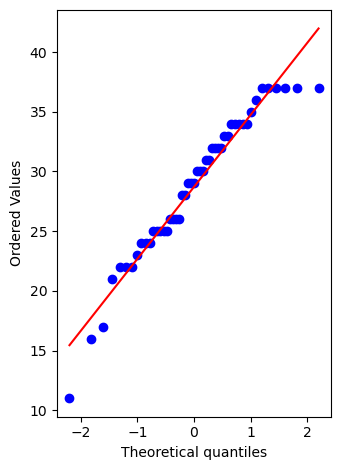

Shapiro-Wilk Test Statistic: 0.9487463280847735, p-value: 0.032868731750978486
The data is normally distributed (fail to reject H0).


In [74]:
#Are the numbers normally distributed?
data = result['count']

# Step 1: Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(data, dist="norm", plot=plt)
plt.title('')

plt.tight_layout()
plt.show()

# Step 2: Shapiro-Wilk Test
shapiro_stat, shapiro_p = stats.shapiro(data)
print(f'Shapiro-Wilk Test Statistic: {shapiro_stat}, p-value: {shapiro_p}')

# Interpretation of the p-value
alpha = 0.01
if shapiro_p > alpha:
    print("The data is normally distributed (fail to reject H0).")
else:
    print("The data is not normally distributed (reject H0).")

In [75]:
mean = np.mean(result['count'])
std_dev = np.std(result['count'])

mean, std_dev

(np.float64(28.714285714285715), 5.969309261650338)

In [76]:
#since the numbers are normally distributed, we can then calculate z-score to see if there are any numbers have a significant difference
result['z-score']=result['count'].apply(lambda x: (x - mean)/std_dev)
result['z-score alpha 0.05']=result['z-score'].apply(lambda x: 1 if abs(x) > 1.645 else 0)
sign_diff_num=result[result['z-score alpha 0.05']==1]

print("The numbers that have a significant difference, with alpha = 0.05, are", *sign_diff_num['From Last'], sep=' ')

The numbers that have a significant difference, with alpha = 0.05, are 41 40 5


In [77]:
#what if the extra number was included?

Some numbers do have a high chance on repeating itself from draws, could it be the tiny different from the weight or the shape of the balls that cause these minor differences?

## Frequency of each number

*[Back To Table Content](#table-of-contents)*

### Distribution of numbers

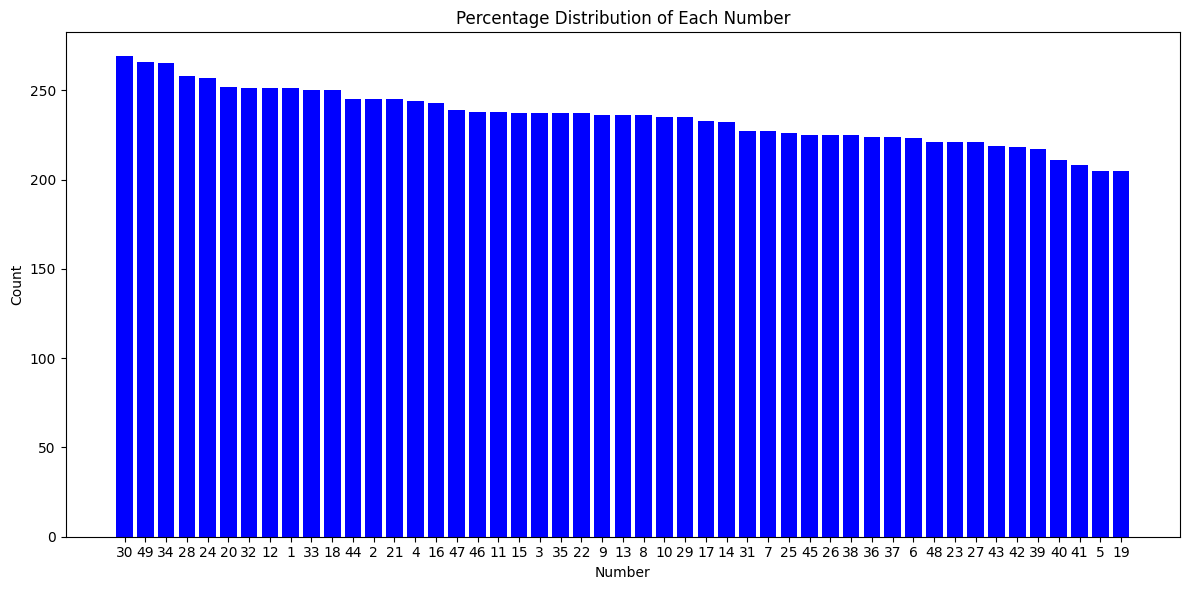

In [65]:
# Assuming df_1sthalf is already defined

# Calculate value counts for each column
df_number_valuecounts = [
    df_1sthalf['1'].value_counts(),
    df_1sthalf['2'].value_counts(),
    df_1sthalf['3'].value_counts(),
    df_1sthalf['4'].value_counts(),
    df_1sthalf['5'].value_counts(),
    df_1sthalf['6'].value_counts()
]

# Reduce to sum counts
result_reduce = reduce(lambda x, y: x.add(y, fill_value=0), df_number_valuecounts)

# Sort by counts
percent_dis = result_reduce.sort_values(ascending=False).reset_index()
percent_dis.columns = ['number', 'count']

# Plotting
plt.figure(figsize=(12, 6))  # Increased width for more space
plt.bar(percent_dis['number'].astype(str), percent_dis['count'], color='blue')
plt.xlabel('Number')
plt.ylabel('Count')
plt.title('Percentage Distribution of Each Number')
plt.xticks(rotation=0)  # Keep them horizontal if preferred
plt.tight_layout()  # Makes sure everything fits without overlap
plt.show()

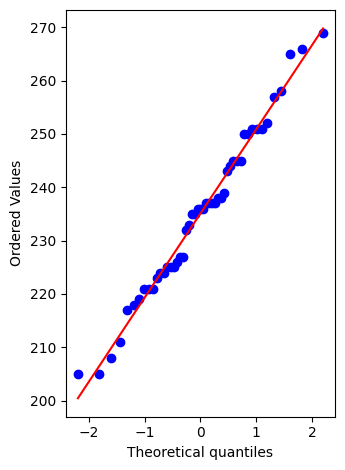

Shapiro-Wilk Test Statistic: 0.9806177414582298, p-value: 0.5914013517624389
The data is normally distributed (fail to reject H0).


In [66]:
#Are the numbers normally distributed?
data = percent_dis['count']

# Step 1: Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(data, dist="norm", plot=plt)
plt.title('')

plt.tight_layout()
plt.show()

# Step 2: Shapiro-Wilk Test
shapiro_stat, shapiro_p = stats.shapiro(data)
print(f'Shapiro-Wilk Test Statistic: {shapiro_stat}, p-value: {shapiro_p}')

# Interpretation of the p-value
alpha = 0.01
if shapiro_p > alpha:
    print("The data is normally distributed (fail to reject H0).")
else:
    print("The data is not normally distributed (reject H0).")

### Significant differences

In [67]:
#since the numbers are normally distributed, we can then calculate z-score to see if there are any numbers have a significant difference
data = percent_dis.copy()
mean = np.mean(percent_dis['count'])
std = np.std(percent_dis['count'])

data['z-score']=data['count'].apply(lambda x: ( x - mean)/std)
data['z-score alpha 0.05']=data['z-score'].apply(lambda x: 1 if abs(x) > 1.645 else 0)
sign_diff_num=data[data['z-score alpha 0.05']==1]

print("The numbers that have a significant difference, with alpha = 0.05, are", *sign_diff_num['number'], sep=' ')

The numbers that have a significant difference, with alpha = 0.05, are 30 49 34 41 5 19


In [68]:
percent_dis

,number,count
0,30,269.0
1,49,266.0
2,34,265.0
3,28,258.0
4,24,257.0
5,20,252.0
6,32,251.0
7,12,251.0
8,1,251.0
9,33,250.0


### ML features for the number distribution

In [69]:
#df_cols number count 1st to 6th respectively
df = df_cols.copy()

# Create a new DataFrame for each column's counts, initialized to 0
count_dfs = {f'{j}': pd.DataFrame(0, index=df.index, columns=[f"{i}" for i in range(1, 50)]) for j in range(1, 7)}

# Loop through each row and each of the 6 columns
for i in range(len(df)):
    for j in range(1, 7):  # Columns 1 to 6 are indexed as 0 to 5
        number = df.iloc[i, j-1]  # Access the column
        if 1 <= number <= 49:  # Check if the number is between 1 and 49
            count_dfs[f'{j}'].at[i, f'{number}'] += 1  # Increment the count for the corresponding column

# Combine all counts into a single DataFrame
df_49_1st_to_6th_total = pd.concat(count_dfs.values(), axis=1)

# Rename columns to maintain 'rolling' format
df_49_1st_to_6th_total.columns = [f'{num}_{col}' for col in range(1, 7) for num in range(1, 50)]

# Display the combined counts DataFrame
df_49_1st_to_6th_total

,1_1,2_1,3_1,4_1,5_1,6_1,7_1,8_1,9_1,10_1,...,40_6,41_6,42_6,43_6,44_6,45_6,46_6,47_6,48_6,49_6
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1916,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1917,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1918,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
#df_col number count 1st to 6th total
df = df_cols.copy()

# Create a new DataFrame with 49 columns named 'rolling_1' to 'rolling_49'
df_49_total = pd.DataFrame(0, index=df.index, columns=[f'{i}' for i in range(1, 50)])

# Loop through each row and each of the 6 columns
for i in range(len(df)):
    for j in range(1, 7):  # Columns 1 to 6 are indexed as 0 to 5
        number = df.iloc[i, j-1]  # Access the column
        if 1 <= number <= 49:  # Check if the number is between 1 and 49
            df_49_total.at[i, f'{number}'] += 1  # Increment the count using the new column name format

# Display the result DataFrame
df_49_total

,1,2,3,4,5,6,7,8,9,10,...,40,41,42,43,44,45,46,47,48,49
0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
4,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1916,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1917,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1918,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [71]:
#df_49_total cumsum
df_49 = pd.concat([df_49_total, df_49_1st_to_6th_total], axis=1)
df_49_cumsum = df_49.cumsum()

# Get first 49 columns and calculate their proportions
df_49_all = df_49_cumsum.iloc[:, :49]
df_49_cumsum_total = df_49_all.sum(axis=1).to_frame()
df_49_all = df_49_all.div(df_49_cumsum_total.values)

# Rename columns to maintain consistent naming convention
df_49_all.columns = [f'cumsum_total_{i}' for i in range(1, 50)]

df_49_all

,cumsum_total_1,cumsum_total_2,cumsum_total_3,cumsum_total_4,cumsum_total_5,cumsum_total_6,cumsum_total_7,cumsum_total_8,cumsum_total_9,cumsum_total_10,...,cumsum_total_40,cumsum_total_41,cumsum_total_42,cumsum_total_43,cumsum_total_44,cumsum_total_45,cumsum_total_46,cumsum_total_47,cumsum_total_48,cumsum_total_49
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.166667,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,...,0.083333,0.000000,0.083333,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.055556,0.000000,0.000000,0.055556,0.055556,0.000000,0.000000,0.000000,...,0.055556,0.000000,0.055556,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.041667,0.000000,0.000000,0.041667,0.041667,0.000000,0.000000,0.000000,...,0.041667,0.000000,0.041667,0.041667,0.000000,0.041667,0.000000,0.000000,0.041667,0.041667
4,0.000000,0.000000,0.066667,0.033333,0.000000,0.066667,0.033333,0.000000,0.000000,0.000000,...,0.033333,0.000000,0.033333,0.033333,0.000000,0.033333,0.000000,0.000000,0.033333,0.033333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,0.021747,0.021312,0.020616,0.021051,0.017832,0.019398,0.019659,0.020529,0.020442,0.020355,...,0.018354,0.018093,0.018963,0.019050,0.021312,0.019572,0.020703,0.020790,0.019224,0.023138
1916,0.021735,0.021301,0.020605,0.021040,0.017823,0.019388,0.019649,0.020518,0.020431,0.020431,...,0.018345,0.018084,0.018953,0.019040,0.021301,0.019562,0.020692,0.020779,0.019214,0.023126
1917,0.021724,0.021290,0.020594,0.021116,0.017814,0.019378,0.019725,0.020507,0.020421,0.020421,...,0.018335,0.018074,0.018943,0.019030,0.021290,0.019552,0.020681,0.020768,0.019204,0.023114
1918,0.021713,0.021278,0.020584,0.021192,0.017804,0.019368,0.019715,0.020497,0.020497,0.020410,...,0.018326,0.018065,0.018933,0.019020,0.021278,0.019541,0.020670,0.020757,0.019194,0.023102


In [72]:
#df_49_1st_to_6th cumsum
df_49_1st_to_6th_cumsum = df_49_cumsum.iloc[:,49:]

def df_49_1st_to_6th(df):
    results = []
    num = 0
    for i in range(0, 6):
        df_49_1_to_6 = df.iloc[:, num:num+49]
        df_49_cumsum_total = df.iloc[:, num:num+49].sum(axis=1).to_frame()
        df_result = df_49_1_to_6.div(df_49_cumsum_total.values)
        # Rename columns to match the rolling format
        df_result.columns = [f'cumsum_{j}_{i+1}' for j in range(1, 50)]
        results.append(df_result)
        num += 49
    final_result = pd.concat(results, axis=1)
    return final_result

df_ = df_49_1st_to_6th(df_49_1st_to_6th_cumsum)
df_

,cumsum_1_1,cumsum_2_1,cumsum_3_1,cumsum_4_1,cumsum_5_1,cumsum_6_1,cumsum_7_1,cumsum_8_1,cumsum_9_1,cumsum_10_1,...,cumsum_40_6,cumsum_41_6,cumsum_42_6,cumsum_43_6,cumsum_44_6,cumsum_45_6,cumsum_46_6,cumsum_47_6,cumsum_48_6,cumsum_49_6
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.500000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.333333,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.250000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.250000
4,0.000000,0.000000,0.400000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.200000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,0.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,0.130480,0.111691,0.097077,0.085073,0.061065,0.060021,0.063152,0.054802,0.051148,0.045407,...,0.036013,0.041754,0.043319,0.054802,0.072547,0.074113,0.091336,0.102818,0.098643,0.138831
1916,0.130412,0.111633,0.097027,0.085029,0.061033,0.059990,0.063119,0.054773,0.051122,0.045905,...,0.035994,0.041732,0.043297,0.054773,0.072509,0.074074,0.091288,0.102765,0.098592,0.138758
1917,0.130344,0.111575,0.096976,0.085506,0.061001,0.059958,0.063087,0.054745,0.051095,0.045881,...,0.035975,0.041710,0.043274,0.054745,0.072471,0.074035,0.091241,0.102711,0.098540,0.138686
1918,0.130276,0.111516,0.096925,0.085982,0.060969,0.059927,0.063054,0.054716,0.051068,0.045857,...,0.035956,0.041688,0.043252,0.054716,0.072434,0.073997,0.091193,0.102658,0.098489,0.138614


In [73]:
#concat with other features
all_49_feature = pd.concat([df_, df_49_all], axis=1)
all_49_feature

,cumsum_1_1,cumsum_2_1,cumsum_3_1,cumsum_4_1,cumsum_5_1,cumsum_6_1,cumsum_7_1,cumsum_8_1,cumsum_9_1,cumsum_10_1,...,cumsum_total_40,cumsum_total_41,cumsum_total_42,cumsum_total_43,cumsum_total_44,cumsum_total_45,cumsum_total_46,cumsum_total_47,cumsum_total_48,cumsum_total_49
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.166667,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,...,0.083333,0.000000,0.083333,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.000000,...,0.055556,0.000000,0.055556,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000
3,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,...,0.041667,0.000000,0.041667,0.041667,0.000000,0.041667,0.000000,0.000000,0.041667,0.041667
4,0.000000,0.000000,0.400000,0.000000,0.000000,0.000000,0.200000,0.000000,0.000000,0.000000,...,0.033333,0.000000,0.033333,0.033333,0.000000,0.033333,0.000000,0.000000,0.033333,0.033333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,0.130480,0.111691,0.097077,0.085073,0.061065,0.060021,0.063152,0.054802,0.051148,0.045407,...,0.018354,0.018093,0.018963,0.019050,0.021312,0.019572,0.020703,0.020790,0.019224,0.023138
1916,0.130412,0.111633,0.097027,0.085029,0.061033,0.059990,0.063119,0.054773,0.051122,0.045905,...,0.018345,0.018084,0.018953,0.019040,0.021301,0.019562,0.020692,0.020779,0.019214,0.023126
1917,0.130344,0.111575,0.096976,0.085506,0.061001,0.059958,0.063087,0.054745,0.051095,0.045881,...,0.018335,0.018074,0.018943,0.019030,0.021290,0.019552,0.020681,0.020768,0.019204,0.023114
1918,0.130276,0.111516,0.096925,0.085982,0.060969,0.059927,0.063054,0.054716,0.051068,0.045857,...,0.018326,0.018065,0.018933,0.019020,0.021278,0.019541,0.020670,0.020757,0.019194,0.023102


In [74]:
# Rolling sum with windows=100 for the 49 numbers
df_rolling = df_49_total.copy()

# Calculate rolling sum with window of 100
df_rolling = df_rolling.rolling(window=100).sum()

# Fill first 100 rows with cumulative sum, then combine with rolling sum
df_rolling = pd.concat([df_49_total.iloc[0:100,:].cumsum(), 
                       df_rolling.iloc[100:,:]], 
                       axis=0)

# Calculate proportions
df_rolling = df_rolling.div(df_rolling.sum(axis=1).to_frame().values)

# Rename columns to maintain consistent naming convention
df_rolling.columns = [f'rolling_total_{i}' for i in range(1, 50)]

df_rolling

,rolling_total_1,rolling_total_2,rolling_total_3,rolling_total_4,rolling_total_5,rolling_total_6,rolling_total_7,rolling_total_8,rolling_total_9,rolling_total_10,...,rolling_total_40,rolling_total_41,rolling_total_42,rolling_total_43,rolling_total_44,rolling_total_45,rolling_total_46,rolling_total_47,rolling_total_48,rolling_total_49
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.166667,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,...,0.083333,0.000000,0.083333,0.000000,0.000000,0.083333,0.000000,0.000,0.000000,0.000000
2,0.000000,0.000000,0.055556,0.000000,0.000000,0.055556,0.055556,0.000000,0.000000,0.000000,...,0.055556,0.000000,0.055556,0.000000,0.000000,0.055556,0.000000,0.000,0.000000,0.000000
3,0.000000,0.000000,0.041667,0.000000,0.000000,0.041667,0.041667,0.000000,0.000000,0.000000,...,0.041667,0.000000,0.041667,0.041667,0.000000,0.041667,0.000000,0.000,0.041667,0.041667
4,0.000000,0.000000,0.066667,0.033333,0.000000,0.066667,0.033333,0.000000,0.000000,0.000000,...,0.033333,0.000000,0.033333,0.033333,0.000000,0.033333,0.000000,0.000,0.033333,0.033333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,0.025000,0.023333,0.010000,0.023333,0.018333,0.026667,0.011667,0.018333,0.028333,0.031667,...,0.008333,0.018333,0.016667,0.016667,0.015000,0.026667,0.016667,0.025,0.030000,0.033333
1916,0.025000,0.021667,0.010000,0.023333,0.018333,0.026667,0.011667,0.018333,0.028333,0.033333,...,0.008333,0.018333,0.016667,0.016667,0.013333,0.026667,0.016667,0.025,0.030000,0.031667
1917,0.025000,0.021667,0.010000,0.025000,0.018333,0.026667,0.013333,0.018333,0.026667,0.033333,...,0.008333,0.018333,0.016667,0.016667,0.013333,0.026667,0.015000,0.025,0.028333,0.030000
1918,0.025000,0.021667,0.010000,0.026667,0.018333,0.026667,0.013333,0.018333,0.026667,0.031667,...,0.008333,0.018333,0.016667,0.016667,0.013333,0.025000,0.015000,0.025,0.028333,0.030000


In [75]:
# Rolling sum with windows = 100 1st to 6th respectively
df_rolling_1st_to_6th = df_49_1st_to_6th_total.copy()

def df_49_1st_to_6th_rolling(df):
    results = []
    num = 0
    for i in range(0, 6):
        df_49_1_to_6_rolling = df.rolling(window=100).sum().iloc[:, num:num+49]  # rolling sum
        df_49_1_to_6_rolling.iloc[0:100, :] = df.iloc[0:100, num:num+49].cumsum()  # first 100 rows are cumsum
        df_49_1_to_6_rolling_total = df_49_1_to_6_rolling.sum(axis=1).to_frame()  # rolling sum total
        df_result = df_49_1_to_6_rolling.div(df_49_1_to_6_rolling_total.values)
        # Rename columns for this section
        df_result.columns = [f'rolling_{j}_{i+1}' for j in range(1, 50)]
        results.append(df_result)
        num += 49

    df_49_1st_to_6th_rolling = pd.concat(results, axis=1)
    return df_49_1st_to_6th_rolling

# Calculate rolling sums and combine results
df_49_1st_to_6th_rolling = df_49_1st_to_6th_rolling(df_rolling_1st_to_6th)
df_49_rolling = pd.concat([df_rolling, df_49_1st_to_6th_rolling], axis=1)

# Rename all columns to ensure consistency
all_columns = ([f'rolling_total_{i}' for i in range(1, 50)] + 
               [f'rolling_{j}_{k}' for k in range(1, 7) for j in range(1, 50)])
df_49_rolling.columns = all_columns

df_49_rolling

,rolling_total_1,rolling_total_2,rolling_total_3,rolling_total_4,rolling_total_5,rolling_total_6,rolling_total_7,rolling_total_8,rolling_total_9,rolling_total_10,...,rolling_40_6,rolling_41_6,rolling_42_6,rolling_43_6,rolling_44_6,rolling_45_6,rolling_46_6,rolling_47_6,rolling_48_6,rolling_49_6
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.00,0.00,1.000000,0.00,0.00,0.000000,0.00,0.00,0.00,0.00
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,...,0.00,0.00,0.500000,0.00,0.00,0.500000,0.00,0.00,0.00,0.00
2,0.000000,0.000000,0.055556,0.000000,0.000000,0.055556,0.055556,0.000000,0.000000,0.000000,...,0.00,0.00,0.333333,0.00,0.00,0.333333,0.00,0.00,0.00,0.00
3,0.000000,0.000000,0.041667,0.000000,0.000000,0.041667,0.041667,0.000000,0.000000,0.000000,...,0.00,0.00,0.250000,0.00,0.00,0.250000,0.00,0.00,0.00,0.25
4,0.000000,0.000000,0.066667,0.033333,0.000000,0.066667,0.033333,0.000000,0.000000,0.000000,...,0.00,0.00,0.200000,0.00,0.00,0.200000,0.00,0.00,0.00,0.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,0.025000,0.023333,0.010000,0.023333,0.018333,0.026667,0.011667,0.018333,0.028333,0.031667,...,0.01,0.06,0.040000,0.05,0.04,0.080000,0.03,0.14,0.14,0.20
1916,0.025000,0.021667,0.010000,0.023333,0.018333,0.026667,0.011667,0.018333,0.028333,0.033333,...,0.01,0.06,0.040000,0.05,0.04,0.080000,0.03,0.14,0.14,0.19
1917,0.025000,0.021667,0.010000,0.025000,0.018333,0.026667,0.013333,0.018333,0.026667,0.033333,...,0.01,0.06,0.040000,0.05,0.04,0.080000,0.03,0.14,0.14,0.18
1918,0.025000,0.021667,0.010000,0.026667,0.018333,0.026667,0.013333,0.018333,0.026667,0.031667,...,0.01,0.06,0.040000,0.05,0.04,0.070000,0.03,0.14,0.14,0.18


In [76]:
df_feature_3 = pd.concat([df_feature_2, df_49_rolling], axis=1)
df_feature_3

NameError: name 'df_feature_2' is not defined

## Numbers Drawn in Specific Positions

### PS. This finding was later found to be flawed, unfortunely, the lottery results were always sorted, thus the position of the balls was not provided. I am still keeping this as a record for educational purpose 13/02/2025

*[Back To Table Content](#table-of-contents)*

In [61]:
print(df_1sthalf.iloc[:,2].value_counts(),
df_1sthalf.iloc[:,3].value_counts(),
df_1sthalf.iloc[:,4].value_counts(),
df_1sthalf.iloc[:,5].value_counts(),
df_1sthalf.iloc[:,6].value_counts(),
df_1sthalf.iloc[:,7].value_counts())

1
1     251
2     214
3     186
4     165
7     121
5     117
6     115
8     105
9      98
10     88
11     75
12     67
14     52
13     50
15     36
16     29
18     26
17     23
21     20
22     17
20     16
19     11
23      8
26      7
24      6
25      4
27      3
28      2
33      2
29      2
30      2
31      1
32      1
Name: count, dtype: int64 2
14    111
12    102
10    100
13     99
8      98
11     97
6      94
9      93
16     92
18     92
15     86
17     81
20     76
5      74
7      71
4      68
21     56
19     52
24     48
3      48
23     43
25     42
22     37
2      31
26     29
27     20
28     18
29     14
30     11
32     10
34      6
36      5
31      5
33      4
37      3
35      2
38      1
39      1
Name: count, dtype: int64 3
24    97
22    89
16    87
21    86
15    86
20    85
19    84
28    81
18    77
17    77
23    76
26    75
25    70
12    66
30    65
13    65
29    60
27    58
31    55
11    53
14    48
32    45
9     39
10    37
33    35
34    3

In [314]:
df = df_1sthalf.iloc[:, 2:8]

# Use value_counts and unstack to get counts of each number in each column
value_counts = df.apply(pd.Series.value_counts).fillna(0)

# Now we can filter based on the number of columns a number appears in
results = {}

# Iterate through the counts of columns (1 to 6)
for num_columns in range(1, 7):
    # Get numbers that appear in exactly `num_columns` different columns
    filtered_numbers = (value_counts > 0).sum(axis=1)

    # Extract the numbers that appear in the specified number of columns
    numbers = filtered_numbers[filtered_numbers == num_columns].index.tolist()
    
    # Store the results with their respective columns
    results[num_columns] = {
        number: list(df.columns[df.eq(number).any()]) for number in numbers
    }

# Print results
for n in range(1, 7):
    print(f"\nNumbers that appear in {n} columns:")
    for number, columns in results[n].items():
        print(f"Number: {number}, Columns: {columns}")


Numbers that appear in 1 columns:
Number: 1, Columns: ['1']
Number: 49, Columns: ['6']

Numbers that appear in 2 columns:
Number: 2, Columns: ['1', '2']
Number: 48, Columns: ['5', '6']

Numbers that appear in 3 columns:
Number: 3, Columns: ['1', '2', '3']
Number: 43, Columns: ['4', '5', '6']
Number: 45, Columns: ['4', '5', '6']
Number: 46, Columns: ['4', '5', '6']
Number: 47, Columns: ['4', '5', '6']

Numbers that appear in 4 columns:
Number: 4, Columns: ['1', '2', '3', '4']
Number: 5, Columns: ['1', '2', '3', '4']
Number: 6, Columns: ['1', '2', '3', '4']
Number: 40, Columns: ['3', '4', '5', '6']
Number: 41, Columns: ['3', '4', '5', '6']
Number: 42, Columns: ['3', '4', '5', '6']
Number: 44, Columns: ['3', '4', '5', '6']

Numbers that appear in 5 columns:
Number: 7, Columns: ['1', '2', '3', '4', '5']
Number: 8, Columns: ['1', '2', '3', '4', '5']
Number: 9, Columns: ['1', '2', '3', '4', '5']
Number: 11, Columns: ['1', '2', '3', '4', '5']
Number: 12, Columns: ['1', '2', '3', '4', '5']
Nu

Some numbers only would be drew in certain positions, since 2008

for eg.

number 1 would only appear in the 2nd draw

number49 would only appear in the 6th draw

## Number Combinations

Numbers that appear next to each other numerically in the same lottery draw

*[Back To Table Content](#table-of-contents)*

In [37]:
#the results would have around 67k rows, it might take a bit more time.

df=df_1sthalf.iloc[::,2:8]

# List to store all combinations
all_combinations = []

# Iterate through each row and collect combinations of sizes 2, 3, 4, and 5
for index, row in df.iterrows():
    for size in range(2, 7):  # Sizes 2, 3, 4, 5 and 6
        comb = combinations(sorted(row), size)
        all_combinations.extend(comb)

# Count occurrences using Counter
counts = Counter(all_combinations)

# Filter combinations that appear more than once
filtered_counts = pd.DataFrame(counts.items(), columns=['Combination', 'Count'])
#filtered_counts = filtered_counts[filtered_counts['Count'] > 1]

# Display the resulting DataFrame
filtered_counts=filtered_counts.sort_values(by='Count', ascending=False)
filtered_counts

,Combination,Count
943,"(21, 49)",44
4019,"(30, 34)",44
2820,"(18, 28)",40
996,"(24, 44)",39
2293,"(21, 47)",39
...,...,...
25232,"(3, 21, 31, 35)",1
25233,"(10, 21, 31, 35)",1
25234,"(2, 3, 10, 21, 31)",1
25235,"(2, 3, 10, 21, 35)",1


In [38]:
#categorise them into combinations with different length (2,3,4,5,6)
df = filtered_counts.copy()
df_length_2 = df[df['Combination'].apply(lambda x: len(x) == 2)]
df_length_3 = df[df['Combination'].apply(lambda x: len(x) == 3)]
df_length_4 = df[df['Combination'].apply(lambda x: len(x) == 4)]
df_length_5 = df[df['Combination'].apply(lambda x: len(x) == 5)]
df_length_6 = df[df['Combination'].apply(lambda x: len(x) == 6)]

### Combinations with 2 numbers

In [42]:
len(df_length_2), df_length_2['Count'].max(), df_length_2['Count'].min()

(1176, 44, 8)

In [43]:
#Are the numbers normally distributed?
data = df_length_2['Count']

# Step 1: Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(data, dist="norm", plot=plt)
plt.title('')

plt.tight_layout()
plt.show()

# Step 2: Shapiro-Wilk Test
shapiro_stat, shapiro_p = stats.shapiro(data)
print(f'Shapiro-Wilk Test Statistic: {shapiro_stat}, p-value: {shapiro_p}')

# Interpretation of the p-value
alpha = 0.01
if shapiro_p > alpha:
    print("The data is normally distributed (fail to reject H0).")
else:
    print("The data is not normally distributed (reject H0).")

NameError: name 'plt' is not defined

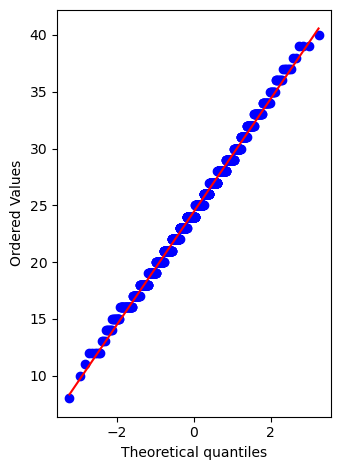

Shapiro-Wilk Test Statistic: 0.9952669882722133, p-value: 0.0010002023319366509
The data is not normally distributed (reject H0).


In [67]:
#Q-Q plot looks like a normal distribution, could it be the outlier to make the Shapiro-Wilk reject H0?
df_length_2_no_outlier=df_length_2[df_length_2['Count'] <= 40]

#Are the numbers normally distributed?
data = df_length_2_no_outlier['Count']

# Step 1: Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(data, dist="norm", plot=plt)
plt.title('')

plt.tight_layout()
plt.show()

# Step 2: Shapiro-Wilk Test
shapiro_stat, shapiro_p = stats.shapiro(data)
print(f'Shapiro-Wilk Test Statistic: {shapiro_stat}, p-value: {shapiro_p}')

# Interpretation of the p-value
alpha = 0.01
if shapiro_p > alpha:
    print("The data is normally distributed (fail to reject H0).")
else:
    print("The data is not normally distributed (reject H0).")

In [40]:
#while it is better if the data is normally distributed, we can still the z-score to see if there are any numbers have a significant difference
data = df_length_2.copy()
mean = np.mean(df_length_2['Count'])
std = np.std(df_length_2['Count'])

data['z-score']=data['Count'].apply(lambda x: ( x - mean)/std)
data['z-score alpha 0.05']=data['z-score'].apply(lambda x: 1 if abs(x) > 1.645 else 0)
sign_diff_num=data[data['z-score alpha 0.05']==1]
higher_chance = sign_diff_num[sign_diff_num['z-score'] > 1.645]
lower_chance = sign_diff_num[sign_diff_num['z-score'] < -1.645]

print(f"The max count for combinations of 2 numbers are {df_length_2['Count'].max()}, while the min count is {df_length_2['Count'].min()}.")
print(f"There are {len(df_length_2)} combinations of 2 numbers. Out of these, {len(higher_chance)} combinations have a significantly higher likelihood of being drawn, \
while {len(lower_chance)} combinations have a significantly lower likelihood.")

The max count for combinations of 2 numbers are 44, while the min count is 8.
There are 1176 combinations of 2 numbers. Out of these, 71 combinations have a significantly higher likelihood of being drawn, while 64 combinations have a significantly lower likelihood.


### Combinations with 3 numbers

In [69]:
len(df_length_3), df_length_3['Count'].max(), df_length_3['Count'].min()

(16078, 11, 1)

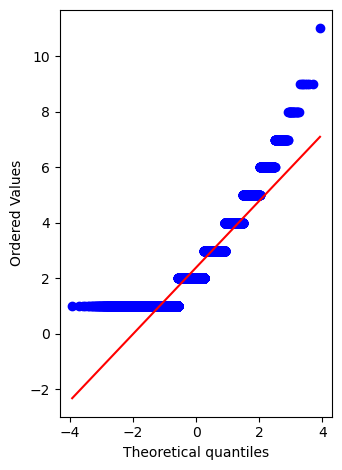

Anderson-Darling Test statistic: 686.2720168922788
Critical values: [0.576 0.656 0.787 0.918 1.092]
Significance levels: [15.  10.   5.   2.5  1. ]
Data is not normally distributed (reject H0)


In [70]:
#Are the numbers normally distributed?
data = df_length_3['Count']

# Step 1: Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(data, dist="norm", plot=plt)
plt.title('')

plt.tight_layout()
plt.show()

# Step 2: Anderson-Darling Test since n > 5000
result = stats.anderson(data, dist='norm')
print('Anderson-Darling Test statistic:', result.statistic)
print('Critical values:', result.critical_values)
print('Significance levels:', result.significance_level)

if result.statistic > result.critical_values[2]:
    print("Data is not normally distributed (reject H0)")
else:
    print("Data is normally distributed (failed to reject H0)")

In [267]:
#while it is better if the data is normally distributed, we can still the z-score to see if there are any numbers have a significant difference
#Since df_length_3['Count'] == 1 is a lot more than the rest, which cause a very uneven distribution, therefore, we will filter them out.
df_length_3_no_outlier=df_length_3[df_length_3['Count'] > 1]
data = df_length_3_no_outlier.copy()
mean = np.mean(df_length_3_no_outlier['Count'])
std = np.std(df_length_3_no_outlier['Count'])

data['z-score']=data['Count'].apply(lambda x: ( x - mean)/std)
data['z-score alpha 0.05']=data['z-score'].apply(lambda x: 1 if abs(x) > 1.645 else 0)
sign_diff_num=data[data['z-score alpha 0.05']==1]
higher_chance = sign_diff_num[sign_diff_num['z-score'] > 1.645]
lower_chance = sign_diff_num[sign_diff_num['z-score'] < -1.645]

print(f"The max count for combinations of 3 numbers are {data['Count'].max()}, while the min count is {data['Count'].min()}.")
print(f"There are {len(data)} combinations of 2 numbers. Out of these, {len(higher_chance)} combinations have a significantly higher likelihood of being drawn, \
while {len(lower_chance)} combinations have a significantly lower likelihood.")

The max count for combinations of 3 numbers are 11, while the min count is 2.
There are 11454 combinations of 2 numbers. Out of these, 1098 combinations have a significantly higher likelihood of being drawn, while 0 combinations have a significantly lower likelihood.


It seems we require significantly more data to include combinations of three as a feature. A dataset should contain values that are both higher and lower likelihood, instead, we just have values that have a significantly higher likelihood, which could be misleading, as it might suggest the whole dataset has not reached it's "true mean" yet.

### Combination with 4 numbers

In [71]:
len(df_length_4), df_length_4['Count'].max(), df_length_4['Count'].min()

(26945, 4, 1)

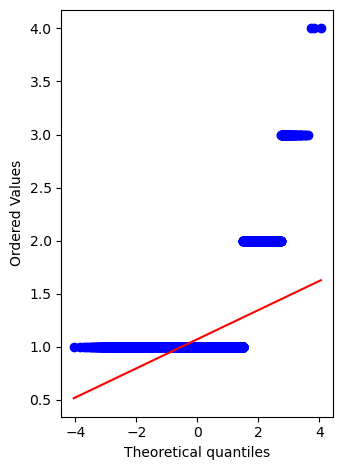

Anderson-Darling Test statistic: 9325.29996214866
Critical values: [0.576 0.656 0.787 0.918 1.092]
Significance levels: [15.  10.   5.   2.5  1. ]
Data is not normally distributed (reject H0)


In [72]:
#Are the numbers normally distributed?
data = df_length_4['Count']

# Step 1: Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(data, dist="norm", plot=plt)
plt.title('')

plt.tight_layout()
plt.show()

# Step 2: Anderson-Darling Test since n > 5000
result = stats.anderson(data, dist='norm')
print('Anderson-Darling Test statistic:', result.statistic)
print('Critical values:', result.critical_values)
print('Significance levels:', result.significance_level)

if result.statistic > result.critical_values[2]:
    print("Data is not normally distributed (reject H0)")
else:
    print("Data is normally distributed (failed to reject H0)")

### Combination with 5 and 6 numbers

In [73]:
len(df_length_5), df_length_5['Count'].max(), df_length_5['Count'].min()

(11487, 2, 1)

In [74]:
len(df_length_6), df_length_6['Count'].max(), df_length_6['Count'].min()

(1920, 1, 1)

It seems that only combinations of two numbers have sufficient data to establish a normal distribution. Combinations of three numbers are beginning to show a pattern, but there isn't enough data to form a normal distribution. Perhaps in another 50 years, they may develop a normal distribution suitable for analysis. The same applies to combinations of four, five, and six numbers.

## Consecutive numbers

*[Back To Table Content](#table-of-contents)*

In [44]:
df = df_1sthalf.iloc[:,2:8]

def check_consecutive_numbers_in_row(row):
    # Sort the numbers in the row
    sorted_numbers = sorted(row)
    consecutive_sequences = []
    current_sequence = [sorted_numbers[0]]

    for i in range(1, len(sorted_numbers)):
        if sorted_numbers[i] == sorted_numbers[i - 1] + 1:
            current_sequence.append(sorted_numbers[i])
        else:
            if len(current_sequence) > 1:
                consecutive_sequences.append(current_sequence)
            current_sequence = [sorted_numbers[i]]

    if len(current_sequence) > 1:
        consecutive_sequences.append(current_sequence)

    return consecutive_sequences

# Apply the function to each row in the DataFrame
df['consecutive_sequences'] = df.apply(check_consecutive_numbers_in_row, axis=1)

# Drop rows where consecutive_sequences is an empty list
df = df[df['consecutive_sequences'].str.len() > 0]

# Extract all sequences into a list of lists, preserving combinations
all_consecutive_sequences = []

for sequences in df['consecutive_sequences']:
    if sequences:  # Check if not empty
        all_consecutive_sequences.append(sequences)

# Flatten the list of lists to a 1D array, preserving existing combinations
flattened_sequences = [seq for sublist in all_consecutive_sequences for seq in sublist]

# Count occurrences of each sub-array (tuple)
counted = Counter(tuple(sublist) for sublist in flattened_sequences)
counted

Counter({(48, 49): 31,
         (34, 35): 31,
         (11, 12): 28,
         (1, 2): 28,
         (32, 33): 27,
         (7, 8): 27,
         (17, 18): 25,
         (38, 39): 24,
         (20, 21): 24,
         (33, 34): 23,
         (29, 30): 23,
         (3, 4): 22,
         (5, 6): 22,
         (19, 20): 22,
         (12, 13): 22,
         (24, 25): 21,
         (23, 24): 21,
         (46, 47): 21,
         (27, 28): 21,
         (30, 31): 21,
         (10, 11): 21,
         (26, 27): 20,
         (43, 44): 20,
         (45, 46): 20,
         (41, 42): 20,
         (2, 3): 19,
         (37, 38): 19,
         (47, 48): 19,
         (25, 26): 19,
         (4, 5): 19,
         (36, 37): 18,
         (28, 29): 18,
         (14, 15): 18,
         (44, 45): 18,
         (31, 32): 18,
         (15, 16): 18,
         (22, 23): 17,
         (8, 9): 17,
         (35, 36): 17,
         (21, 22): 17,
         (18, 19): 16,
         (42, 43): 16,
         (9, 10): 16,
         (16, 17): 16,
   

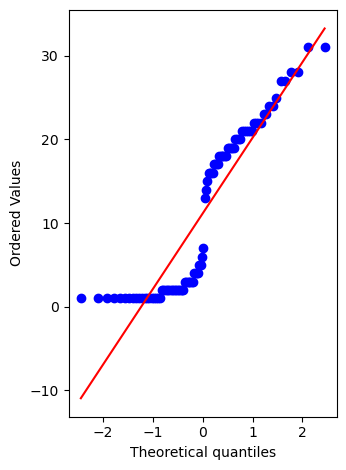

Shapiro-Wilk Test Statistic: 0.8361404629431242, p-value: 6.3428112950157326e-09
The data is not normally distributed (reject H0).


In [144]:
#Are the numbers normally distributed?
count = list(counted.values())
data = count.copy()

# Step 1: Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(data, dist="norm", plot=plt)
plt.title('')

plt.tight_layout()
plt.show()

# Step 2: Shapiro-Wilk Test
shapiro_stat, shapiro_p = stats.shapiro(data)
print(f'Shapiro-Wilk Test Statistic: {shapiro_stat}, p-value: {shapiro_p}')

# Interpretation of the p-value
alpha = 0.01
if shapiro_p > alpha:
    print("The data is normally distributed (fail to reject H0).")
else:
    print("The data is not normally distributed (reject H0).")

It seems the data is not normally distributed with values <= 15, let's try to drop them.

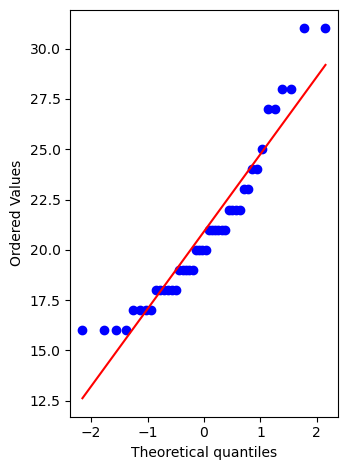

Shapiro-Wilk Test Statistic: 0.9065845050062264, p-value: 0.0017452129228232207
The data is not normally distributed (reject H0).


In [145]:
#Are the numbers normally distributed?
#drop values that are smaller than 15
count = [num for num in count if num > 15]
data = count.copy()

# Step 1: Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(data, dist="norm", plot=plt)
plt.title('')

plt.tight_layout()
plt.show()

# Step 2: Shapiro-Wilk Test
shapiro_stat, shapiro_p = stats.shapiro(data)
print(f'Shapiro-Wilk Test Statistic: {shapiro_stat}, p-value: {shapiro_p}')

# Interpretation of the p-value
alpha = 0.01
if shapiro_p > alpha:
    print("The data is normally distributed (fail to reject H0).")
else:
    print("The data is not normally distributed (reject H0).")

Data is still not a normal distribution, let's proceed anyway.

In [45]:
df_conse_num=pd.DataFrame()
df_conse_num['Consecutive_numbers']=list(counted)
df_conse_num['Count']=list(counted.values())
df_conse_num=df_conse_num.sort_values(by='Count', ascending=False)
df_conse_num

,Consecutive_numbers,Count
1,"(48, 49)",31
39,"(34, 35)",31
3,"(11, 12)",28
14,"(1, 2)",28
12,"(32, 33)",27
...,...,...
67,"(2, 3, 4, 5)",1
64,"(7, 8, 9)",1
30,"(28, 29, 30)",1
52,"(37, 38, 39)",1


In [179]:
#Still not normally distributed, perform z-score nevertheless to see if there are any numbers have a significant difference
data = df_conse_num.copy()
mean = np.mean(df_conse_num['Count'])
std = np.std(df_conse_num['Count'])

data['z-score']=data['Count'].apply(lambda x: ( x - mean)/std)
data['z-score alpha 0.05']=data['z-score'].apply(lambda x: 1 if abs(x) > 1.645 else 0)
sign_diff_num=data[data['z-score alpha 0.05']==1]
higher_chance = sign_diff_num[sign_diff_num['z-score'] > 0]
lower_chance = sign_diff_num[sign_diff_num['z-score'] < 0]

print(f"The max count for consecutive numbers is {data['Count'].max()}, while the min count is {data['Count'].min()}.")
print(f"There are {len(data)} consecutive numbers in total. Of these, {len(higher_chance)} consecutive numbers have a significantly higher likelihood of being drawn, \
while {len(lower_chance)} combinations have a significantly lower likelihood.")

The max count for consecutive numbers is 31, while the min count is 1.
There are 96 consecutive numbers in total. Of these, 6 consecutive numbers have a significantly higher likelihood of being drawn, while 0 combinations have a significantly lower likelihood.


In [180]:
sign_diff_num

,Consecutive_numbers,Count,z-score,z-score alpha 0.05
1,"(48, 49)",31,2.063643,1
39,"(34, 35)",31,2.063643,1
14,"(1, 2)",28,1.751660,1
3,"(11, 12)",28,1.751660,1
36,"(7, 8)",27,1.647665,1
12,"(32, 33)",27,1.647665,1


## The longest interval before a number reappears

*[Back To Table Content](#table-of-contents)*

In [86]:
df = df_cols.copy()
num=[]
max_gap_period=[]
for i in range(1,50):
    # Find the indices of the occurrences of 42
    indices = df[df.isin([i])].stack().index.tolist()
    
    # Calculate the maximum distance between the occurrences
    if len(indices) > 1:
        max_distance = max(indices[j][0] - indices[j-1][0] for j in range(1, len(indices)))-1
        num.append(i)
        max_gap_period.append(max_distance)
    else:
        max_distance = 0  # If there's only one occurrence, distance is 0
        num.append(i)
        max_gap_period.append(max_distance)

df_gap_period = pd.DataFrame({'num':num, 'longest interval':max_gap_period})
df_gap_period.sort_values(by='longest interval', ascending=False)

,num,longest interval
1,2,71
2,3,70
9,10,63
18,19,63
33,34,61
20,21,59
12,13,58
4,5,56
27,28,55
45,46,55


The longest interval for each number range from 30 - 71 lottery draw.

## Range of winning numbers

*[Back To Table Content](#table-of-contents)*

In [87]:
df_max_min = df_cols.copy()
df_max_min['max'] = df_max_min.max(axis=1)
df_max_min['min'] = df_max_min.min(axis=1)
df_max_min['range'] = df_max_min['max'] - df_max_min['min']
df_max_min['range'].max(), df_max_min['range'].min()

(48, 9)

There is not much insight from the range of winning number

# Machine Learning

### Import

In [77]:
from sklearn.datasets import make_classification, make_multilabel_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    accuracy_score,
    hamming_loss,
    precision_score,
    recall_score,
    f1_score,
    jaccard_score,
    coverage_error
)
from sklearn.preprocessing import OneHotEncoder, MultiLabelBinarizer, Binarizer

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression, SGDClassifier

from sklearn.multioutput import MultiOutputClassifier
from sklearn.multiclass import OneVsRestClassifier



### One hot encoding

Flatten the winning numbers, and have the ML model to guess one number at a time.

*[Back To Table Content](#table-of-contents)*

#### Data Transformation

In [ ]:
# Flatten the winning numbers, and have the ML model to guess one number at a time.

# Create a DataFrame with the winning numbers
df = df_1sthalf.iloc[:, 2:8].copy()

# Flatten the DataFrame into a single column
flattened = df.melt(value_name='winning_num')['winning_num']

# Reset the index to have a clean DataFrame
flattened_df = flattened.reset_index()

# Display the flattened DataFrame
flattened_df

,index,winning_num
0,0,14
1,1,7
2,2,3
3,3,16
4,4,3
...,...,...
11515,11515,48
11516,11516,33
11517,11517,26
11518,11518,39


In [134]:
# Add back low, high, odd, even, 1-7, 8-14, 15-21, 22-28, 29-35, 36-42, 43-49
flattened_df['Low'] = flattened_df['winning_num'].apply(lambda x: 1 if x < 25 else 0)
flattened_df['High'] = flattened_df['winning_num'].apply(lambda x: 1 if x >= 25 else 0)
flattened_df['Odd'] = flattened_df['winning_num'].apply(lambda x: 1 if x % 2 > 0 else 0)
flattened_df['Even'] = flattened_df['winning_num'].apply(lambda x: 1 if x % 2 == 0 else 0)
#1-10, 11-20, 21-30, 31-40, 41-49
flattened_df['1-10'] = flattened_df['winning_num'].apply(lambda x: 1 if x <= 10 else 0)
flattened_df['11-20'] = flattened_df['winning_num'].apply(lambda x: 1 if (x > 10) & (x <= 20) else 0)
flattened_df['21-30'] = flattened_df['winning_num'].apply(lambda x: 1 if (x > 20) & (x <= 30) else 0)
flattened_df['31-40'] = flattened_df['winning_num'].apply(lambda x: 1 if (x > 30) & (x <= 40) else 0)
flattened_df['41-49'] = flattened_df['winning_num'].apply(lambda x: 1 if (x > 40) & (x <= 49) else 0)
#1-7, 8-14, 15-21, 22-28, 29-35, 36-42, 43-49
flattened_df['1-7'] = flattened_df['winning_num'].apply(lambda x: 1 if x <= 7 else 0)
flattened_df['8-14'] = flattened_df['winning_num'].apply(lambda x: 1 if (x > 7) & (x <= 14) else 0)
flattened_df['15-21'] = flattened_df['winning_num'].apply(lambda x: 1 if (x > 14) & (x <= 21) else 0)
flattened_df['22-28'] = flattened_df['winning_num'].apply(lambda x: 1 if (x > 21) & (x <= 28) else 0)
flattened_df['29-35'] = flattened_df['winning_num'].apply(lambda x: 1 if (x > 28) & (x <= 35) else 0)
flattened_df['36-42'] = flattened_df['winning_num'].apply(lambda x: 1 if (x > 35) & (x <= 42) else 0)
flattened_df['43-49'] = flattened_df['winning_num'].apply(lambda x: 1 if (x > 42) & (x <= 49) else 0)
# add R,G,B
# Define RGB sets
R = {1, 2, 12, 13, 23, 24, 34, 35, 45, 46, 7, 8, 18, 19, 29, 30, 40}
G = {11, 21, 22, 32, 33, 43, 44, 5, 6, 16, 17, 27, 28, 38, 39, 49}
B = {41, 31, 42, 3, 4, 14, 15, 25, 26, 36, 37, 47, 48, 9, 10, 20}

flattened_df['R'] = flattened_df['winning_num'].apply(lambda x: 1 if x in R else 0)
flattened_df['G'] = flattened_df['winning_num'].apply(lambda x: 1 if x in G else 0)
flattened_df['B'] = flattened_df['winning_num'].apply(lambda x: 1 if x in B else 0)

encoded_df=flattened_df.drop('index',axis=1).copy()
train=encoded_df.values

In [137]:
encoded_df

,winning_num,Low,High,Odd,Even,1-10,11-20,21-30,31-40,41-49,1-7,8-14,15-21,22-28,29-35,36-42,43-49,R,G,B
0,14,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1
1,7,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0
2,3,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
3,16,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0
4,3,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11515,48,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
11516,33,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0
11517,26,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1
11518,39,0,1,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0


#### ML model

traing KNeighborsClassifier
traing SVC
traing DecisionTreeClassifier
traing RandomForestClassifier
traing AdaBoostClassifier
traing GradientBoostingClassifier
traing GaussianNB
traing LogisticRegression
traing KNeighborsClassifier
traing SVC
traing DecisionTreeClassifier
traing RandomForestClassifier
traing AdaBoostClassifier
traing GradientBoostingClassifier
traing GaussianNB
traing LogisticRegression
traing KNeighborsClassifier
traing SVC
traing DecisionTreeClassifier
traing RandomForestClassifier
traing AdaBoostClassifier
traing GradientBoostingClassifier
traing GaussianNB
traing LogisticRegression
traing KNeighborsClassifier
traing SVC
traing DecisionTreeClassifier
traing RandomForestClassifier
traing AdaBoostClassifier
traing GradientBoostingClassifier
traing GaussianNB
traing LogisticRegression
traing KNeighborsClassifier
traing SVC
traing DecisionTreeClassifier
traing RandomForestClassifier
traing AdaBoostClassifier
traing GradientBoostingClassifier
traing GaussianNB
traing Logi

C:\Users\user\AppData\Local\Temp\ipykernel_14404\4022039999.py:67: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  log = pd.concat([log, log_entry], ignore_index=True)


<Axes: title={'center': 'Classifier Accuracy'}, xlabel='Accuracy', ylabel='Classifier'>

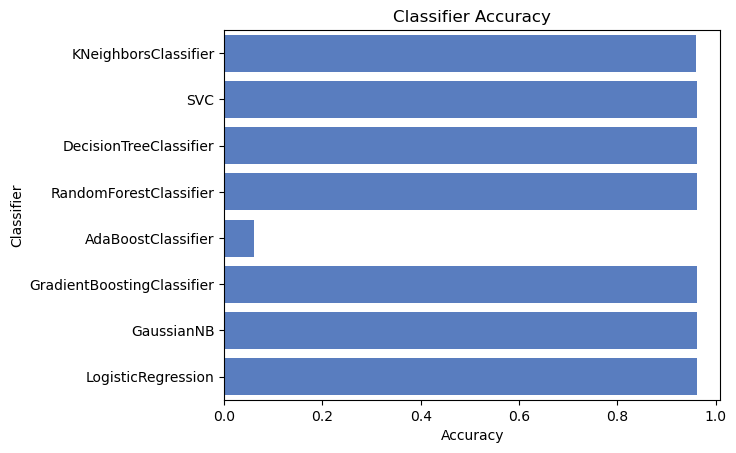

In [149]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
	AdaBoostClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(),
    #LinearDiscriminantAnalysis(), for some reaons, this classifier is not working
    #QuadraticDiscriminantAnalysis(), for some reaons, this classifier is not working
    LogisticRegression()]

log_cols = ["Classifier", "Accuracy"]
log 	 = pd.DataFrame(columns=log_cols)

sss = StratifiedShuffleSplit(n_splits=10, test_size=0.1, random_state=0)

X = train[0::, 1::]
y = train[0::, 0]

################################## let's try with one classifier first ##################################
"""

clf = LinearDiscriminantAnalysis()

acc_dict = {}

for train_index, test_index in sss.split(X, y):
	X_train, X_test = X[train_index], X[test_index]
	y_train, y_test = y[train_index], y[test_index]
	print(len(X_train), len(y_train))
	
	clf.fit(X_train, y_train)
	train_predictions = clf.predict(X_test)
	acc = accuracy_score(y_test, train_predictions)
	acc_dict[clf.__class__.__name__] = acc

for clf in acc_dict:
	acc_dict[clf] = acc_dict[clf] / 10.0
	log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
	log = pd.concat([log, log_entry], ignore_index=True) 

"""

#########################################################################################################

acc_dict = {}

for train_index, test_index in sss.split(X, y):
	X_train, X_test = X[train_index], X[test_index]
	y_train, y_test = y[train_index], y[test_index]
	
	for clf in classifiers:
		name = clf.__class__.__name__
		print(f"traing {name}")
		clf.fit(X_train, y_train)
		train_predictions = clf.predict(X_test)
		acc = accuracy_score(y_test, train_predictions)
		if name in acc_dict:
			acc_dict[name] += acc
		else:
			acc_dict[name] = acc

for clf in acc_dict:
	acc_dict[clf] = acc_dict[clf] / 10.0
	log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
	log = pd.concat([log, log_entry], ignore_index=True)


plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

Turn out the model has a laughable less than 1% accuracy

### Binarizer

MarkSix rules: guess 6 numbers simutaneously

*[Back To Table Content](#table-of-contents)*

#### Data Transformation

In [78]:
df = df_cols

# Create a binary DataFrame with 49 columns (0 to 48)
binary_df = pd.DataFrame(0, index=df.index, columns=range(1,50))

# Fill the binary DataFrame based on the values in df
for index, row in df.iterrows():
    for value in row:
        if value <= 49:  # Ensure the value is within the column range
            binary_df.at[index, value] = 1

# Use Binarizer to achieve the same result
binarizer = Binarizer()
binary_array = binarizer.fit_transform(binary_df)

# Convert back to DataFrame for better readability
binary_df_binarizer = pd.DataFrame(binary_array, columns=binary_df.columns)

binary_df_binarizer

,1,2,3,4,5,6,7,8,9,10,...,40,41,42,43,44,45,46,47,48,49
0,0,0,0,0,0,0,0,0,0,0,...,1,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,1
4,0,0,1,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,1,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1916,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1917,0,0,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1918,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


#### Merge all ML features

In [79]:
# Concatenate all feature DataFrames horizontally
all_features_df = pd.concat([
    binary_df_binarizer,
    df_feature_low_high_odd_even, 
    df_horizon_features,
    df_vertical_all_features,
    df_feature_RGB,
    df_feature_group_7,
    all_49_feature
], axis=1)

# Optional: Check for any duplicate column names
duplicate_columns = all_features_df.columns[all_features_df.columns.duplicated()].tolist()
if duplicate_columns:
    print(f"Warning: Found duplicate columns: {duplicate_columns}")

all_features_df

,1,2,3,4,5,6,7,8,9,10,...,cumsum_total_40,cumsum_total_41,cumsum_total_42,cumsum_total_43,cumsum_total_44,cumsum_total_45,cumsum_total_46,cumsum_total_47,cumsum_total_48,cumsum_total_49
0,0,0,0,0,0,0,0,0,0,0,...,0.166667,0.000000,0.166667,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0,0,0,0,0,0,1,0,0,0,...,0.083333,0.000000,0.083333,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000
2,0,0,1,0,0,1,0,0,0,0,...,0.055556,0.000000,0.055556,0.000000,0.000000,0.055556,0.000000,0.000000,0.000000,0.000000
3,0,0,0,0,0,0,0,0,0,0,...,0.041667,0.000000,0.041667,0.041667,0.000000,0.041667,0.000000,0.000000,0.041667,0.041667
4,0,0,1,1,0,1,0,0,0,0,...,0.033333,0.000000,0.033333,0.033333,0.000000,0.033333,0.000000,0.000000,0.033333,0.033333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1915,1,1,0,0,0,0,0,0,0,0,...,0.018354,0.018093,0.018963,0.019050,0.021312,0.019572,0.020703,0.020790,0.019224,0.023138
1916,0,0,0,0,0,0,0,0,0,1,...,0.018345,0.018084,0.018953,0.019040,0.021301,0.019562,0.020692,0.020779,0.019214,0.023126
1917,0,0,0,1,0,0,1,0,0,0,...,0.018335,0.018074,0.018943,0.019030,0.021290,0.019552,0.020681,0.020768,0.019204,0.023114
1918,0,0,0,1,0,0,0,0,1,0,...,0.018326,0.018065,0.018933,0.019020,0.021278,0.019541,0.020670,0.020757,0.019194,0.023102


#### ML model

In [80]:
train_x=all_features_df.iloc[:,50:].values
train_y=all_features_df.iloc[:,0:49].values

In [81]:
#we are going to use the train_test_split method because the sequence of the data is important (From Last Draw features)
# Use regular train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.1, random_state=0)

print("Training set shapes:")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print("\nTest set shapes:")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

Training set shapes:
X_train: (1728, 705)
y_train: (1728, 49)

Test set shapes:
X_test: (192, 705)
y_test: (192, 49)


/tmp/ipykernel_2046/3178882763.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  log = pd.concat([log, log_entry], ignore_index=True)


<Axes: title={'center': 'Classifier Accuracy'}, xlabel='Accuracy', ylabel='Classifier'>

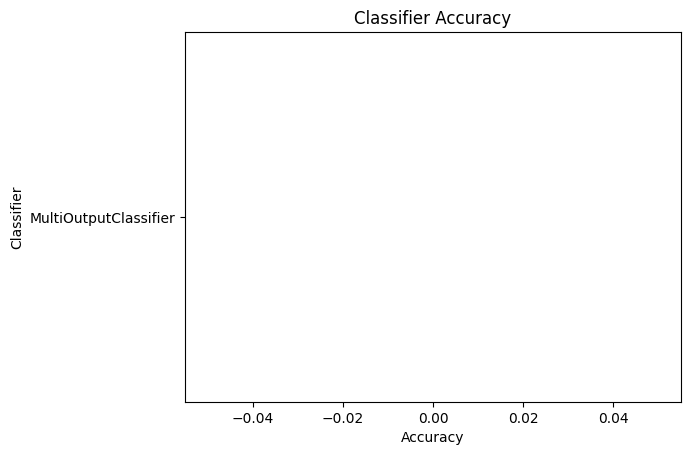

In [82]:
log_cols = ["Classifier", "Accuracy"]
log 	 = pd.DataFrame(columns=log_cols)

################################## let's try with one classifier first ##################################

# Multi-Output Classifier
clf = MultiOutputClassifier(RandomForestClassifier(random_state=42))

acc_dict = {}

clf.fit(X_train, y_train)
train_predictions = clf.predict(X_test)
acc = accuracy_score(y_test, train_predictions)
acc_dict[clf.__class__.__name__] = acc

for clf in acc_dict:
	acc_dict[clf] = acc_dict[clf] / 10.0
	log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
	log = pd.concat([log, log_entry], ignore_index=True) 

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

Laughable result...

## 1,000,000 MarkSix Simulations
Equivalent to 6,944 years, 83,333 months or 2,534,722 days of data.

We are going to test out different sample size and see if it would impact the accuracy of the ML models.

The different sample size would be 200,000 and 2,000,000

*[Back To Table Content](#table-of-contents)*

### Generate 200,000 synthetic MarkSix data with synthesizer

In [472]:
from sdv.metadata import Metadata

metadata = Metadata.detect_from_dataframe(
    data=df_cols,
    table_name='winning_nums')

metadata

{
    "tables": {
        "winning_nums": {
            "columns": {
                "1st": {
                    "sdtype": "numerical"
                },
                "2nd": {
                    "sdtype": "numerical"
                },
                "3rd": {
                    "sdtype": "numerical"
                },
                "4th": {
                    "sdtype": "numerical"
                },
                "5th": {
                    "sdtype": "numerical"
                },
                "6th": {
                    "sdtype": "numerical"
                }
            }
        }
    },
    "relationships": [],
    "METADATA_SPEC_VERSION": "V1"
}

In [473]:
from sdv.single_table import GaussianCopulaSynthesizer

synthesizer = GaussianCopulaSynthesizer(metadata)
synthesizer.fit(data=df_cols)

synthetic_data = synthesizer.sample(num_rows=200000)
synthetic_data

d:\anaconda3\envs\python3.11\Lib\site-packages\sdv\single_table\base.py:104: UserWarning: We strongly recommend saving the metadata using 'save_to_json' for replicability in future SDV versions.
  warnings.warn(


,1st,2nd,3rd,4th,5th,6th
0,11,25,31,34,43,45
1,9,14,24,19,37,47
2,9,21,24,34,42,49
3,8,8,27,32,38,49
4,19,32,35,42,45,49
...,...,...,...,...,...,...
199995,6,11,33,45,47,49
199996,9,28,25,25,33,43
199997,3,9,9,15,29,48
199998,2,5,16,29,39,49


In [ ]:
#there are some minor problems for the synthetic data, where number 1 and 2 disappear entirely from 2nd and 2nd column respectively, therefore, we will need to fix that
#for 2nd col df_cols and synthetic_data percentages distribution
df_cols_1st_percentage=(df_cols.iloc[:,0].value_counts()/1920).to_frame()
synthetic_data_1st_percentage=(synthetic_data.iloc[:,0].value_counts()/1920).to_frame()

#for 2nd col df_cols and synthetic_data percentages distribution
df_cols_2nd_percentage=(df_cols.iloc[:,1].value_counts()/1920).to_frame()
synthetic_data_2nd_percentage=(synthetic_data.iloc[:,1].value_counts()/1920).to_frame()

In [ ]:
#for 2nd col
# outer join both dfs
df_diff_1st=df_cols_1st_percentage.merge(synthetic_data_1st_percentage, how='outer', left_index=True, right_index=True, suffixes=('_real', '_synthetic'))
df_diff_1st['count_diff']=df_diff_1st['count_real']-df_diff_1st['count_synthetic']
df_diff_1st['numbers']=df_diff_1st['count_diff'] * 1920
#filter out the synthetic data that has a higher proportions compare to the real data (df_cols), we are going to remove some of these excess data and replace them with number 1
df_diff_1st_high=df_diff_1st[df_diff_1st['numbers'] < 0]
df_diff_1st_high['numbers']=df_diff_1st_high['numbers'] * -1
df_diff_1st_high=df_diff_1st_high.reset_index()
df_diff_1st_high

,1st,count_real,count_synthetic,count_diff,numbers
0,2,0.111458,13.219792,-13.108333,25168.0
1,3,0.096875,14.177083,-14.080208,27034.0
2,4,0.085938,10.400521,-10.314583,19804.0
3,5,0.060937,8.651563,-8.590625,16494.0
4,6,0.059896,7.391146,-7.331250,14076.0
5,7,0.063021,6.307812,-6.244792,11990.0
6,8,0.054688,5.590625,-5.535938,10629.0
7,9,0.051042,4.947917,-4.896875,9402.0
8,10,0.045833,4.395313,-4.349479,8351.0
9,11,0.039062,3.905208,-3.866146,7423.0


In [476]:
#for 2nd col
# outer join both dfs
df_diff_2nd=df_cols_2nd_percentage.merge(synthetic_data_2nd_percentage, how='outer', left_index=True, right_index=True, suffixes=('_real', '_synthetic'))
df_diff_2nd['count_diff']=df_diff_2nd['count_real']-df_diff_2nd['count_synthetic']
df_diff_2nd['numbers']=df_diff_2nd['count_diff'] * 1920
#filter out the synthetic data that has a higher proportions compare to the real data (df_cols), we are going to remove some of these excess data and replace them with number 1
df_diff_2nd_high=df_diff_2nd[df_diff_2nd['numbers'] < 0]
df_diff_2nd_high['numbers']=df_diff_2nd_high['numbers'] * -1
df_diff_2nd_high=df_diff_2nd_high.reset_index()
df_diff_2nd_high

,2nd,count_real,count_synthetic,count_diff,numbers
0,3,0.025000,1.885417,-1.860417,3572.0
1,4,0.035417,3.935417,-3.900000,7488.0
2,5,0.038542,4.819271,-4.780729,9179.0
3,6,0.048958,5.267708,-5.218750,10020.0
4,7,0.036979,5.422917,-5.385937,10341.0
5,8,0.051042,5.653646,-5.602604,10757.0
6,9,0.048438,5.611458,-5.563021,10681.0
7,10,0.052083,5.650000,-5.597917,10748.0
8,11,0.050521,5.546354,-5.495833,10552.0
9,12,0.053125,5.387500,-5.334375,10242.0


In [ ]:
#Objectives:
#we need 251 of number 1 in '2nd'
#we need 31 of number 2 in '2nd'

def replace_num(df_diff, syn_df, syn_df_col, replace_num, total_num_to_replace):
    result_df = syn_df.copy()
    freq_left = total_num_to_replace
    
    for i in range(0, len(df_diff)):
        if freq_left <= 0:  # if there are no more numbers to be replaced, break the loop
            break
            
        freq = int(df_diff['numbers'].iloc[i])   # extract the amount of numbers that need to be replaced
        to_be_replaced_num = df_diff[syn_df_col][i]    # extract the number that needs to be replaced
        
        # Find rows to replace
        to_be_replaced_mask = result_df[syn_df_col] == to_be_replaced_num
        replaceable_rows = result_df[to_be_replaced_mask]
        
        # If we have enough rows to replace
        if len(replaceable_rows) >= freq:
            # Randomly select rows to replace
            replace_indices = replaceable_rows.sample(n=min(freq, freq_left)).index
            # Replace values
            result_df.loc[replace_indices, syn_df_col] = replace_num
            freq_left -= len(replace_indices)
    
    return result_df

df_1st_diffhigh=df_diff_1st_high.copy()
df_2nd_diffhigh=df_diff_2nd_high.copy()
df_syn=synthetic_data.copy()

result_syn_df = replace_num(df_1st_diffhigh, df_syn, '2nd', 1, 251)
result_syn_df = replace_num(df_2nd_diffhigh, result_syn_df, '2nd', 2, 31)

In [488]:
result_syn_df

,1st,2nd,3rd,4th,5th,6th
0,11,25,31,34,43,45
1,9,14,24,19,37,47
2,9,21,24,34,42,49
3,8,8,27,32,38,49
4,19,32,35,42,45,49
...,...,...,...,...,...,...
199995,6,11,33,45,47,49
199996,9,28,25,25,33,43
199997,3,9,9,15,29,48
199998,2,5,16,29,39,49


In [489]:
from sdv.evaluation.single_table import evaluate_quality
from sdv.evaluation.single_table import run_diagnostic
from sdv.evaluation.single_table import get_column_plot

diagnostic_report = run_diagnostic(
    real_data=df_cols,
    synthetic_data=result_syn_df,
    metadata=metadata)

quality_report = evaluate_quality(
    df_cols,
    result_syn_df,
    metadata)


Generating report ...

(1/2) Evaluating Data Validity: |██████████| 6/6 [00:00<00:00, 130.43it/s]|
Data Validity Score: 100.0%

(2/2) Evaluating Data Structure: |██████████| 1/1 [00:00<00:00, 66.67it/s]|
Data Structure Score: 100.0%

Overall Score (Average): 100.0%

Generating report ...

(1/2) Evaluating Column Shapes: |██████████| 6/6 [00:00<00:00, 11.63it/s]|
Column Shapes Score: 93.34%

(2/2) Evaluating Column Pair Trends: |██████████| 15/15 [00:01<00:00, 14.88it/s]|
Column Pair Trends Score: 95.11%

Overall Score (Average): 94.22%



### Data Transformation

#### Feature Engineering

##### 7 numbers in a group

In [490]:
# 7 numbers in a group
df = result_syn_df.copy()

df['1-7'] = (df.iloc[:,0:6] <= 7).sum(axis=1)
df['8-14'] = ((df.iloc[:,0:6] > 7) & (df.iloc[:,0:6] <= 14)).sum(axis=1)
df['15-21'] = ((df.iloc[:,0:6] > 14) & (df.iloc[:,0:6] <= 21)).sum(axis=1)
df['22-28'] = ((df.iloc[:,0:6] > 21) & (df.iloc[:,0:6] <= 28)).sum(axis=1)
df['29-35'] = ((df.iloc[:,0:6] > 28) & (df.iloc[:,0:6] <= 35)).sum(axis=1)
df['36-42'] = ((df.iloc[:,0:6] > 35) & (df.iloc[:,0:6] <= 42)).sum(axis=1)
df['43-49'] = ((df.iloc[:,0:6] > 42) & (df.iloc[:,0:6] <= 49)).sum(axis=1)

result_syn_df = df
result_syn_df

,1st,2nd,3rd,4th,5th,6th,1-7,8-14,15-21,22-28,29-35,36-42,43-49
0,11,25,31,34,43,45,0,1,0,1,2,0,2
1,9,14,24,19,37,47,0,2,1,1,0,1,1
2,9,21,24,34,42,49,0,1,1,1,1,1,1
3,8,8,27,32,38,49,0,2,0,1,1,1,1
4,19,32,35,42,45,49,0,0,1,0,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,6,11,33,45,47,49,1,1,0,0,1,0,3
199996,9,28,25,25,33,43,0,1,0,3,1,0,1
199997,3,9,9,15,29,48,1,2,1,0,1,0,1
199998,2,5,16,29,39,49,2,0,1,0,1,1,1


##### Group by columns

In [491]:
#10 numbers in a group except for group 41-49
df = result_syn_df.copy()

df['1-10'] = (df.iloc[:,0:6] <= 10).sum(axis=1)
df['11-20'] = ((df.iloc[:,0:6] > 10) & (df.iloc[:,0:6] <= 20)).sum(axis=1)
df['21-30'] = ((df.iloc[:,0:6] > 20) & (df.iloc[:,0:6] <= 30)).sum(axis=1)
df['31-40'] = ((df.iloc[:,0:6] > 30) & (df.iloc[:,0:6] <= 40)).sum(axis=1)
df['41-49'] = ((df.iloc[:,0:6] > 40) & (df.iloc[:,0:6] <= 49)).sum(axis=1)

result_syn_df = df
result_syn_df

,1st,2nd,3rd,4th,5th,6th,1-7,8-14,15-21,22-28,29-35,36-42,43-49,1-10,11-20,21-30,31-40,41-49
0,11,25,31,34,43,45,0,1,0,1,2,0,2,0,1,1,2,2
1,9,14,24,19,37,47,0,2,1,1,0,1,1,1,2,1,1,1
2,9,21,24,34,42,49,0,1,1,1,1,1,1,1,0,2,1,2
3,8,8,27,32,38,49,0,2,0,1,1,1,1,2,0,1,2,1
4,19,32,35,42,45,49,0,0,1,0,2,1,2,0,1,0,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,6,11,33,45,47,49,1,1,0,0,1,0,3,1,1,0,1,3
199996,9,28,25,25,33,43,0,1,0,3,1,0,1,1,0,3,1,1
199997,3,9,9,15,29,48,1,2,1,0,1,0,1,3,1,1,0,1
199998,2,5,16,29,39,49,2,0,1,0,1,1,1,2,1,1,1,1


##### Group by colors

In [ ]:
# group by colours
# Define RGB sets
R = {1, 2, 12, 13, 23, 24, 34, 35, 45, 46, 7, 8, 18, 19, 29, 30, 40}
G = {11, 21, 22, 32, 33, 43, 44, 5, 6, 16, 17, 27, 28, 38, 39, 49}
B = {41, 31, 42, 3, 4, 14, 15, 25, 26, 36, 37, 47, 48, 9, 10, 20}

df = result_syn_df.copy()

# Initialize new columns
df['R'] = 0
df['G'] = 0
df['B'] = 0

# Count frequency of RGB values for the first 6 columns only
for index, row in df.iterrows():
    winning_numbers = row[['2nd', '2nd', '3rd', '4th', '5th', '6th']]
    for value in winning_numbers:
        if value in R:
            df.at[index, 'R'] += 1
        elif value in G:
            df.at[index, 'G'] += 1
        elif value in B:
            df.at[index, 'B'] += 1

result_syn_df = df
result_syn_df

,1st,2nd,3rd,4th,5th,6th,1-7,8-14,15-21,22-28,...,36-42,43-49,1-10,11-20,21-30,31-40,41-49,R,G,B
0,11,25,31,34,43,45,0,1,0,1,...,0,2,0,1,1,2,2,2,2,2
1,9,14,24,19,37,47,0,2,1,1,...,1,1,1,2,1,1,1,2,0,4
2,9,21,24,34,42,49,0,1,1,1,...,1,1,1,0,2,1,2,2,2,2
3,8,8,27,32,38,49,0,2,0,1,...,1,1,2,0,1,2,1,2,4,0
4,19,32,35,42,45,49,0,0,1,0,...,1,2,0,1,0,2,3,3,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,6,11,33,45,47,49,1,1,0,0,...,0,3,1,1,0,1,3,1,4,1
199996,9,28,25,25,33,43,0,1,0,3,...,0,1,1,0,3,1,1,0,3,3
199997,3,9,9,15,29,48,1,2,1,0,...,0,1,3,1,1,0,1,1,0,5
199998,2,5,16,29,39,49,2,0,1,0,...,1,1,2,1,1,1,1,2,4,0


##### Group by rows

In [493]:
df=result_syn_df.copy()
df['1_row'] = (df.iloc[:, 2:8] % 10 == 0).sum(axis=1)

# Create a list of row suffixes and a corresponding list of target values
suffixes = range(2, 11)  # for 2_row to 10_row
targets = [9, 8, 7, 6, 5, 4, 3, 2, 1]  # corresponding values for each row

for suffix, target in zip(suffixes, targets):
    condition = df.iloc[:, 2:8].isin([target + 10*i for i in range(0, 5)])
    df[f'{suffix}_row'] = condition.sum(axis=1)

result_syn_df = df
result_syn_df

,1st,2nd,3rd,4th,5th,6th,1-7,8-14,15-21,22-28,...,1_row,2_row,3_row,4_row,5_row,6_row,7_row,8_row,9_row,10_row
0,11,25,31,34,43,45,0,1,0,1,...,1,0,0,0,0,1,1,1,0,2
1,9,14,24,19,37,47,0,2,1,1,...,1,1,0,2,0,0,1,0,1,0
2,9,21,24,34,42,49,0,1,1,1,...,1,1,0,0,0,0,2,0,1,1
3,8,8,27,32,38,49,0,2,0,1,...,1,1,1,1,0,0,0,0,2,0
4,19,32,35,42,45,49,0,0,1,0,...,2,1,0,0,0,2,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,6,11,33,45,47,49,1,1,0,0,...,0,1,0,1,0,1,0,1,0,2
199996,9,28,25,25,33,43,0,1,0,3,...,1,0,0,0,0,2,0,2,0,1
199997,3,9,9,15,29,48,1,2,1,0,...,0,2,1,0,0,1,0,0,1,1
199998,2,5,16,29,39,49,2,0,1,0,...,1,3,0,0,1,0,0,0,1,0


##### Low, high, odd, even

In [494]:
df=result_syn_df.copy()

#Low
df['Low'] = (df.iloc[:,0:6] <= 24).sum(axis=1)
#high
df['High'] = (df.iloc[:,0:6] > 24).sum(axis=1)
#odd
df['odd'] = (df.iloc[:,0:6] % 2 > 0).sum(axis=1)
#even
df['even'] = (df.iloc[:,0:6] % 2 == 0).sum(axis=1)

result_syn_df = df
result_syn_df

,1st,2nd,3rd,4th,5th,6th,1-7,8-14,15-21,22-28,...,5_row,6_row,7_row,8_row,9_row,10_row,Low,High,odd,even
0,11,25,31,34,43,45,0,1,0,1,...,0,1,1,1,0,2,1,5,5,1
1,9,14,24,19,37,47,0,2,1,1,...,0,0,1,0,1,0,4,2,4,2
2,9,21,24,34,42,49,0,1,1,1,...,0,0,2,0,1,1,3,3,3,3
3,8,8,27,32,38,49,0,2,0,1,...,0,0,0,0,2,0,2,4,2,4
4,19,32,35,42,45,49,0,0,1,0,...,0,2,0,0,1,0,1,5,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,6,11,33,45,47,49,1,1,0,0,...,0,1,0,1,0,2,2,4,5,1
199996,9,28,25,25,33,43,0,1,0,3,...,0,2,0,2,0,1,1,5,5,1
199997,3,9,9,15,29,48,1,2,1,0,...,0,1,0,0,1,1,4,2,5,1
199998,2,5,16,29,39,49,2,0,1,0,...,1,0,0,0,1,0,3,3,4,2


#### Binarizer

In [498]:
df = result_syn_df.iloc[:,0:6]

# Create a binary DataFrame with 49 columns (0 to 48)
binary_df = pd.DataFrame(0, index=df.index, columns=range(1,50))

# Fill the binary DataFrame based on the values in df
for index, row in df.iterrows():
    for value in row:
        if value <= 49:  # Ensure the value is within the column range
            binary_df.at[index, value] = 1

# Use Binarizer to achieve the same result
binarizer = Binarizer()
binary_array = binarizer.fit_transform(binary_df)

# Convert back to DataFrame for better readability
binary_df_binarizer = pd.DataFrame(binary_array, columns=binary_df.columns)

binary_df_binarizer

,1,2,3,4,5,6,7,8,9,10,...,40,41,42,43,44,45,46,47,48,49
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,1,0,0,0,0,0,0,1
3,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,1,0,1
199996,0,0,0,0,0,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
199997,0,0,1,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
199998,0,1,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [505]:
result_syn_df

,1st,2nd,3rd,4th,5th,6th,1-7,8-14,15-21,22-28,...,5_row,6_row,7_row,8_row,9_row,10_row,Low,High,odd,even
0,11,25,31,34,43,45,0,1,0,1,...,0,1,1,1,0,2,1,5,5,1
1,9,14,24,19,37,47,0,2,1,1,...,0,0,1,0,1,0,4,2,4,2
2,9,21,24,34,42,49,0,1,1,1,...,0,0,2,0,1,1,3,3,3,3
3,8,8,27,32,38,49,0,2,0,1,...,0,0,0,0,2,0,2,4,2,4
4,19,32,35,42,45,49,0,0,1,0,...,0,2,0,0,1,0,1,5,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,6,11,33,45,47,49,1,1,0,0,...,0,1,0,1,0,2,2,4,5,1
199996,9,28,25,25,33,43,0,1,0,3,...,0,2,0,2,0,1,1,5,5,1
199997,3,9,9,15,29,48,1,2,1,0,...,0,1,0,0,1,1,4,2,5,1
199998,2,5,16,29,39,49,2,0,1,0,...,1,0,0,0,1,0,3,3,4,2


In [501]:
df=binary_df_binarizer.copy()
df_ = result_syn_df.iloc[:,6:]

train=pd.concat([df,df_], axis=1)

In [510]:
train.to_csv('MarkSix_SyntheticData_200k_withFeatures.csv', header=True, index=False)

### ML Model

In [3]:
MarkSix_df=pd.read_csv('MarkSix_SyntheticData_200k_withFeatures.csv')

In [4]:
train_x=MarkSix_df.iloc[:,50:].values
train_y=MarkSix_df.iloc[:,0:49].values

In [5]:
#we are going to use the train_test_split method because the sequence of the data is important
# Use regular train_test_split
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.1, random_state=0)

print("Training set shapes:")
print(f"X_train: {X_train.shape}")
print(f"y_train: {y_train.shape}")
print("\nTest set shapes:")
print(f"X_test: {X_test.shape}")
print(f"y_test: {y_test.shape}")

Training set shapes:
X_train: (180000, 28)
y_train: (180000, 49)

Test set shapes:
X_test: (20000, 28)
y_test: (20000, 49)


#### Train once with MultiOutputRandomForestClassifier

In [10]:
log

,Classifier,Accuracy
0,MultiOutputClassifier,0.008905


/tmp/ipykernel_1952/3178882763.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  log = pd.concat([log, log_entry], ignore_index=True)


<Axes: title={'center': 'Classifier Accuracy'}, xlabel='Accuracy', ylabel='Classifier'>

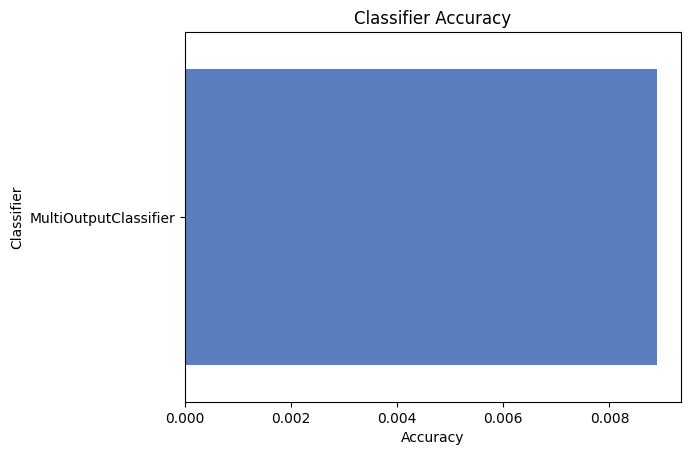

In [8]:
log_cols = ["Classifier", "Accuracy"]
log 	 = pd.DataFrame(columns=log_cols)

################################## let's try with one classifier first ##################################

# Multi-Output Classifier
clf = MultiOutputClassifier(RandomForestClassifier(random_state=42))

acc_dict = {}

clf.fit(X_train, y_train)
train_predictions = clf.predict(X_test)
acc = accuracy_score(y_test, train_predictions)
acc_dict[clf.__class__.__name__] = acc

for clf in acc_dict:
	acc_dict[clf] = acc_dict[clf] / 10.0
	log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
	log = pd.concat([log, log_entry], ignore_index=True) 

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

#### Train 200 epochs with SGDClassifier

In [ ]:
train_x=MarkSix_df.values
train_y=MarkSix_df.values
X_train, X_test, y_train, y_test = train_test_split(train_x, train_y, test_size=0.1, random_state=0)

# Initialize the SGDClassifier with modified_huber loss for probability estimates
sgd_classifier = SGDClassifier(loss='modified_huber', max_iter=1000, tol=1e-3)
multi_label_classifier = OneVsRestClassifier(sgd_classifier)

# Train the classifier
n_epochs = 200
for epoch in range(n_epochs):
    multi_label_classifier.fit(X_train, y_train)
    print(f"Epoch {epoch + 1}/{n_epochs} completed.")
    
# Make predictions and get probabilities
y_prob = multi_label_classifier.predict_proba(X_test)

# Function to select exactly 6 labels based on highest probabilities
def select_top_k_labels(y_prob, k=6):
    n_samples = y_prob.shape[0]
    y_pred = np.zeros_like(y_prob)
    
    # For each sample, get the indices of top k probabilities
    for i in range(n_samples):
        top_k_indices = np.argsort(y_prob[i])[-k:]  # Get indices of k highest probabilities
        y_pred[i, top_k_indices] = 1  # Set those indices to 1
    
    return y_pred

# Get exactly 6 predictions for each sample
y_pred = select_top_k_labels(y_prob, k=6)

def convert_predictions_to_numbers(pred_array):
    return [np.where(row == 1)[0] for row in pred_array]

y_pred = convert_predictions_to_numbers(y_pred)
y_test = convert_predictions_to_numbers(y_test)

# Convert to binary format for multi-label evaluation
mlb = MultiLabelBinarizer()
y_test_bin = mlb.fit_transform(y_test)
y_pred_bin = mlb.transform(y_pred)

# Calculate overall metrics
h_loss = hamming_loss(y_test_bin, y_pred_bin)
accuracy = accuracy_score(y_test_bin, y_pred_bin)
subset_accuracy = accuracy  # Matches the definition here

# Calculate precision, recall, and F1 Score using sklearn metrics
precision = precision_score(y_test_bin, y_pred_bin, average='samples')
recall = recall_score(y_test_bin, y_pred_bin, average='samples')
f1_score_value = f1_score(y_test_bin, y_pred_bin, average='samples')

jaccard = jaccard_score(y_test_bin, y_pred_bin, average='samples')
coverage = coverage_error(y_test_bin, y_pred_bin)

# Print overall metrics
print(f"Hamming Loss: {h_loss:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (Overall): {precision:.4f}")
print(f"Recall (Overall): {recall:.4f}")
print(f"F1 Score (Overall): {f1_score_value:.4f}")
print(f"Subset Accuracy: {subset_accuracy:.4f}")
print(f"Jaccard Index: {jaccard:.4f}")
print(f"Coverage Error: {coverage:.4f}")

# Calculate and print individual scores for each sample
print("\nIndividual Scores for Each Sample:")
for i in range(len(y_test)):
    sample_precision = precision_score(y_test_bin[i:i+1], y_pred_bin[i:i+1], average='micro')
    sample_recall = recall_score(y_test_bin[i:i+1], y_pred_bin[i:i+1], average='micro')
    sample_f1 = f1_score(y_test_bin[i:i+1], y_pred_bin[i:i+1], average='micro')
    
    print(f"Sample {i + 1}: Precision = {sample_precision:.4f}, Recall = {sample_recall:.4f}, F1 Score = {sample_f1:.4f}")

# Print predictions and actual values
print("\nSample-wise Predictions and Actual Values:")
for i in range(0:100):
    print(f"Sample {i + 1}:")
    print(f"  Predicted: {y_pred[i]}")
    print(f"  Actual: {y_test[i]}\n")

Epoch 1/10 completed.
Epoch 2/10 completed.
Epoch 3/10 completed.
Epoch 4/10 completed.
Epoch 5/10 completed.
Epoch 6/10 completed.
Epoch 7/10 completed.
Epoch 8/10 completed.
Epoch 9/10 completed.
Epoch 10/10 completed.
Hamming Loss: 0.1023
Accuracy: 0.0000
Precision (Overall): 0.5790
Recall (Overall): 0.5933
F1 Score (Overall): 0.5855
Subset Accuracy: 0.0000
Jaccard Index: 0.4356
Coverage Error: 47.5800

Individual Scores for Each Sample:
Sample 1: Precision = 0.5000, Recall = 0.5000, F1 Score = 0.5000
Sample 2: Precision = 0.5000, Recall = 0.5000, F1 Score = 0.5000
Sample 3: Precision = 0.8333, Recall = 0.8333, F1 Score = 0.8333


d:\anaconda3\envs\scikit-learn\Lib\site-packages\sklearn\preprocessing\_label.py:909: UserWarning: unknown class(es) [np.int64(0)] will be ignored
  warnings.warn(


Sample 4: Precision = 0.6667, Recall = 0.6667, F1 Score = 0.6667
Sample 5: Precision = 0.8333, Recall = 0.8333, F1 Score = 0.8333
Sample 6: Precision = 0.6667, Recall = 0.6667, F1 Score = 0.6667
Sample 7: Precision = 0.3333, Recall = 0.3333, F1 Score = 0.3333
Sample 8: Precision = 0.8333, Recall = 0.8333, F1 Score = 0.8333
Sample 9: Precision = 0.8333, Recall = 0.8333, F1 Score = 0.8333
Sample 10: Precision = 0.8333, Recall = 0.8333, F1 Score = 0.8333
Sample 11: Precision = 0.6667, Recall = 0.6667, F1 Score = 0.6667
Sample 12: Precision = 0.5000, Recall = 0.5000, F1 Score = 0.5000
Sample 13: Precision = 0.5000, Recall = 0.5000, F1 Score = 0.5000
Sample 14: Precision = 0.6667, Recall = 0.6667, F1 Score = 0.6667
Sample 15: Precision = 0.6667, Recall = 0.8000, F1 Score = 0.7273
Sample 16: Precision = 0.6667, Recall = 0.6667, F1 Score = 0.6667
Sample 17: Precision = 0.6667, Recall = 0.8000, F1 Score = 0.7273
Sample 18: Precision = 0.8333, Recall = 0.8333, F1 Score = 0.8333
Sample 19: Preci

'\n\n# Convert predictions to numbers for better visualization\ndef convert_predictions_to_numbers(pred_array):\n    return [np.where(row == 1)[0] + 1 for row in pred_array]  # Add 1 because indices start at 0\n\npredictions = convert_predictions_to_numbers(y_pred)\nactuals = convert_predictions_to_numbers(y_test)\n\n# Print some sample predictions\nprint("\nSample predictions (first 5):")\nfor i in range(5):\n    print(f"Predicted: {sorted(predictions[i])}")\n    print(f"Actual: {sorted(actuals[i])}")\n\n# Calculate accuracy and F1 score\naccuracy = accuracy_score(y_test, y_pred)\nf1 = f1_score(y_test, y_pred, average=\'micro\')\nprint(f"\nAccuracy: {accuracy:.4f}")\nprint(f"F1 Score: {f1:.4f}")\n\n'

### Deep Learning with Tensorflow

In [5]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

# Define the training data
train = np.array([[7, 10, 12, 18, 34, 48],
                   [7, 10, 15, 28, 42, 45],
                   [4, 10, 18, 31, 34, 48],
                   [2, 7, 11, 23, 28, 41],
                   [2, 16, 26, 33, 36, 41],
                   [8, 13, 18, 22, 34, 48],
                   [8, 16, 18, 25, 42, 45],
                   [8, 10, 18, 24, 31, 48],
                   [11, 13, 18, 24, 28, 41],
                   [16, 23, 26, 36, 41, 42]])

# Create labels for each sample (dummy example, adjust as needed)
mlb = MultiLabelBinarizer()
labels = mlb.fit_transform(train)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train, labels, test_size=0.2, random_state=42)

# Define the model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(train.shape[1],)),  # Input shape matches the number of features
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(len(mlb.classes_), activation='sigmoid')  # Output layer for multi-label
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Suitable for multi-label classification
              metrics=['accuracy'])

# Define a callback to log training progress
class CustomProgress(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        print(f"Epoch {epoch + 1}: Loss = {logs['loss']:.4f}, Accuracy = {logs['accuracy']:.4f}, Validation Loss = {logs['val_loss']:.4f}, Validation Accuracy = {logs['val_accuracy']:.4f}")

# Train the model with the custom callback
model.fit(X_train, y_train, epochs=50, batch_size=2, validation_data=(X_val, y_val), callbacks=[CustomProgress()])

# Evaluate the model
loss, accuracy = model.evaluate(X_val, y_val)
print(f'Validation Loss: {loss:.4f}, Validation Accuracy: {accuracy:.4f}')

Epoch 1/50
1/4 ━━━━━━━━━━━━━━━━━━━━ 1:14 25s/step - accuracy: 0.0000e+00 - loss: 3.8617Epoch 1: Loss = 2.9355, Accuracy = 0.0000, Validation Loss = 2.6774, Validation Accuracy = 0.0000
4/4 ━━━━━━━━━━━━━━━━━━━━ 26s 428ms/step - accuracy: 0.0000e+00 - loss: 3.2317 - val_accuracy: 0.0000e+00 - val_loss: 2.6774
Epoch 2/50
1/4 ━━━━━━━━━━━━━━━━━━━━ 3s 1s/step - accuracy: 0.0000e+00 - loss: 2.2995Epoch 2: Loss = 2.2776, Accuracy = 0.0000, Validation Loss = 2.1001, Validation Accuracy = 0.0000
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 45ms/step - accuracy: 0.0000e+00 - loss: 2.2839 - val_accuracy: 0.0000e+00 - val_loss: 2.1001
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.0000e+00 - loss: 1.9721 Epoch 3: Loss = 1.7980, Accuracy = 0.0000, Validation Loss = 1.6777, Validation Accuracy = 0.0000
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - accuracy: 0.0000e+00 - loss: 1.9373 - val_accuracy: 0.0000e+00 - val_loss: 1.6777
Epoch 4/50
1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 168ms/step - accuracy: 0.0000e+00 - loss:

# Define the output of the ML model
- predict all 7 numbers (most difficult)
- predict 7 numbers for the next 3,5,7,10 draws (more room for the prediction)
- select 1 number only for the next draw (1/47, ~2% chance to guess correctly?)
- guess only 3 numbers out of the 6 (7th price)
- guess only 4 numbers out of the 6 (5th price)

頭獎	選中6個「攪出號碼」	獎金會因應該期獲中頭獎注數而有所不同，每期頭獎基金訂為不少於港幣500萬元。

二獎	選中5個「攪出號碼」+「特別號碼」	獎金會因應該期獲中二獎注數而有所不同

三獎	選中5個「攪出號碼」	獎金會因應該期獲中三獎注數而有所不同

四獎	選中4個「攪出號碼」+「特別號碼」	固定獎金港幣$4,800

五獎	選中4個「攪出號碼」	固定獎金港幣$320

六獎	選中3個「攪出號碼」+「特別號碼」	固定獎金港幣$160

七獎	選中3個「攪出號碼」	固定獎金港幣$20